# Context

To ensure there is no discrimination between employees, it is imperative for the Human Resources department of Delta Ltd. to maintain a salary range for each employee with similar profiles
Apart from the existing salary, there is a considerable number of factors regarding an employee’s experience and other abilities to which they get evaluated in interviews. Given the data related to individuals who applied in Delta Ltd, models can be built that can automatically determine salary which should be offered if the prospective candidate is selected in the company. This model seeks to minimize human judgment with regard to salary to be offered.
 

# Objective

The objective of this exercise is to build a model, using historical data that will determine an employee's salary to be offered, such that manual judgments on selection are minimized. It is intended to have a robust approach and eliminate any discrimination in salary among similar employee profiles

# NOTES 1

### Data Overview

In [443]:
import pandas as pd
import numpy as np

# for visualizing data
import matplotlib.pyplot as plt
import seaborn as sns

# For randomized data splitting
from sklearn.model_selection import train_test_split

# To build linear regression_model
import statsmodels.api as sm

# To check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error

from scipy.stats import zscore

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [444]:
hr= pd.read_excel('C:/Users/PRABHU KRISHNAN/Downloads/expected_ctc.xlsx')

In [445]:
hr.head()

IDX  Applicant_ID  Total_Experience  Total_Experience_in_field_applied  \
0    1         22753                 0                                  0   
1    2         51087                23                                 14   
2    3         38413                21                                 12   
3    4         11501                15                                  8   
4    5         58941                10                                  5   

       Department               Role   Industry Organization      Designation  \
0             NaN                NaN        NaN          NaN              NaN   
1              HR         Consultant  Analytics            H               HR   
2  Top Management         Consultant   Training            J              NaN   
3         Banking  Financial Analyst   Aviation            F               HR   
4           Sales    Project Manager  Insurance            E  Medical Officer   

   Education Graduation_Specialization University_Grad  \
0         PG                      Arts         Lucknow   
1  Doctorate                 Chemistry           Surat   
2  Doctorate                   Zoology          Jaipur   
3  Doctorate                    Others       Bangalore   
4       Grad                   Zoology          Mumbai   

   Passing_Year_Of_Graduation PG_Specialization University_PG  \
0                      2020.0               NaN           NaN   
1                      1988.0            Others         Surat   
2                      1990.0           Zoology        Jaipur   
3                      1997.0           Zoology     Bangalore   
4                      2004.0           Zoology        Mumbai   

   Passing_Year_Of_PG PHD_Specialization University_PHD  Passing_Year_Of_PHD  \
0                 NaN                NaN            NaN                  NaN   
1              1990.0          Chemistry      Mangalore               1997.0   
2              1992.0            Zoology        Lucknow               1999.0   
3              1999.0          Chemistry       Guwahati               2005.0   
4              2006.0            Zoology      Bangalore               2010.0   

  Curent_Location Preferred_location  Current_CTC Inhand_Offer  \
0        Guwahati               Pune            0            N   
1       Bangalore             Nagpur      2702664            Y   
2       Ahmedabad             Jaipur      2236661            Y   
3          Kanpur            Kolkata      2100510            N   
4       Ahmedabad          Ahmedabad      1931644            N   

  Last_Appraisal_Rating  No_Of_Companies_worked  Number_of_Publications  \
0                   NaN                       0                       0   
1         Key_Performer                       2                       4   
2         Key_Performer                       5                       3   
3                     C                       5                       3   
4                     C                       2                       3   

   Certifications  International_degree_any  Expected_CTC  
0               0                         0        384551  
1               0                         0       3783729  
2               0                         0       3131325  
3               0                         0       2608833  
4               0                         0       2221390

**DROPPING UNWANTED COLUMNS**

In [446]:
hr.drop(['IDX','Applicant_ID'], axis=1, inplace=True)



**STATISTICAL SUMMARY**

In [447]:
hr.describe().T

count          mean           std  \
Total_Experience                   25000.0  1.249308e+01  7.471398e+00   
Total_Experience_in_field_applied  25000.0  6.258200e+00  5.819513e+00   
Passing_Year_Of_Graduation         18820.0  2.002194e+03  8.316640e+00   
Passing_Year_Of_PG                 17308.0  2.005154e+03  9.022963e+00   
Passing_Year_Of_PHD                13119.0  2.007396e+03  7.493601e+00   
Current_CTC                        25000.0  1.760945e+06  9.202125e+05   
No_Of_Companies_worked             25000.0  3.482040e+00  1.690335e+00   
Number_of_Publications             25000.0  4.089040e+00  2.606612e+00   
Certifications                     25000.0  7.736800e-01  1.199449e+00   
International_degree_any           25000.0  8.172000e-02  2.739431e-01   
Expected_CTC                       25000.0  2.250155e+06  1.160480e+06   

                                        min        25%        50%         75%  \
Total_Experience                        0.0        6.0       12.0       19.00   
Total_Experience_in_field_applied       0.0        1.0        5.0       10.00   
Passing_Year_Of_Graduation           1986.0     1996.0     2002.0     2009.00   
Passing_Year_Of_PG                   1988.0     1997.0     2006.0     2012.00   
Passing_Year_Of_PHD                  1995.0     2001.0     2007.0     2014.00   
Current_CTC                             0.0  1027311.5  1802567.5  2443883.25   
No_Of_Companies_worked                  0.0        2.0        3.0        5.00   
Number_of_Publications                  0.0        2.0        4.0        6.00   
Certifications                          0.0        0.0        0.0        1.00   
International_degree_any                0.0        0.0        0.0        0.00   
Expected_CTC                       203744.0  1306277.5  2252136.5  3051353.75   

                                         max  
Total_Experience                        25.0  
Total_Experience_in_field_applied       25.0  
Passing_Year_Of_Graduation            2020.0  
Passing_Year_Of_PG                    2023.0  
Passing_Year_Of_PHD                   2020.0  
Current_CTC                        3999693.0  
No_Of_Companies_worked                   6.0  
Number_of_Publications                   8.0  
Certifications                           5.0  
International_degree_any                 1.0  
Expected_CTC                       5599570.0

In [6]:
hr.describe(include="all").T

count unique          top   freq  \
Total_Experience                   25000.0    NaN          NaN    NaN   
Total_Experience_in_field_applied  25000.0    NaN          NaN    NaN   
Department                           22222     12    Marketing   2379   
Role                                 24037     24       Others   2248   
Industry                             24092     11     Training   2237   
Organization                         24092     16            M   1574   
Designation                          21871     18           HR   1648   
Education                            25000      4           PG   6326   
Graduation_Specialization            18820     11    Chemistry   1785   
University_Grad                      18820     13  Bhubaneswar   1510   
Passing_Year_Of_Graduation         18820.0    NaN          NaN    NaN   
PG_Specialization                    17308     11  Mathematics   1800   
University_PG                        17308     13  Bhubaneswar   1377   
Passing_Year_Of_PG                 17308.0    NaN          NaN    NaN   
PHD_Specialization                   13119     11       Others   1545   
University_PHD                       13119     13      Kolkata   1069   
Passing_Year_Of_PHD                13119.0    NaN          NaN    NaN   
Curent_Location                      25000     15    Bangalore   1742   
Preferred_location                   25000     16       Kanpur   1720   
Current_CTC                        25000.0    NaN          NaN    NaN   
Inhand_Offer                         25000      2            N  17418   
Last_Appraisal_Rating                24092      5            B   5501   
No_Of_Companies_worked             25000.0    NaN          NaN    NaN   
Number_of_Publications             25000.0    NaN          NaN    NaN   
Certifications                     25000.0    NaN          NaN    NaN   
International_degree_any           25000.0    NaN          NaN    NaN   
Expected_CTC                       25000.0    NaN          NaN    NaN   

                                            mean             std       min  \
Total_Experience                        12.49308        7.471398       0.0   
Total_Experience_in_field_applied         6.2582        5.819513       0.0   
Department                                   NaN             NaN       NaN   
Role                                         NaN             NaN       NaN   
Industry                                     NaN             NaN       NaN   
Organization                                 NaN             NaN       NaN   
Designation                                  NaN             NaN       NaN   
Education                                    NaN             NaN       NaN   
Graduation_Specialization                    NaN             NaN       NaN   
University_Grad                              NaN             NaN       NaN   
Passing_Year_Of_Graduation           2002.193624         8.31664    1986.0   
PG_Specialization                            NaN             NaN       NaN   
University_PG                                NaN             NaN       NaN   
Passing_Year_Of_PG                   2005.153571        9.022963    1988.0   
PHD_Specialization                           NaN             NaN       NaN   
University_PHD                               NaN             NaN       NaN   
Passing_Year_Of_PHD                  2007.396372        7.493601    1995.0   
Curent_Location                              NaN             NaN       NaN   
Preferred_location                           NaN             NaN       NaN   
Current_CTC                        1760945.38388   920212.512479       0.0   
Inhand_Offer                                 NaN             NaN       NaN   
Last_Appraisal_Rating                        NaN             NaN       NaN   
No_Of_Companies_worked                   3.48204        1.690335       0.0   
Number_of_Publications                   4.08904        2.606612       0.0   
Certifications                           0

In [424]:
hr.shape

(25000, 27)

In [8]:
hr["Role"].value_counts()

Role
Others                  2248
Bio statistician        1913
Analyst                 1892
Project Manager         1850
Team Lead               1833
Consultant              1780
Business Analyst        1711
Sales Execituve         1574
Sales Manager           1427
Senior Researcher       1236
Financial Analyst       1182
CEO                     1149
Scientist               1139
Head                    1108
Associate                767
Data scientist           363
Principal Analyst        275
Area Sales Manager       134
Senior Analyst           128
Researcher               123
Sr. Business Analyst     114
Professor                 33
Research Scientist        33
Lab Executuve             25
Name: count, dtype: int64

In [9]:
hr["Total_Experience"].value_counts()

Total_Experience
8     1017
21    1004
5     1000
22     996
16     991
19     991
15     988
2      985
7      984
6      975
9      967
1      963
3      962
12     958
17     953
11     953
10     953
13     950
14     944
23     940
24     940
25     936
18     933
20     909
0      908
4      900
Name: count, dtype: int64

In [425]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 27 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Total_Experience                   25000 non-null  int64  
 1   Total_Experience_in_field_applied  25000 non-null  int64  
 2   Department                         22222 non-null  object 
 3   Role                               24037 non-null  object 
 4   Industry                           24092 non-null  object 
 5   Organization                       24092 non-null  object 
 6   Designation                        21871 non-null  object 
 7   Education                          25000 non-null  object 
 8   Graduation_Specialization          18820 non-null  object 
 9   University_Grad                    18820 non-null  object 
 10  Passing_Year_Of_Graduation         18820 non-null  float64
 11  PG_Specialization                  17308 non-null  obj

**CHANGING DATATYPE**

In [448]:
hr = hr.apply(lambda col: col.astype('category') if col.dtype == 'object' else col)


In [449]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 27 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Total_Experience                   25000 non-null  int64   
 1   Total_Experience_in_field_applied  25000 non-null  int64   
 2   Department                         22222 non-null  category
 3   Role                               24037 non-null  category
 4   Industry                           24092 non-null  category
 5   Organization                       24092 non-null  category
 6   Designation                        21871 non-null  category
 7   Education                          25000 non-null  category
 8   Graduation_Specialization          18820 non-null  category
 9   University_Grad                    18820 non-null  category
 10  Passing_Year_Of_Graduation         18820 non-null  float64 
 11  PG_Specialization                  17308 

* All the object datatype variables should have been in Categories. So, we have changed the variables of object datatype to Category datatype.

### EXPLORATORY DATA ANALYSIS

In [185]:
# function to create labeled barplots


def labeled_barplot(hr, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    hr: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(hr[feature])  # length of the column
    count = hr[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=hr,
        x=feature,
        hue=feature,
        palette="Paired",
        order=st[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [186]:
def histogram_boxplot(hr, feature, figsize=(15, 10), kde=True, bins=None):
    """
    Boxplot and histogram combined

    hr: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve 
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=hr, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=hr, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=hr, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        hr[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        hr[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

#### UNIVARIATE ANALYSIS

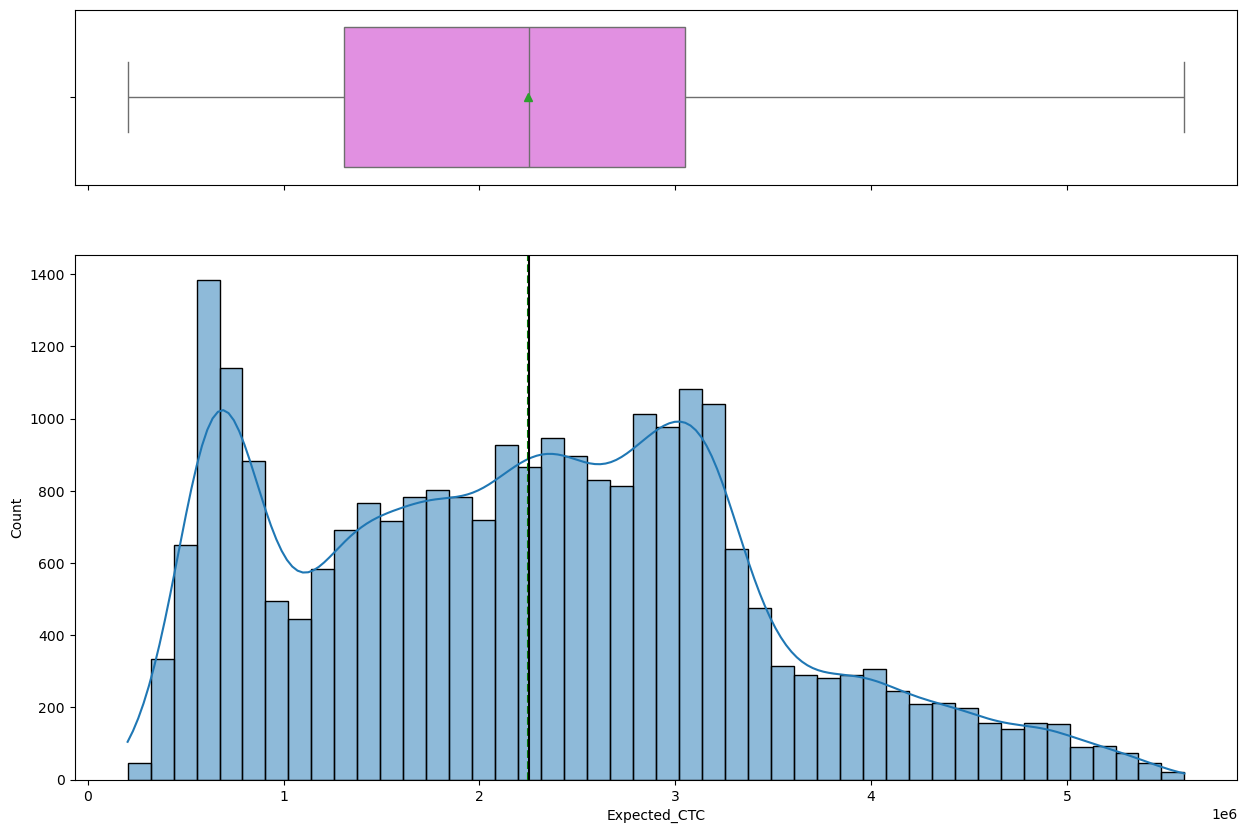

In [187]:
histogram_boxplot(hr, "Expected_CTC")

* More number of candidates are around 5-6 lakh section and very few number of candidates are above 35 lakh

In [188]:
hr["Expected_CTC"].mean()

2250154.5104

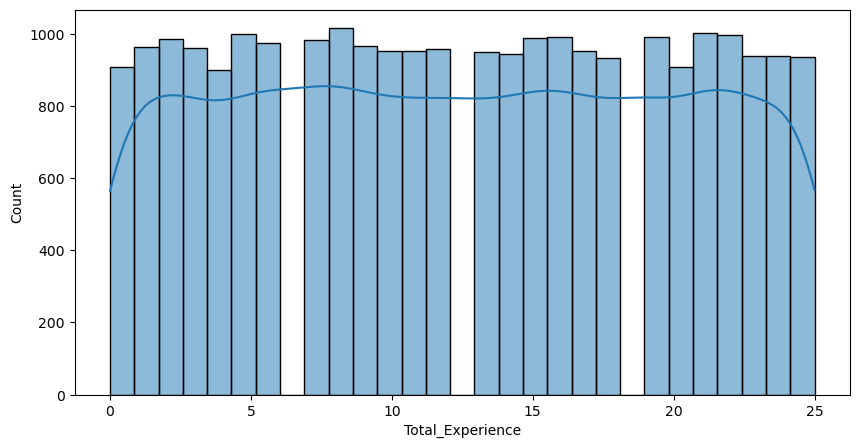

In [189]:
plt.figure(figsize=(10,5))
sns.histplot(data=hr,x='Total_Experience', kde=True)
plt.show()

* Almost equal no of candidates are distributed around the Total experience with small differences.

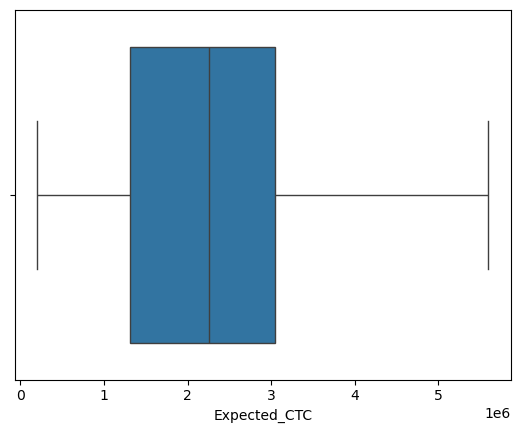

In [190]:
sns.boxplot(data=hr, x="Expected_CTC");

* Around 75% of the candidates are below 30 lakh, 25% below 12 lakh, and 25% above 30 lakh.

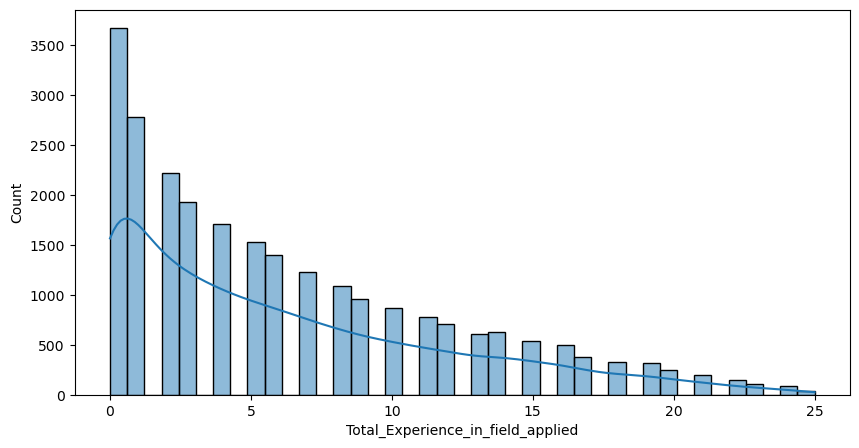

In [191]:
plt.figure(figsize=(10,5))
sns.histplot(data=hr,x='Total_Experience_in_field_applied', kde=True)
plt.show()

* Mostly freshers to the field are the ones who are higher in numbers. The no of candidates gradually decrease with more experience in applied field.

C:\Users\PRABHU KRISHNAN\AppData\Local\Temp\ipykernel_29072\4046726049.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(hr, x= "No_Of_Companies_worked", palette='bright')


<Axes: xlabel='No_Of_Companies_worked', ylabel='count'>

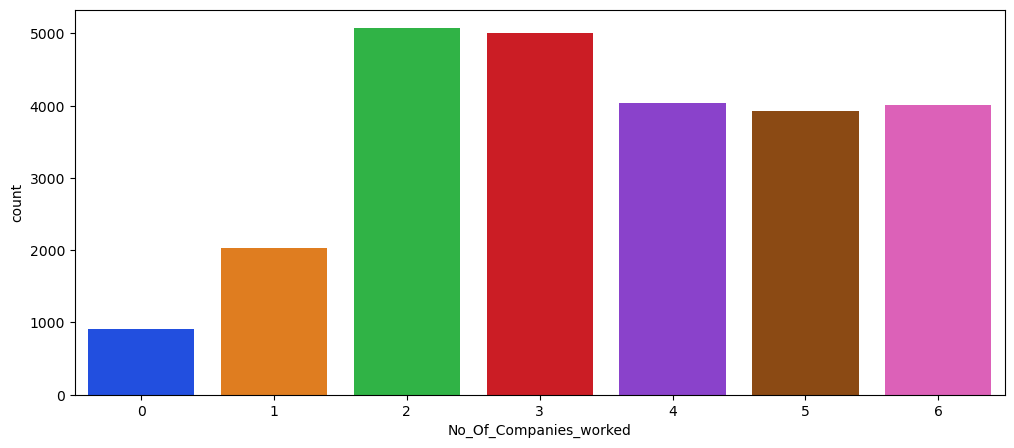

In [193]:
plt.figure(figsize=(12, 5))
sns.countplot(hr, x= "No_Of_Companies_worked", palette='bright')

* Majority of the candidates have worked in 2-3 companies and noteable numbers in above 4 companies. Very few have worked only in 0-1 company.

C:\Users\PRABHU KRISHNAN\AppData\Local\Temp\ipykernel_29072\4146061992.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(hr, x= "Department", palette='bright')


<Axes: xlabel='Department', ylabel='count'>

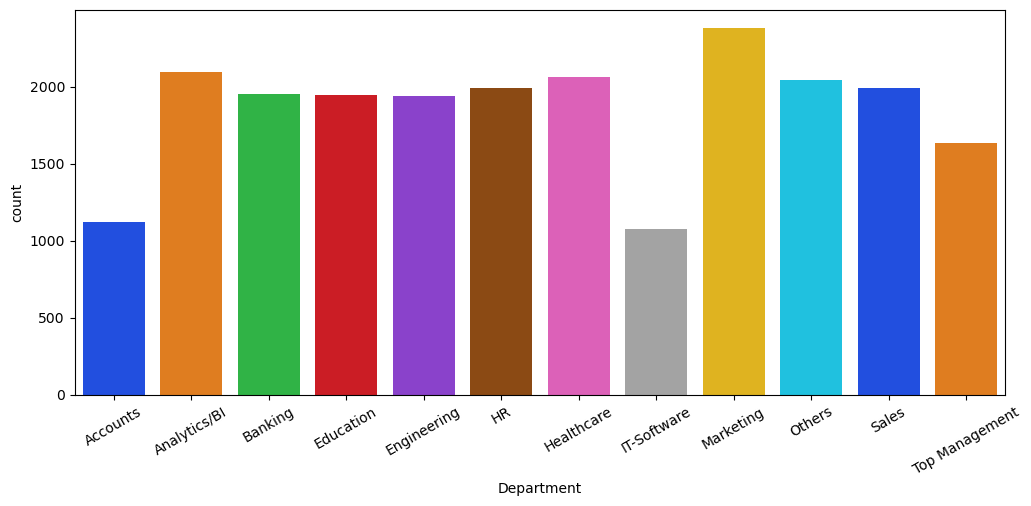

In [194]:
plt.figure(figsize=(12, 5))
plt.xticks(rotation=30)
sns.countplot(hr, x= "Department", palette='bright')

* Marketing department has highest no of candidates followed by Analystics/BI and Healthcare. Accounts and IT-software have the least no of candidates

C:\Users\PRABHU KRISHNAN\AppData\Local\Temp\ipykernel_29072\3478957874.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(hr, x= "Number_of_Publications", palette='bright')


<Axes: xlabel='Number_of_Publications', ylabel='count'>

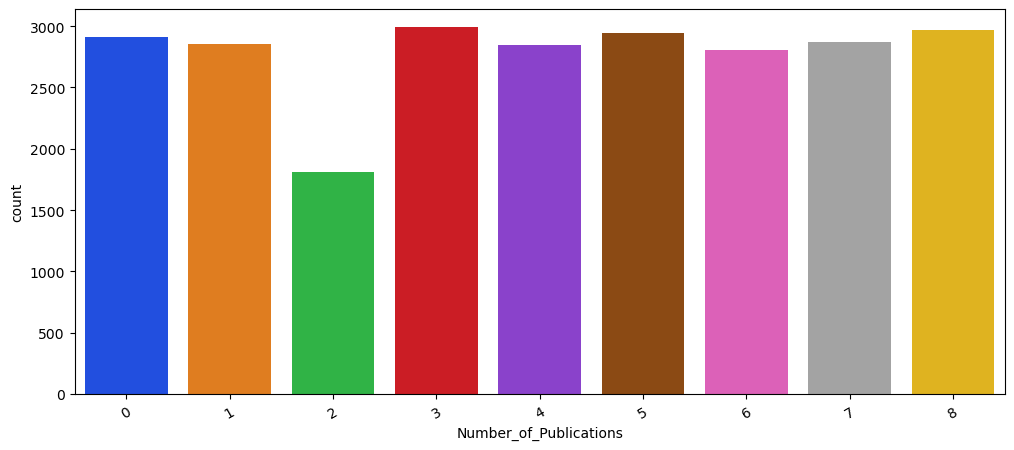

In [195]:
plt.figure(figsize=(12, 5))
plt.xticks(rotation=30)
sns.countplot(hr, x= "Number_of_Publications", palette='bright')

* Almost all candidates are equally distributed with the no of publications with minor differences. Few candidates have only 2 publications.

C:\Users\PRABHU KRISHNAN\AppData\Local\Temp\ipykernel_29072\4266078643.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(hr, x= "Certifications", palette='bright')


<Axes: xlabel='Certifications', ylabel='count'>

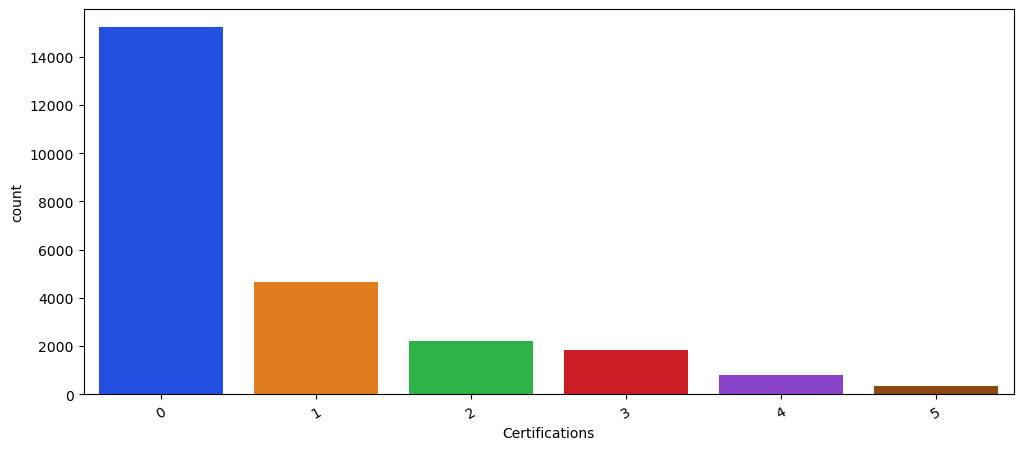

In [196]:
plt.figure(figsize=(12, 5))
plt.xticks(rotation=30)
sns.countplot(hr, x= "Certifications", palette='bright')

* Most of the candidates have 0 certifications. Only few number of candidates have certifications ranging from 1-5.

C:\Users\PRABHU KRISHNAN\AppData\Local\Temp\ipykernel_29072\1564412887.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(hr, x= "Designation", palette='bright')


<Axes: xlabel='Designation', ylabel='count'>

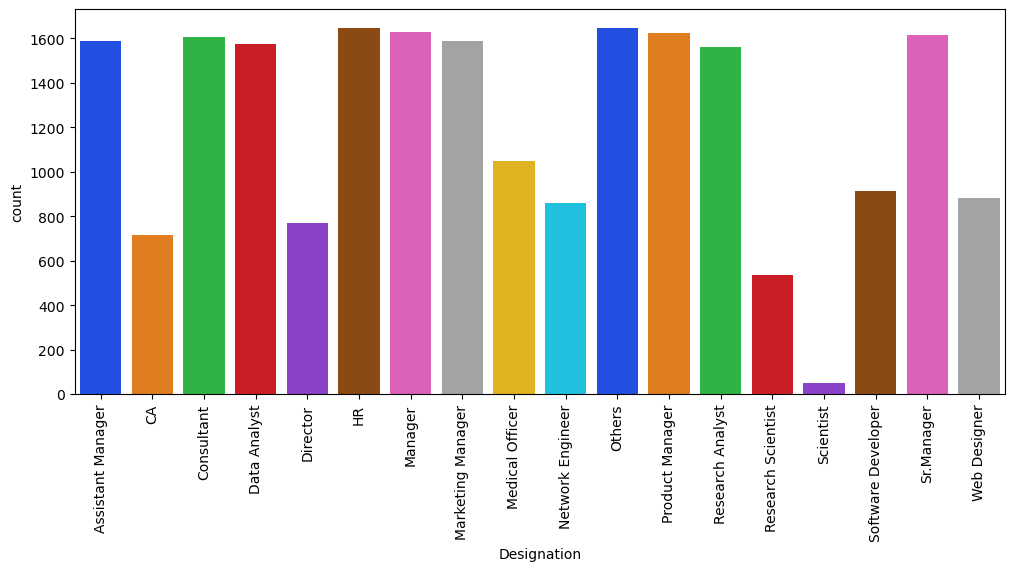

In [197]:
plt.figure(figsize=(12, 5))
plt.xticks(rotation=90)
sns.countplot(hr, x= "Designation", palette='bright')

* CA, Director, Network Engineer, Research scientist and Scientist designations have less no of candidates compared to others. These variations might impact the Salary.

C:\Users\PRABHU KRISHNAN\AppData\Local\Temp\ipykernel_29072\2936764647.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(hr, x= "Role", palette='bright')


<Axes: xlabel='Role', ylabel='count'>

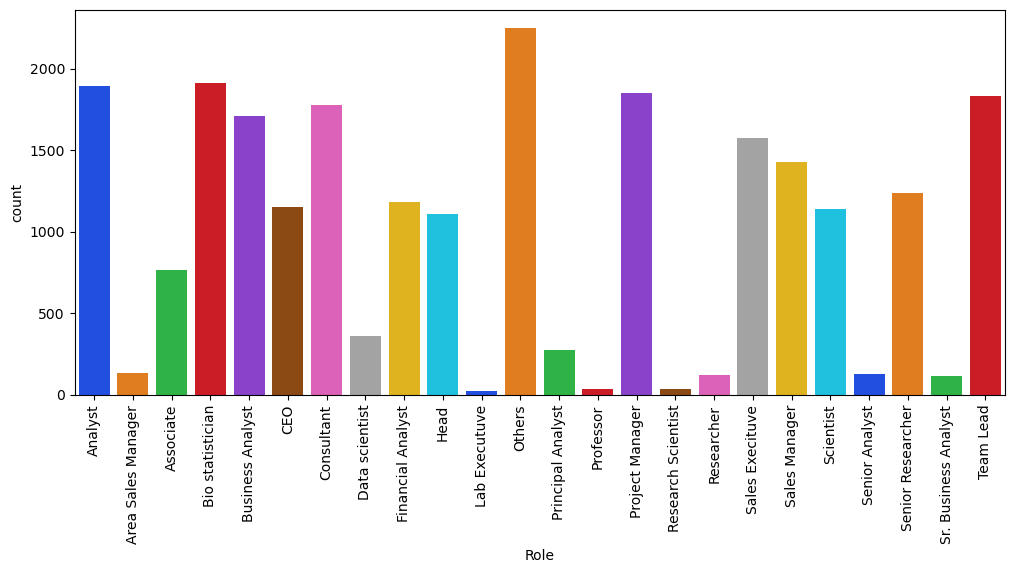

In [198]:
plt.figure(figsize=(12, 5))
plt.xticks(rotation=90)
sns.countplot(hr, x= "Role", palette='bright')

* Very few candidates have applied for Lab executive, Professor, Research scientist and few other roles as shown above. High profile roles like Team lead, Project Manager, Analyst and few other roles have been applied the most.

C:\Users\PRABHU KRISHNAN\AppData\Local\Temp\ipykernel_29072\2798757867.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(hr, x= "Inhand_Offer", palette='bright')


<Axes: xlabel='Inhand_Offer', ylabel='count'>

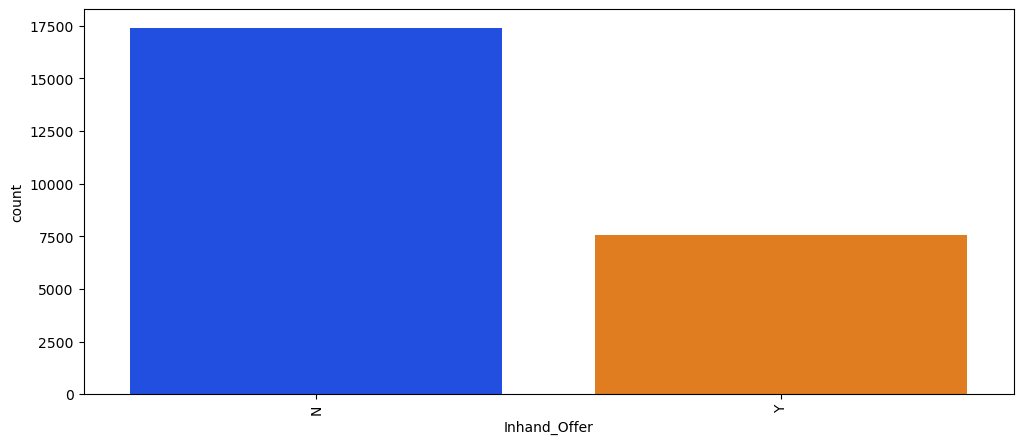

In [199]:
plt.figure(figsize=(12, 5))
plt.xticks(rotation=90)
sns.countplot(hr, x= "Inhand_Offer", palette='bright')

* Candidates without Inhand offer are more than candidates having the offer.

#### BIVARIATE ANALYSIS

C:\Users\PRABHU KRISHNAN\AppData\Local\Temp\ipykernel_29072\3283856060.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(hr, x= "Inhand_Offer", y = "Expected_CTC", palette='bright')


<Axes: xlabel='Inhand_Offer', ylabel='Expected_CTC'>

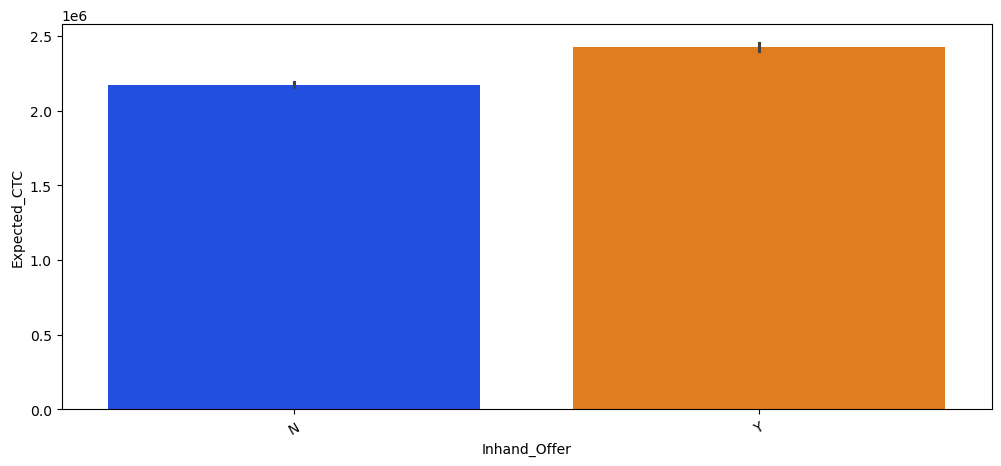

In [200]:
plt.figure(figsize=(12, 5))
plt.xticks(rotation=30)
sns.barplot(hr, x= "Inhand_Offer", y = "Expected_CTC", palette='bright')

* Candidates having Inhand offer have higher salary than candidates not having the offer.

C:\Users\PRABHU KRISHNAN\AppData\Local\Temp\ipykernel_29072\918640474.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(hr, x= "Department", y = "Expected_CTC", palette='bright')


<Axes: xlabel='Department', ylabel='Expected_CTC'>

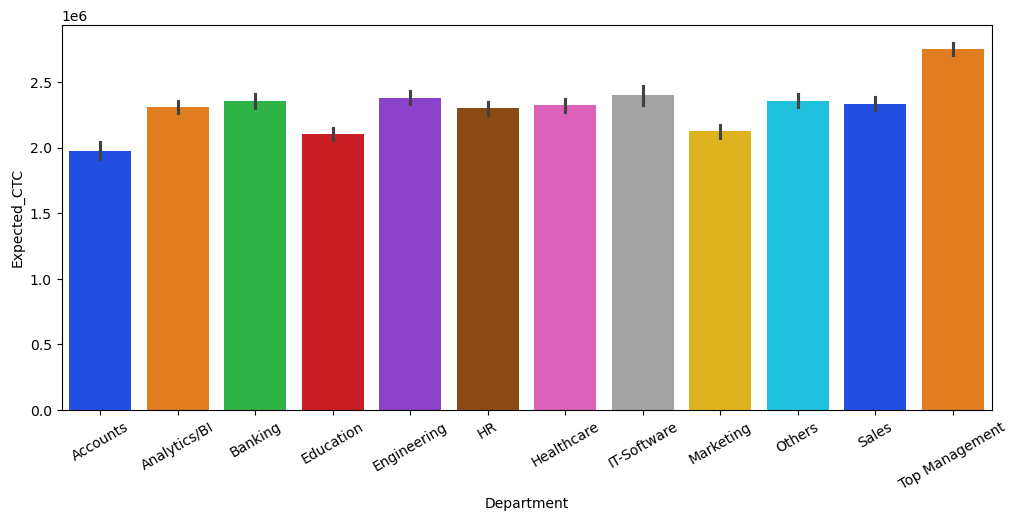

In [201]:
plt.figure(figsize=(12, 5))
plt.xticks(rotation=30)
sns.barplot(hr, x= "Department", y = "Expected_CTC", palette='bright')

* Top management department generally are having higher salary compared to others. Accounts department have the least salary.

C:\Users\PRABHU KRISHNAN\AppData\Local\Temp\ipykernel_29072\3875623066.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(hr, x= "Industry", y = "Expected_CTC", palette='bright')


<Axes: xlabel='Industry', ylabel='Expected_CTC'>

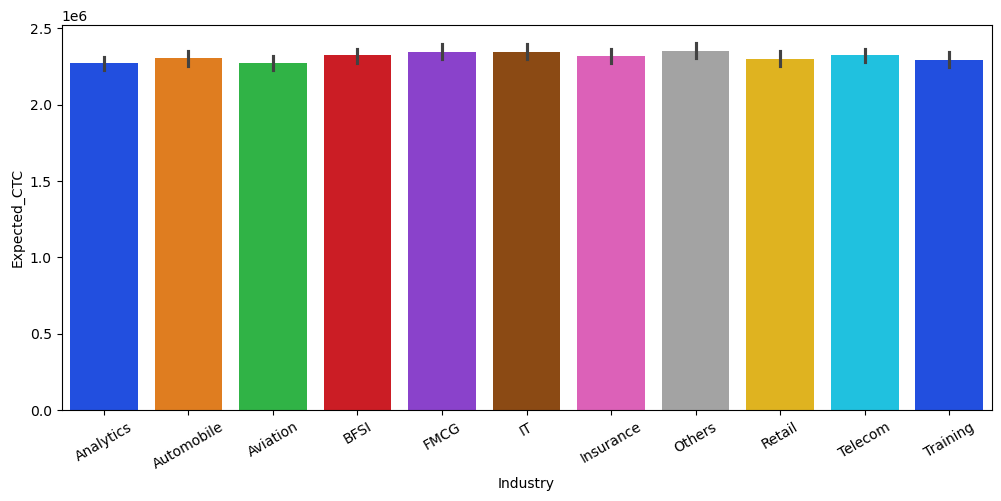

In [211]:
plt.figure(figsize=(12, 5))
plt.xticks(rotation=30)
sns.barplot(hr, x= "Industry", y = "Expected_CTC", palette='bright')

* Type of industry does not impact the Salary.

C:\Users\PRABHU KRISHNAN\AppData\Local\Temp\ipykernel_29072\3569453305.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(hr, x= "Education", y = "Expected_CTC", palette='bright')


<Axes: xlabel='Education', ylabel='Expected_CTC'>

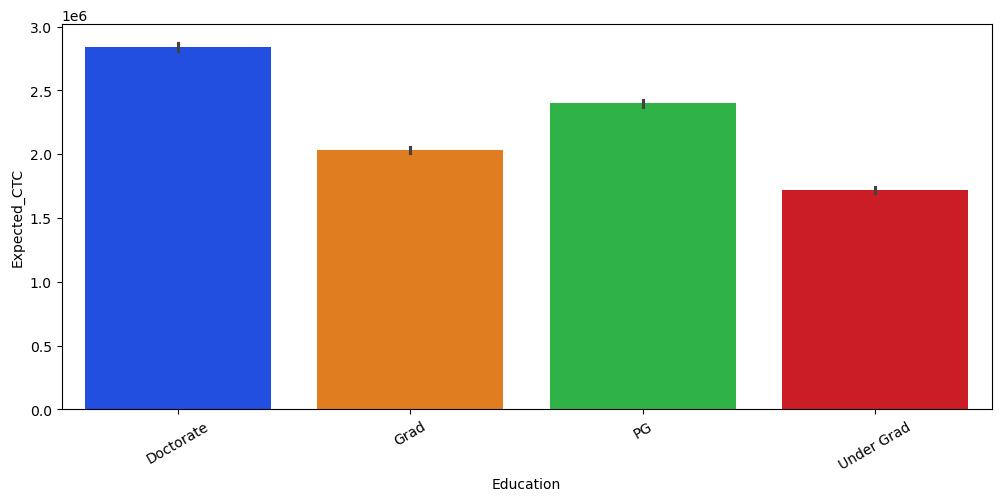

In [203]:
plt.figure(figsize=(12, 5))
plt.xticks(rotation=30)
sns.barplot(hr, x= "Education", y = "Expected_CTC", palette='bright')

* Education is impacting the Salary with Doctorate at the top followed by PG, Graduate and Under graduate.

C:\Users\PRABHU KRISHNAN\AppData\Local\Temp\ipykernel_29072\712195007.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(hr, x= "Preferred_location", y = "Expected_CTC", palette='bright')


<Axes: xlabel='Preferred_location', ylabel='Expected_CTC'>

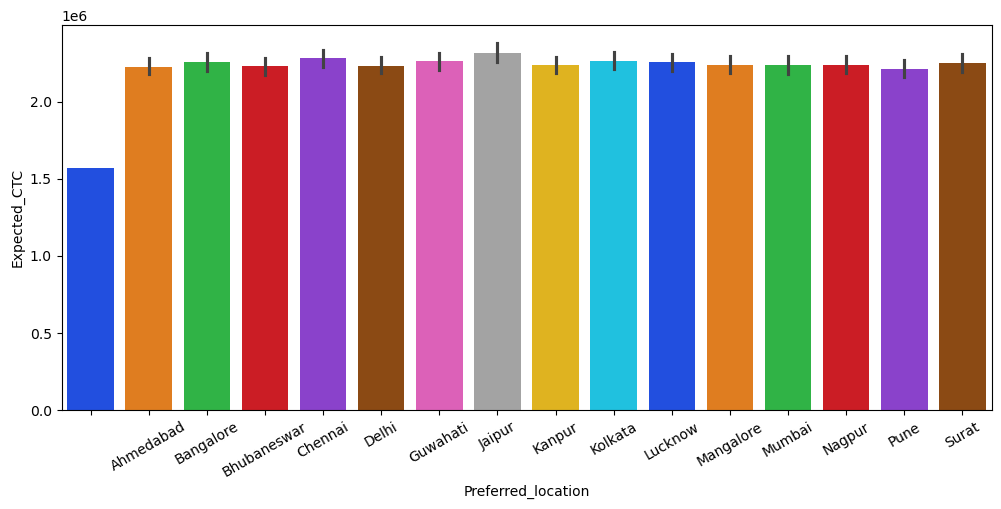

In [212]:
plt.figure(figsize=(12, 5))
plt.xticks(rotation=30)
sns.barplot(hr, x= "Preferred_location", y = "Expected_CTC", palette='bright')

* Preferred location is not impacting the Salary.

C:\Users\PRABHU KRISHNAN\AppData\Local\Temp\ipykernel_29072\215856423.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(hr, x= "Graduation_Specialization", y = "Expected_CTC", palette='bright')


<Axes: xlabel='Graduation_Specialization', ylabel='Expected_CTC'>

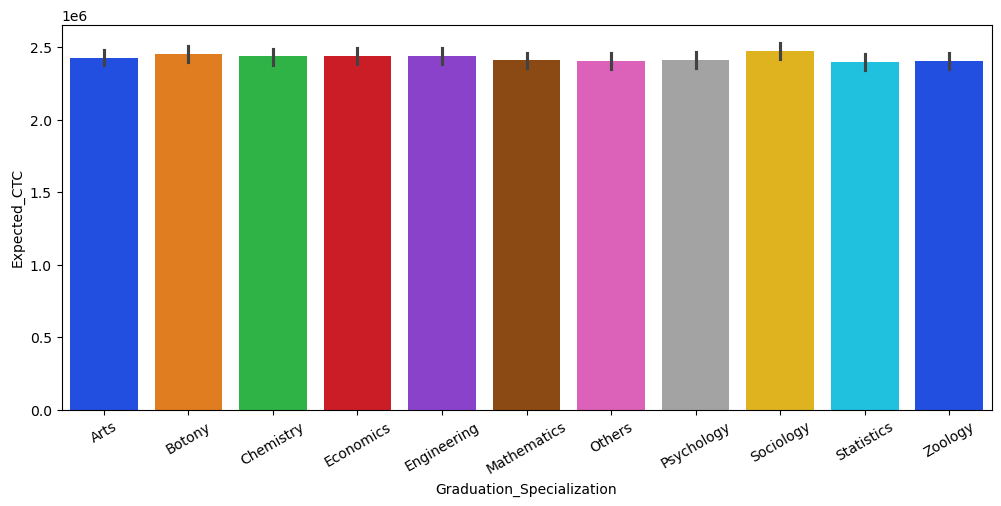

In [205]:
plt.figure(figsize=(12, 5))
plt.xticks(rotation=30)
sns.barplot(hr, x= "Graduation_Specialization", y = "Expected_CTC", palette='bright')

* Graduation specialization does not impact the Salary.

C:\Users\PRABHU KRISHNAN\AppData\Local\Temp\ipykernel_29072\1292579052.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(hr, x= "University_Grad", y = "Expected_CTC", palette='bright')


<Axes: xlabel='University_Grad', ylabel='Expected_CTC'>

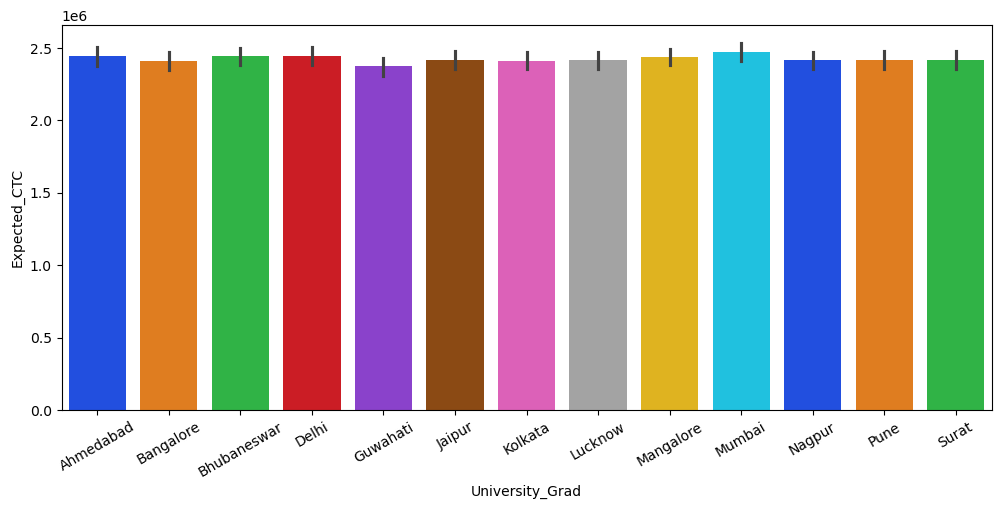

In [206]:
plt.figure(figsize=(12, 5))
plt.xticks(rotation=30)
sns.barplot(hr, x= "University_Grad", y = "Expected_CTC", palette='bright')

* Location of University graduation does not impact the Salary.

C:\Users\PRABHU KRISHNAN\AppData\Local\Temp\ipykernel_29072\2781610651.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(hr, x= "PHD_Specialization", y = "Expected_CTC", palette='bright')


<Axes: xlabel='PHD_Specialization', ylabel='Expected_CTC'>

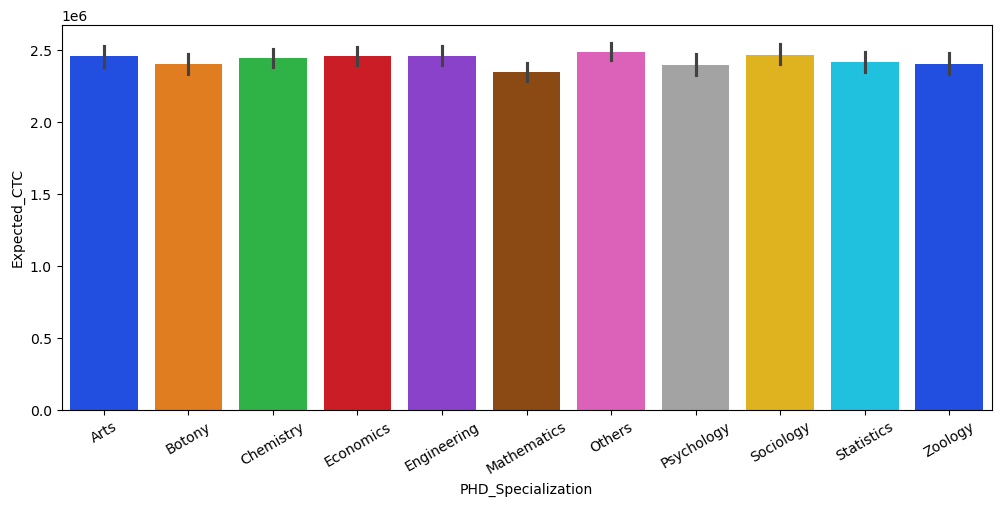

In [207]:
plt.figure(figsize=(12, 5))
plt.xticks(rotation=30)
sns.barplot(hr, x= "PHD_Specialization", y = "Expected_CTC", palette='bright')

* PHD Specialization does not impact the Salary.

C:\Users\PRABHU KRISHNAN\AppData\Local\Temp\ipykernel_29072\3184328568.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(hr, x= "University_PHD", y = "Expected_CTC", palette='bright')


<Axes: xlabel='University_PHD', ylabel='Expected_CTC'>

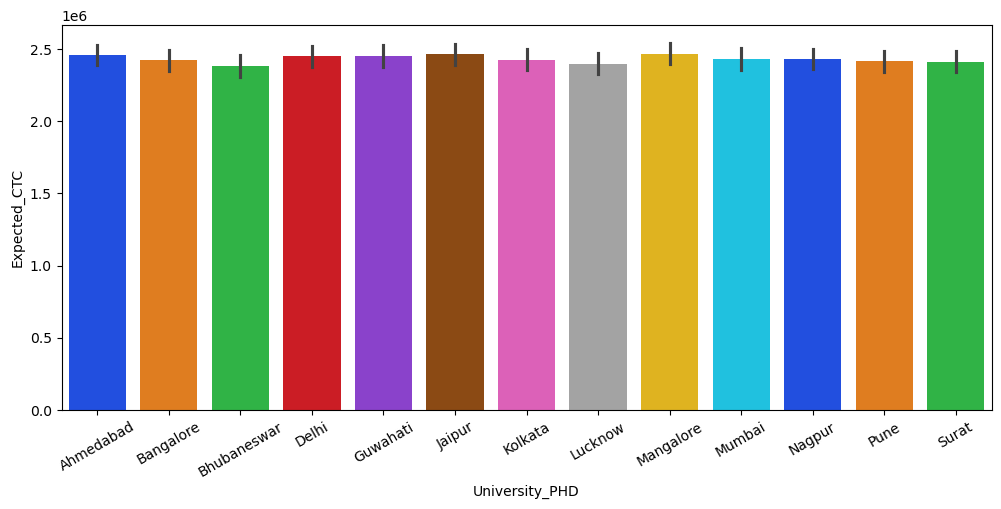

In [208]:
plt.figure(figsize=(12, 5))
plt.xticks(rotation=30)
sns.barplot(hr, x= "University_PHD", y = "Expected_CTC", palette='bright')

* Location of University_PHD does not impact the Salary.

C:\Users\PRABHU KRISHNAN\AppData\Local\Temp\ipykernel_29072\163525776.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(hr, x= "Passing_Year_Of_PHD", y = "Expected_CTC", palette='bright')


<Axes: xlabel='Passing_Year_Of_PHD', ylabel='Expected_CTC'>

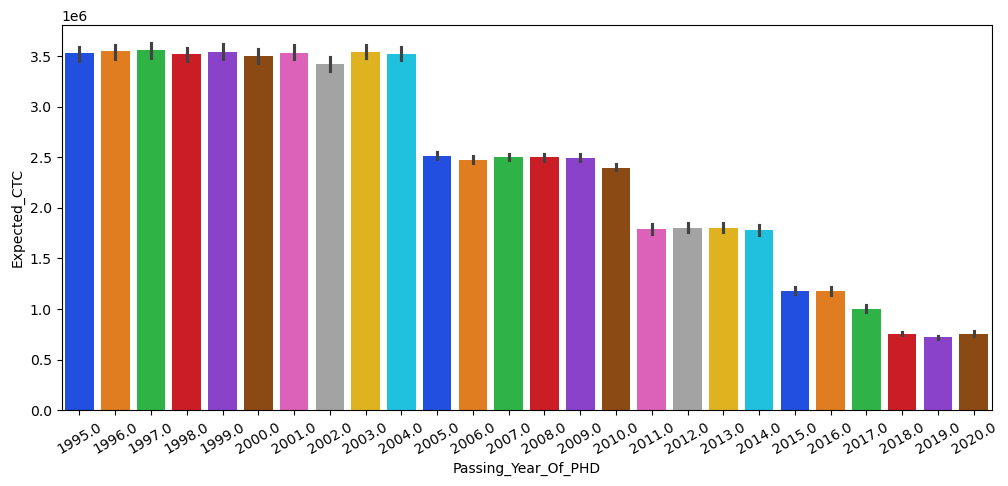

In [209]:
plt.figure(figsize=(12, 5))
plt.xticks(rotation=30)
sns.barplot(hr, x= "Passing_Year_Of_PHD", y = "Expected_CTC", palette='bright')

* Passing year of PHD is impacting the Salary. Candidates before 2004 have high salary, Candidates from 2005 to 2014 have mid range salary, Candidates after 2014 have lower salary


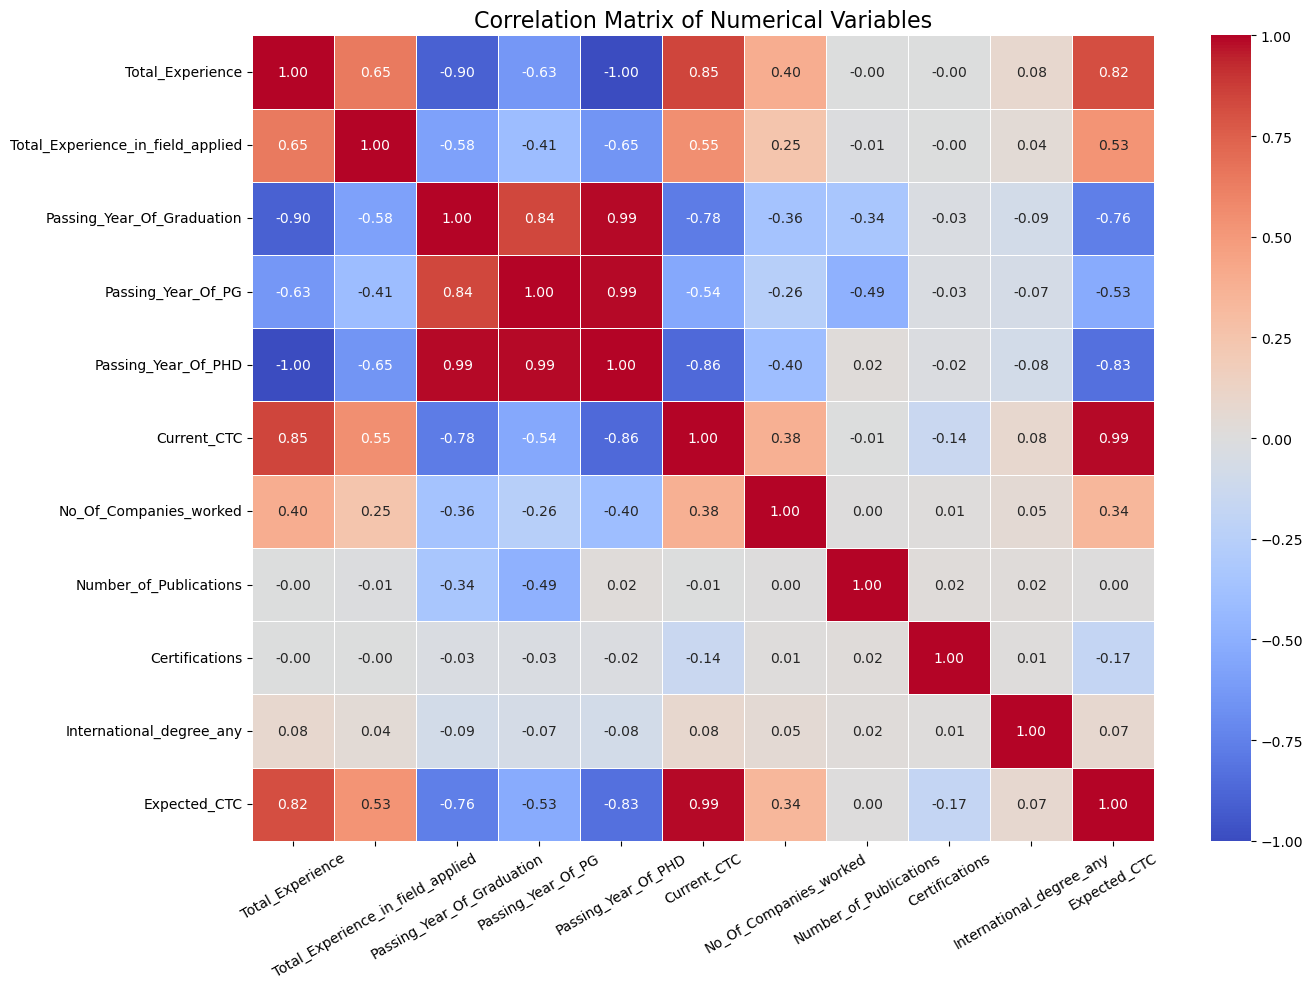

In [221]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Compute correlation matrix
correlation_matrix = hr.corr(numeric_only=True)  # Only include numerical columns

# Step 2: Display heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numerical Variables", fontsize=16)
plt.xticks(rotation=30)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


* Total experience and Current CTC have high positive correlation with Expected CTC. Passing year of graduation and PHD are highly negatively correlated with Expected CTC.

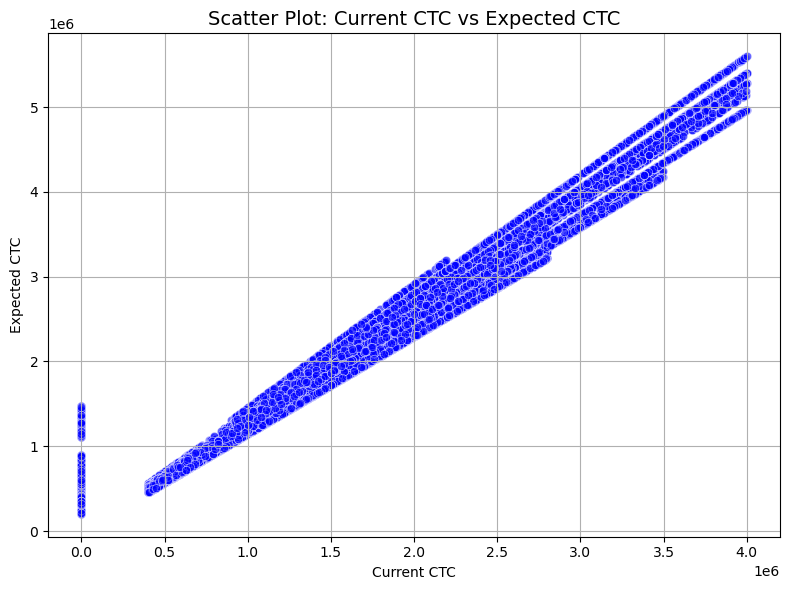

In [216]:

# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=hr, x='Current_CTC', y='Expected_CTC', color='blue', alpha=0.6)

# Titles and labels
plt.title('Scatter Plot: Current CTC vs Expected CTC', fontsize=14)
plt.xlabel('Current CTC')
plt.ylabel('Expected CTC')
plt.grid(True)
plt.tight_layout()
plt.show()


* It can be inferred that Candidates with high Current CTC are having more Expected CTC.

### MISSING VALUE TREATMENT

In [450]:
missing_info = hr.isnull().sum().to_frame(name='Missing_Values')
missing_info['Missing_%'] = (missing_info['Missing_Values'] / len(hr)) * 100
missing_info = missing_info[missing_info['Missing_Values'] > 0]
missing_info.sort_values(by='Missing_%', ascending=False)

Missing_Values  Missing_%
PHD_Specialization                   11881     47.524
University_PHD                       11881     47.524
Passing_Year_Of_PHD                  11881     47.524
PG_Specialization                     7692     30.768
University_PG                         7692     30.768
Passing_Year_Of_PG                    7692     30.768
Graduation_Specialization             6180     24.720
University_Grad                       6180     24.720
Passing_Year_Of_Graduation            6180     24.720
Designation                           3129     12.516
Department                            2778     11.112
Role                                   963      3.852
Industry                               908      3.632
Organization                           908      3.632
Last_Appraisal_Rating                  908      3.632

In [429]:
# extracting all the information of other variable where PHD specialization  is null
pd.set_option('display.max_columns', None)
hr.loc[hr['PHD_Specialization'].isnull()==True]

Total_Experience  Total_Experience_in_field_applied      Department  \
0                     0                                  0             NaN   
7                    19                                 11          Others   
12                   10                                 10          Others   
15                   20                                 15      Healthcare   
16                    4                                  4    Analytics/BI   
...                 ...                                ...             ...   
24992                25                                 12           Sales   
24994                 7                                  3  Top Management   
24996                12                                  8              HR   
24997                22                                  8         Banking   
24998                25                                  8       Marketing   

                   Role    Industry Organization         Designation  \
0                   NaN         NaN          NaN                 NaN   
7               Analyst      Others            E             Manager   
12     Bio statistician  Automobile            H          Consultant   
15              Analyst          IT            F     Medical Officer   
16            Scientist   Analytics            G          Sr.Manager   
...                 ...         ...          ...                 ...   
24992     Sales Manager  Automobile            D        Data Analyst   
24994            Others     Telecom            A        Data Analyst   
24996            Others   Analytics            B          Sr.Manager   
24997              Head   Insurance            D  Software Developer   
24998               CEO        BFSI            D   Marketing Manager   

        Education Graduation_Specialization University_Grad  \
0              PG                      Arts         Lucknow   
7              PG                 Sociology           Delhi   
12     Under Grad                       NaN             NaN   
15             PG                 Sociology          Mumbai   
16      Doctorate               Mathematics         Kolkata   
...           ...                       ...             ...   
24992          PG                Statistics       Bangalore   
24994  Under Grad                       NaN             NaN   
24996  Under Grad                       NaN             NaN   
24997  Under Grad                       NaN             NaN   
24998          PG                 Economics           Surat   

       Passing_Year_Of_Graduation PG_Specialization University_PG  \
0                          2020.0               NaN           NaN   
7                          2001.0               NaN           NaN   
12                            NaN               NaN           NaN   
15                         2000.0         Sociology        Mumbai   
16                         2016.0       Mathematics       Kolkata   
...                           ...               ...           ...   
24992                      1995.0        Statistics     Bangalore   
24994                         NaN               NaN           NaN   
24996                         NaN               NaN           NaN   
24997                         NaN               NaN           NaN   
24998                      1995.0         Economics         Surat   

       Passing_Year_Of_PG PHD_Specialization University_PHD  \
0                     NaN                NaN            NaN   
7                     NaN                NaN            NaN   
12                    NaN                NaN            NaN   
15                 2014.0                NaN            NaN   
16                 2009.0                NaN            NaN   
...                   ...                ...            ...   
24992              2015.0                NaN            NaN   
24994                 NaN                NaN            NaN   
24996                 NaN                NaN        

In [16]:
hr.loc[hr['PHD_Specialization'].isnull()==True,'University_PHD'].value_counts(dropna=False)

University_PHD
NaN            11881
Ahmedabad          0
Bangalore          0
Bhubaneswar        0
Delhi              0
Guwahati           0
Jaipur             0
Kolkata            0
Lucknow            0
Mangalore          0
Mumbai             0
Nagpur             0
Pune               0
Surat              0
Name: count, dtype: int64

In [17]:
hr.loc[hr['PHD_Specialization'].isnull()==True,'Passing_Year_Of_PHD'].value_counts(dropna=False)

Passing_Year_Of_PHD
NaN    11881
Name: count, dtype: int64

* It can be inferred that the rows where PHD specialization have missing values, University_PHD and Passing_year_of_PHD also have missing values.

C:\Users\PRABHU KRISHNAN\AppData\Local\Temp\ipykernel_29072\3184328568.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(hr, x= "University_PHD", y = "Expected_CTC", palette='bright')


<Axes: xlabel='University_PHD', ylabel='Expected_CTC'>

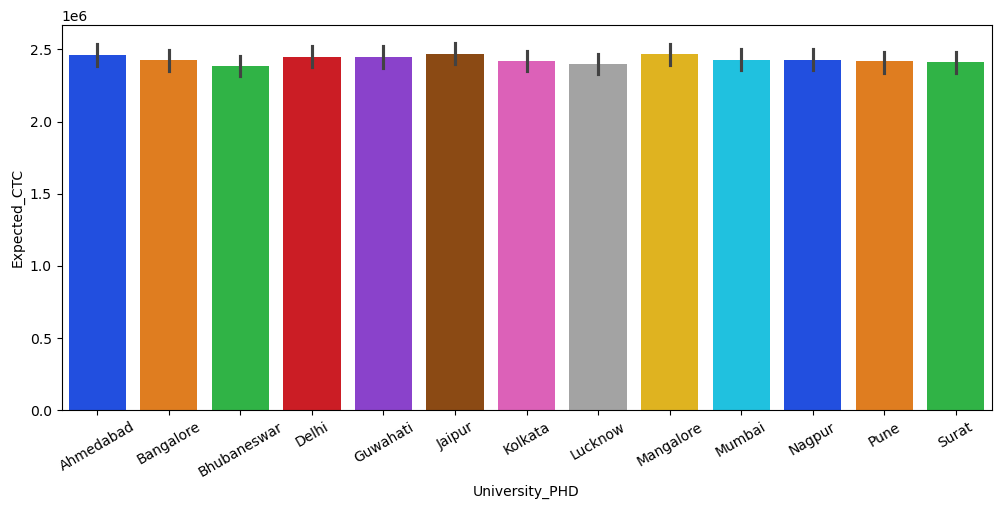

In [18]:
plt.figure(figsize=(12, 5))
plt.xticks(rotation=30)
sns.barplot(hr, x= "University_PHD", y = "Expected_CTC", palette='bright')

* There is no relation between University_PHD and Expected_CTC. So we can drop them since it has 47.5% missing values.

C:\Users\PRABHU KRISHNAN\AppData\Local\Temp\ipykernel_29072\2781610651.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(hr, x= "PHD_Specialization", y = "Expected_CTC", palette='bright')


<Axes: xlabel='PHD_Specialization', ylabel='Expected_CTC'>

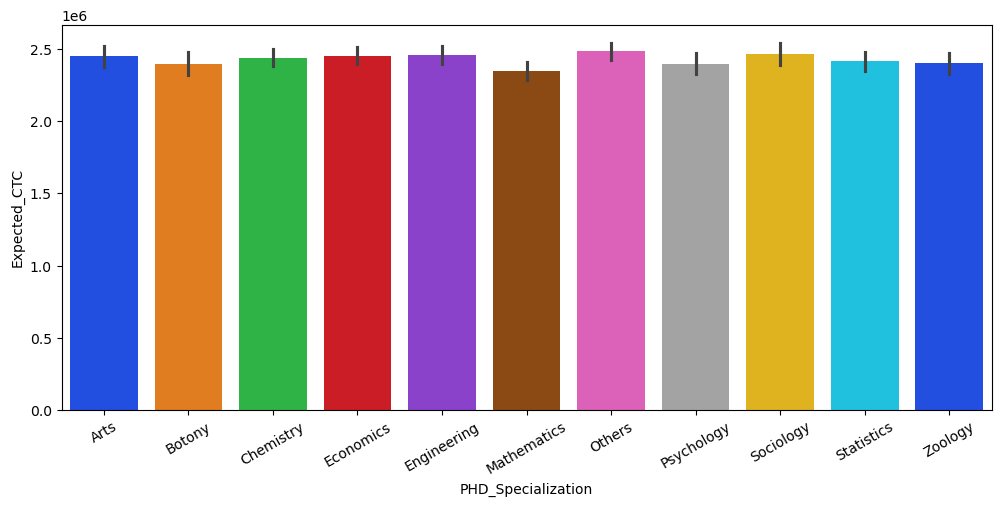

In [19]:
plt.figure(figsize=(12, 5))
plt.xticks(rotation=30)
sns.barplot(hr, x= "PHD_Specialization", y = "Expected_CTC", palette='bright')

* There is no relation between PHD_Specialization and Expected_CTC. So we can drop this column too since it has 47.5% missing values.

**Drop variables PHD_Specialization and University_PHD**

In [451]:
hr.drop(['University_PHD', 'PHD_Specialization'], axis=1, inplace=True)


C:\Users\PRABHU KRISHNAN\AppData\Local\Temp\ipykernel_29072\1154095317.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(hr, x= "Passing_Year_Of_PHD", y = "Expected_CTC", palette='bright')


<Axes: xlabel='Passing_Year_Of_PHD', ylabel='Expected_CTC'>

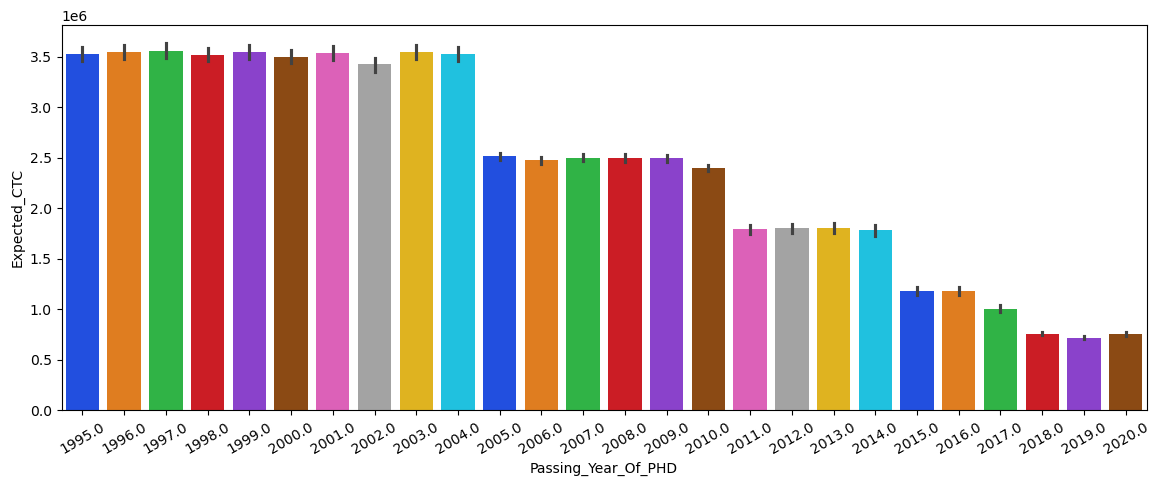

In [63]:
plt.figure(figsize=(14, 5))
plt.xticks(rotation=30)
sns.barplot(hr, x= "Passing_Year_Of_PHD", y = "Expected_CTC", palette='bright')

* It can be inferred that 'Passing year of PHD' has some impact on the Expected_CTC. Even though it has 47.5% missing values, instead of dropping them, we have to impute the missing values.

**Creating years since PHD from 'Passing_year_of_PHD'**

In [452]:
median_year = hr['Passing_Year_Of_PHD'].median()
hr['PHD_Year_Missing'] = hr['Passing_Year_Of_PHD'].isnull().astype(int)
hr['Years_Since_PHD'] = 2025 - hr['Passing_Year_Of_PHD'].fillna(median_year)


In [20]:
hr.head()

Total_Experience  Total_Experience_in_field_applied      Department  \
0                 0                                  0             NaN   
1                23                                 14              HR   
2                21                                 12  Top Management   
3                15                                  8         Banking   
4                10                                  5           Sales   

                Role   Industry Organization      Designation  Education  \
0                NaN        NaN          NaN              NaN         PG   
1         Consultant  Analytics            H               HR  Doctorate   
2         Consultant   Training            J              NaN  Doctorate   
3  Financial Analyst   Aviation            F               HR  Doctorate   
4    Project Manager  Insurance            E  Medical Officer       Grad   

  Graduation_Specialization University_Grad  Passing_Year_Of_Graduation  \
0                      Arts         Lucknow                      2020.0   
1                 Chemistry           Surat                      1988.0   
2                   Zoology          Jaipur                      1990.0   
3                    Others       Bangalore                      1997.0   
4                   Zoology          Mumbai                      2004.0   

  PG_Specialization University_PG  Passing_Year_Of_PG  Passing_Year_Of_PHD  \
0               NaN           NaN                 NaN                  NaN   
1            Others         Surat              1990.0               1997.0   
2           Zoology        Jaipur              1992.0               1999.0   
3           Zoology     Bangalore              1999.0               2005.0   
4           Zoology        Mumbai              2006.0               2010.0   

  Curent_Location Preferred_location  Current_CTC Inhand_Offer  \
0        Guwahati               Pune            0            N   
1       Bangalore             Nagpur      2702664            Y   
2       Ahmedabad             Jaipur      2236661            Y   
3          Kanpur            Kolkata      2100510            N   
4       Ahmedabad          Ahmedabad      1931644            N   

  Last_Appraisal_Rating  No_Of_Companies_worked  Number_of_Publications  \
0                   NaN                       0                       0   
1         Key_Performer                       2                       4   
2         Key_Performer                       5                       3   
3                     C                       5                       3   
4                     C                       2                       3   

   Certifications  International_degree_any  Expected_CTC  PHD_Year_Missing  \
0               0                         0        384551                 1   
1               0                         0       3783729                 0   
2               0                         0       3131325                 0   
3               0                         0       2608833                 0   
4               0                         0       2221390                 0   

   Years_Since_PHD  
0             18.0  
1             28.0  
2             26.0  
3             20.0  
4             15.0

In [453]:
hr.drop('Passing_Year_Of_PHD', axis=1, inplace=True)


In [454]:
hr.head(10)

Total_Experience  Total_Experience_in_field_applied      Department  \
0                 0                                  0             NaN   
1                23                                 14              HR   
2                21                                 12  Top Management   
3                15                                  8         Banking   
4                10                                  5           Sales   
5                16                                  3  Top Management   
6                 1                                  1     Engineering   
7                19                                 11          Others   
8                 8                                  7    Analytics/BI   
9                15                                 15    Analytics/BI   

                 Role   Industry Organization        Designation  Education  \
0                 NaN        NaN          NaN                NaN         PG   
1          Consultant  Analytics            H                 HR  Doctorate   
2          Consultant   Training            J                NaN  Doctorate   
3   Financial Analyst   Aviation            F                 HR  Doctorate   
4     Project Manager  Insurance            E    Medical Officer       Grad   
5  Area Sales Manager     Retail            G           Director  Doctorate   
6           Team Lead       FMCG            L  Marketing Manager       Grad   
7             Analyst     Others            E            Manager         PG   
8              Others    Telecom            L  Marketing Manager  Doctorate   
9                 CEO    Telecom            M    Product Manager  Doctorate   

  Graduation_Specialization University_Grad  Passing_Year_Of_Graduation  \
0                      Arts         Lucknow                      2020.0   
1                 Chemistry           Surat                      1988.0   
2                   Zoology          Jaipur                      1990.0   
3                    Others       Bangalore                      1997.0   
4                   Zoology          Mumbai                      2004.0   
5                    Others       Bangalore                      1998.0   
6                 Chemistry           Delhi                      2011.0   
7                 Sociology           Delhi                      2001.0   
8                Psychology          Mumbai                      2003.0   
9                 Chemistry           Delhi                      1998.0   

  PG_Specialization University_PG  Passing_Year_Of_PG Curent_Location  \
0               NaN           NaN                 NaN        Guwahati   
1            Others         Surat              1990.0       Bangalore   
2           Zoology        Jaipur              1992.0       Ahmedabad   
3           Zoology     Bangalore              1999.0          Kanpur   
4           Zoology        Mumbai              2006.0       Ahmedabad   
5           Zoology     Bangalore              2000.0            Pune   
6         Chemistry         Delhi              2013.0           Delhi   
7               NaN           NaN                 NaN           Surat   
8        Psychology        Mumbai              2005.0          Nagpur   
9         Chemistry         Delhi              2000.0       Bangalore   

  Preferred_location  Current_CTC Inhand_Offer Last_Appraisal_Rating  \
0               Pune            0            N                   NaN   
1             Nagpur      2702664            Y         Key_Performer   
2             Jaipur      2236661            Y         Key_Performer   
3            Kolkata      2100510            N                     C   
4          Ahmedabad      1931644            N                     C   
5        Bhubaneswar      3511167            Y                     C   
6               Pune       492917            Y                     B   
7          Bangalore      2693459            N                     C   
8           Guwahati      1630225       

In [455]:
missing_info = hr.isnull().sum().to_frame(name='Missing_Values')
missing_info['Missing_%'] = (missing_info['Missing_Values'] / len(hr)) * 100
missing_info = missing_info[missing_info['Missing_Values'] > 0]
missing_info.sort_values(by='Missing_%', ascending=False)

Missing_Values  Missing_%
PG_Specialization                     7692     30.768
University_PG                         7692     30.768
Passing_Year_Of_PG                    7692     30.768
Graduation_Specialization             6180     24.720
University_Grad                       6180     24.720
Passing_Year_Of_Graduation            6180     24.720
Designation                           3129     12.516
Department                            2778     11.112
Role                                   963      3.852
Industry                               908      3.632
Organization                           908      3.632
Last_Appraisal_Rating                  908      3.632

C:\Users\PRABHU KRISHNAN\AppData\Local\Temp\ipykernel_29072\715953194.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(hr, x= "PG_Specialization", y = "Expected_CTC", palette='bright')


<Axes: xlabel='PG_Specialization', ylabel='Expected_CTC'>

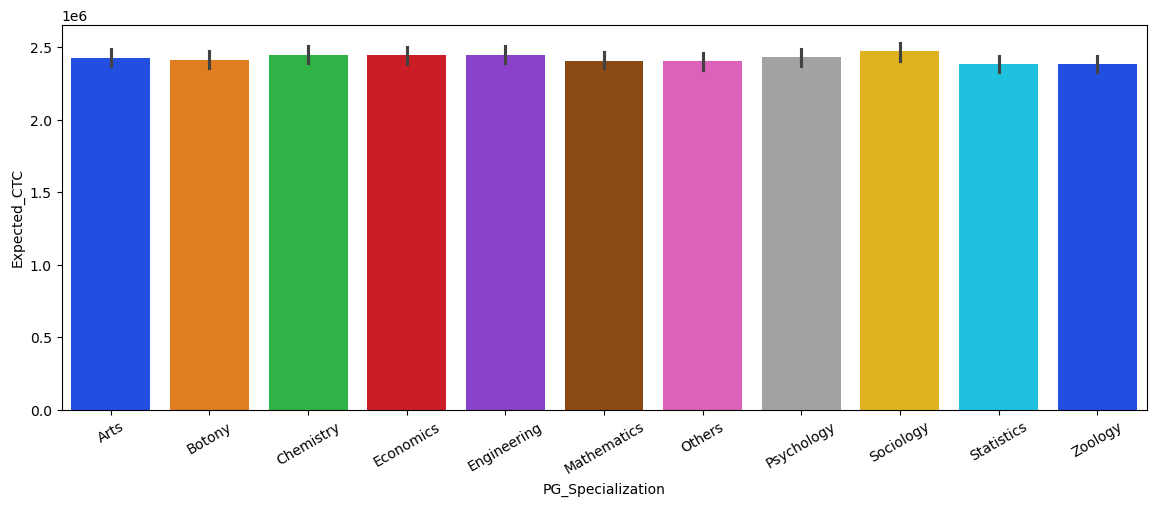

In [27]:
plt.figure(figsize=(14, 5))
plt.xticks(rotation=30)
sns.barplot(hr, x= "PG_Specialization", y = "Expected_CTC", palette='bright')

* There is no relation between PG_Specialization and Expected_CTC. So we can drop this column too since it has 30.7% missing values.

C:\Users\PRABHU KRISHNAN\AppData\Local\Temp\ipykernel_29072\2415419921.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(hr, x= "University_PG", y = "Expected_CTC", palette='bright')


<Axes: xlabel='University_PG', ylabel='Expected_CTC'>

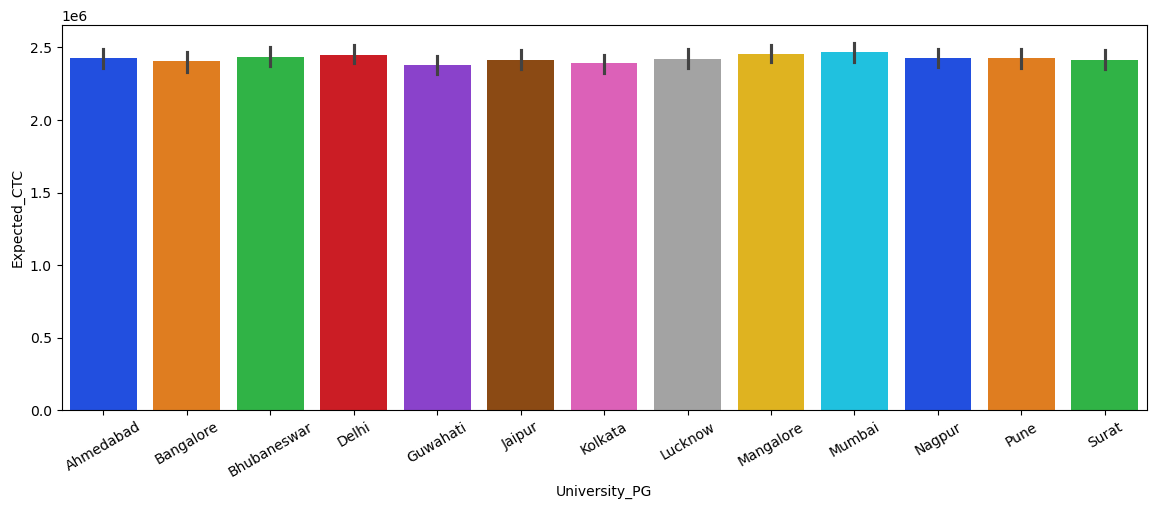

In [28]:
plt.figure(figsize=(14, 5))
plt.xticks(rotation=30)
sns.barplot(hr, x= "University_PG", y = "Expected_CTC", palette='bright')

* There is no relation between University_PG and Expected_CTC. So we can drop this column too since it has 30.7% missing values.

C:\Users\PRABHU KRISHNAN\AppData\Local\Temp\ipykernel_29072\714847807.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(hr, x= "Passing_Year_Of_PG", y = "Expected_CTC", palette='bright')


<Axes: xlabel='Passing_Year_Of_PG', ylabel='Expected_CTC'>

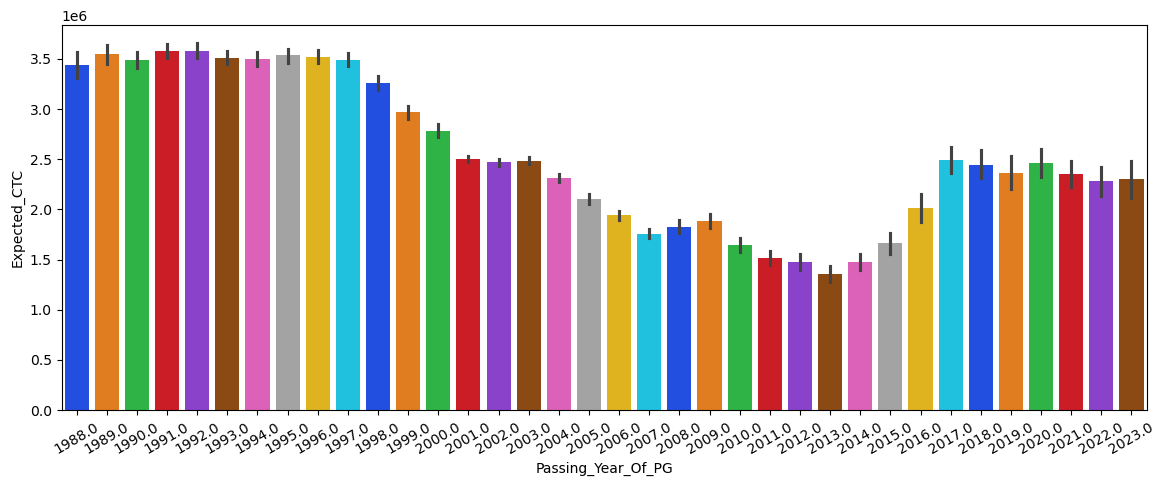

In [29]:
plt.figure(figsize=(14, 5))
plt.xticks(rotation=30)
sns.barplot(hr, x= "Passing_Year_Of_PG", y = "Expected_CTC", palette='bright')

* It can be inferred that 'Passing year of PG' has some impact on the Expected_CTC. Even though it has 30.7% missing values, instead of dropping them, we have to impute the missing values.

**Creating Years since PG from Passing year of PG**

In [456]:
# 1. Create missing flag
hr['PG_Year_Missing'] = hr['Passing_Year_Of_PG'].isnull().astype(int)

# 2. Impute with median and create 'Years_Since_PG'
median_pg = hr['Passing_Year_Of_PG'].median()
hr['Years_Since_PG'] = 2025 - hr['Passing_Year_Of_PG'].fillna(median_pg)

# 3. Drop unnecessary original columns
hr.drop(['PG_Specialization', 'University_PG', 'Passing_Year_Of_PG'], axis=1, inplace=True)


In [457]:
hr.head(10)

Total_Experience  Total_Experience_in_field_applied      Department  \
0                 0                                  0             NaN   
1                23                                 14              HR   
2                21                                 12  Top Management   
3                15                                  8         Banking   
4                10                                  5           Sales   
5                16                                  3  Top Management   
6                 1                                  1     Engineering   
7                19                                 11          Others   
8                 8                                  7    Analytics/BI   
9                15                                 15    Analytics/BI   

                 Role   Industry Organization        Designation  Education  \
0                 NaN        NaN          NaN                NaN         PG   
1          Consultant  Analytics            H                 HR  Doctorate   
2          Consultant   Training            J                NaN  Doctorate   
3   Financial Analyst   Aviation            F                 HR  Doctorate   
4     Project Manager  Insurance            E    Medical Officer       Grad   
5  Area Sales Manager     Retail            G           Director  Doctorate   
6           Team Lead       FMCG            L  Marketing Manager       Grad   
7             Analyst     Others            E            Manager         PG   
8              Others    Telecom            L  Marketing Manager  Doctorate   
9                 CEO    Telecom            M    Product Manager  Doctorate   

  Graduation_Specialization University_Grad  Passing_Year_Of_Graduation  \
0                      Arts         Lucknow                      2020.0   
1                 Chemistry           Surat                      1988.0   
2                   Zoology          Jaipur                      1990.0   
3                    Others       Bangalore                      1997.0   
4                   Zoology          Mumbai                      2004.0   
5                    Others       Bangalore                      1998.0   
6                 Chemistry           Delhi                      2011.0   
7                 Sociology           Delhi                      2001.0   
8                Psychology          Mumbai                      2003.0   
9                 Chemistry           Delhi                      1998.0   

  Curent_Location Preferred_location  Current_CTC Inhand_Offer  \
0        Guwahati               Pune            0            N   
1       Bangalore             Nagpur      2702664            Y   
2       Ahmedabad             Jaipur      2236661            Y   
3          Kanpur            Kolkata      2100510            N   
4       Ahmedabad          Ahmedabad      1931644            N   
5            Pune        Bhubaneswar      3511167            Y   
6           Delhi               Pune       492917            Y   
7           Surat          Bangalore      2693459            N   
8          Nagpur           Guwahati      1630225            N   
9       Bangalore        Bhubaneswar      1761797            Y   

  Last_Appraisal_Rating  No_Of_Companies_worked  Number_of_Publications  \
0                   NaN                       0                       0   
1         Key_Performer                       2                       4   
2         Key_Performer                       5                       3   
3                     C                       5                       3   
4                     C                       2                       3   
5                     C                       5                       4   
6                     B                       3                       3   
7                     C                       6                       1   
8                     A                       6                       6   
9              

In [458]:
missing_info = hr.isnull().sum().to_frame(name='Missing_Values')
missing_info['Missing_%'] = (missing_info['Missing_Values'] / len(hr)) * 100
missing_info = missing_info[missing_info['Missing_Values'] > 0]
missing_info.sort_values(by='Missing_%', ascending=False)

Missing_Values  Missing_%
Graduation_Specialization             6180     24.720
University_Grad                       6180     24.720
Passing_Year_Of_Graduation            6180     24.720
Designation                           3129     12.516
Department                            2778     11.112
Role                                   963      3.852
Industry                               908      3.632
Organization                           908      3.632
Last_Appraisal_Rating                  908      3.632

C:\Users\PRABHU KRISHNAN\AppData\Local\Temp\ipykernel_29072\3576180556.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(hr, x= "Graduation_Specialization", y = "Expected_CTC", palette='bright')


<Axes: xlabel='Graduation_Specialization', ylabel='Expected_CTC'>

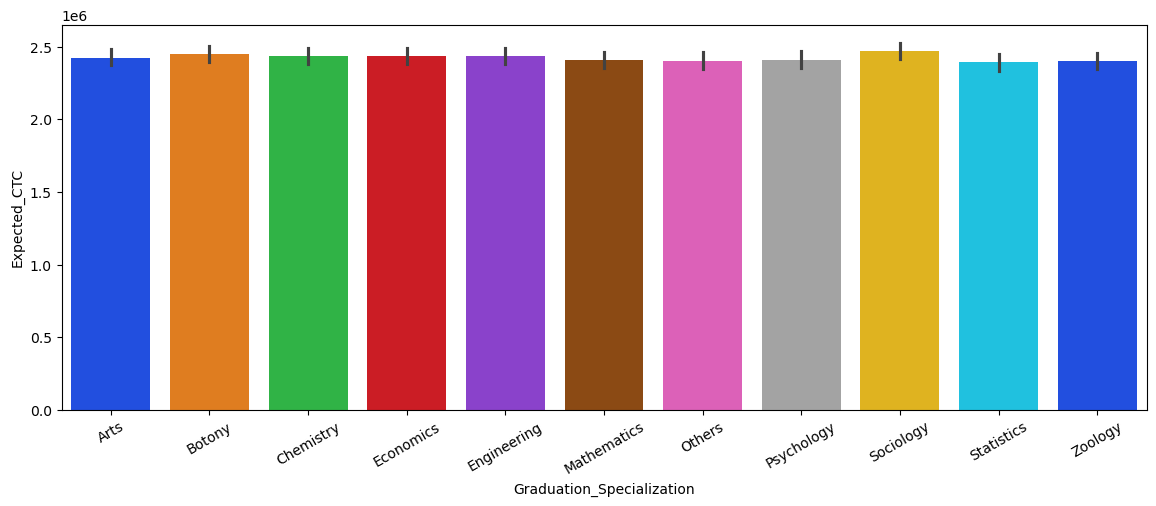

In [32]:
plt.figure(figsize=(14, 5))
plt.xticks(rotation=30)
sns.barplot(hr, x= "Graduation_Specialization", y = "Expected_CTC", palette='bright')

* There is no relation between Gradualization specialization and Expected_CTC. So we can drop this column too since it has 24% missing values.

C:\Users\PRABHU KRISHNAN\AppData\Local\Temp\ipykernel_29072\1415568780.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(hr, x= "University_Grad", y = "Expected_CTC", palette='bright')


<Axes: xlabel='University_Grad', ylabel='Expected_CTC'>

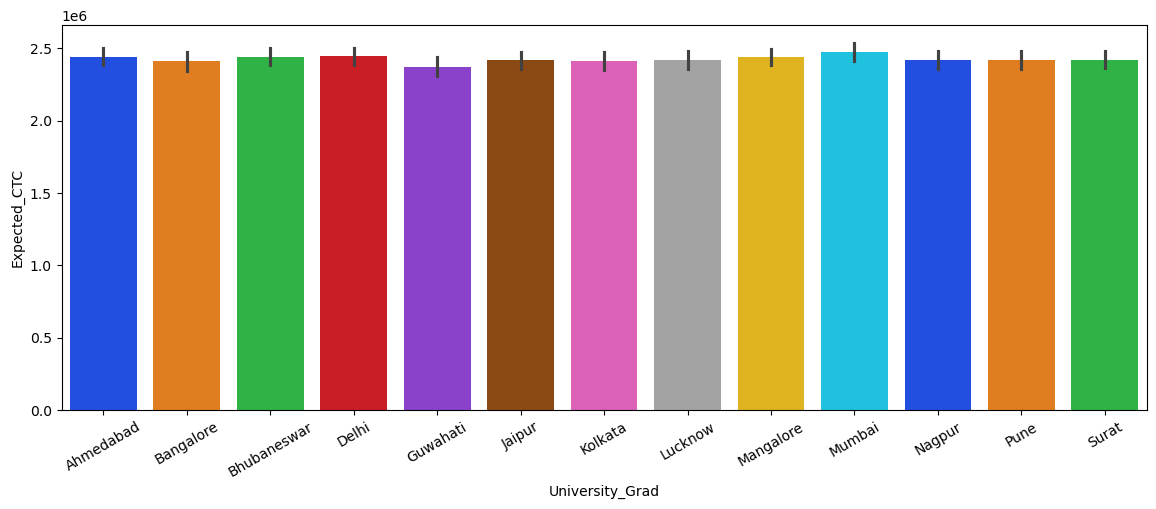

In [33]:
plt.figure(figsize=(14, 5))
plt.xticks(rotation=30)
sns.barplot(hr, x= "University_Grad", y = "Expected_CTC", palette='bright')

* There is no relation between University_Grad and Expected_CTC. So we can drop this column too since it has 24% missing values.

C:\Users\PRABHU KRISHNAN\AppData\Local\Temp\ipykernel_29072\2841356890.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(hr, x= "Passing_Year_Of_Graduation", y = "Expected_CTC", palette='bright')


<Axes: xlabel='Passing_Year_Of_Graduation', ylabel='Expected_CTC'>

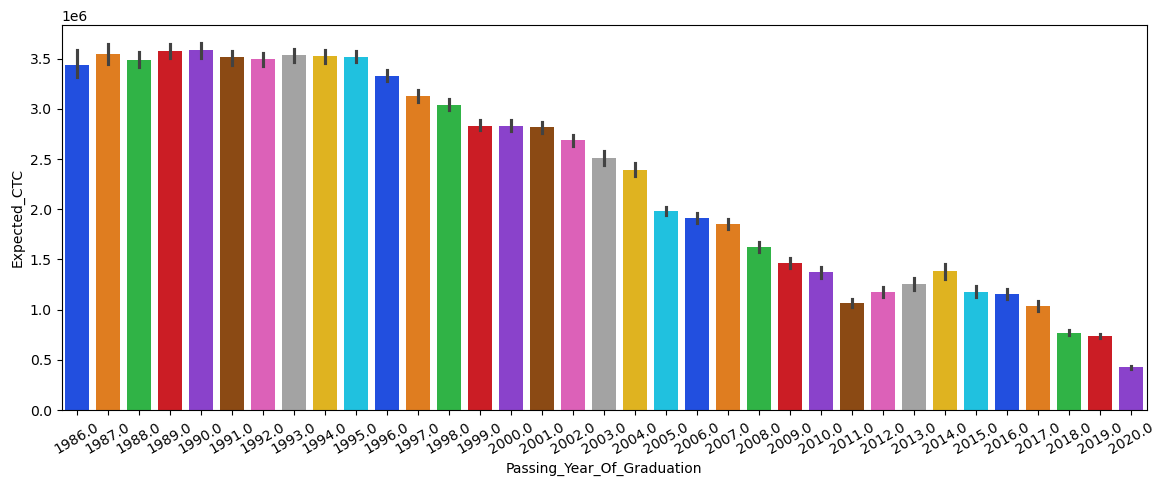

In [34]:
plt.figure(figsize=(14, 5))
plt.xticks(rotation=30)
sns.barplot(hr, x= "Passing_Year_Of_Graduation", y = "Expected_CTC", palette='bright')

* 'Passing year of Graduation' has some impact on the Expected_CTC. Even though it has 24% missing values, instead of dropping them, we have to impute the missing values.

**Creating Years since UG from Passing year of Graduation**

In [459]:
# 1. Create missing flag
hr['UG_Year_Missing'] = hr['Passing_Year_Of_Graduation'].isnull().astype(int)

# 2. Impute with median and create 'Years_Since_UG'
median_ug = hr['Passing_Year_Of_Graduation'].median()
hr['Years_Since_UG'] = 2025 - hr['Passing_Year_Of_Graduation'].fillna(median_ug)

# 3. Drop unnecessary original columns
hr.drop(['Graduation_Specialization', 'University_Grad', 'Passing_Year_Of_Graduation'], axis=1, inplace=True)


In [460]:
hr.head(10)

Total_Experience  Total_Experience_in_field_applied      Department  \
0                 0                                  0             NaN   
1                23                                 14              HR   
2                21                                 12  Top Management   
3                15                                  8         Banking   
4                10                                  5           Sales   
5                16                                  3  Top Management   
6                 1                                  1     Engineering   
7                19                                 11          Others   
8                 8                                  7    Analytics/BI   
9                15                                 15    Analytics/BI   

                 Role   Industry Organization        Designation  Education  \
0                 NaN        NaN          NaN                NaN         PG   
1          Consultant  Analytics            H                 HR  Doctorate   
2          Consultant   Training            J                NaN  Doctorate   
3   Financial Analyst   Aviation            F                 HR  Doctorate   
4     Project Manager  Insurance            E    Medical Officer       Grad   
5  Area Sales Manager     Retail            G           Director  Doctorate   
6           Team Lead       FMCG            L  Marketing Manager       Grad   
7             Analyst     Others            E            Manager         PG   
8              Others    Telecom            L  Marketing Manager  Doctorate   
9                 CEO    Telecom            M    Product Manager  Doctorate   

  Curent_Location Preferred_location  Current_CTC Inhand_Offer  \
0        Guwahati               Pune            0            N   
1       Bangalore             Nagpur      2702664            Y   
2       Ahmedabad             Jaipur      2236661            Y   
3          Kanpur            Kolkata      2100510            N   
4       Ahmedabad          Ahmedabad      1931644            N   
5            Pune        Bhubaneswar      3511167            Y   
6           Delhi               Pune       492917            Y   
7           Surat          Bangalore      2693459            N   
8          Nagpur           Guwahati      1630225            N   
9       Bangalore        Bhubaneswar      1761797            Y   

  Last_Appraisal_Rating  No_Of_Companies_worked  Number_of_Publications  \
0                   NaN                       0                       0   
1         Key_Performer                       2                       4   
2         Key_Performer                       5                       3   
3                     C                       5                       3   
4                     C                       2                       3   
5                     C                       5                       4   
6                     B                       3                       3   
7                     C                       6                       1   
8                     A                       6                       6   
9                     A                       5                       6   

   Certifications  International_degree_any  Expected_CTC  PHD_Year_Missing  \
0               0                         0        384551                 1   
1               0                         0       3783729                 0   
2               0                         0       3131325                 0   
3               0                         0       2608833                 0   
4               0                         0       2221390                 0   
5               0                         0       4522383                 0   
6               0                         0        630933                 0   
7               1                         0       3221376                 1   
8               0                         0       2288

In [461]:
missing_info = hr.isnull().sum().to_frame(name='Missing_Values')
missing_info['Missing_%'] = (missing_info['Missing_Values'] / len(hr)) * 100
missing_info = missing_info[missing_info['Missing_Values'] > 0]
missing_info.sort_values(by='Missing_%', ascending=False)

Missing_Values  Missing_%
Designation                      3129     12.516
Department                       2778     11.112
Role                              963      3.852
Industry                          908      3.632
Organization                      908      3.632
Last_Appraisal_Rating             908      3.632

**Treating missing values of Industry, Organization and Last appraisal meeting**

In [462]:
#Adding 'Not available' and 'Not_rated' to the Catogories first
hr['Industry'] = hr['Industry'].cat.add_categories('Not available')
hr['Industry'] = hr['Industry'].fillna('Not available')

hr['Organization'] = hr['Organization'].cat.add_categories('Not available')
hr['Organization'] = hr['Organization'].fillna('Not available')

hr['Last_Appraisal_Rating'] = hr['Last_Appraisal_Rating'].cat.add_categories('Not_rated')
hr['Last_Appraisal_Rating'] = hr['Last_Appraisal_Rating'].fillna('Not_rated')




In [463]:
missing_info = hr.isnull().sum().to_frame(name='Missing_Values')
missing_info['Missing_%'] = (missing_info['Missing_Values'] / len(hr)) * 100
missing_info = missing_info[missing_info['Missing_Values'] > 0]
missing_info.sort_values(by='Missing_%', ascending=False)

Missing_Values  Missing_%
Designation            3129     12.516
Department             2778     11.112
Role                    963      3.852

**Treating missing values of Designation and Department**

In [464]:
# Add 'Not available' as a category and fill missing values for Designation
hr['Designation'] = hr['Designation'].cat.add_categories('Not available')
hr['Designation'] = hr['Designation'].fillna('Not available')

# Add 'Not available' as a category and fill missing values for Department
hr['Department'] = hr['Department'].cat.add_categories('Not available')
hr['Department'] = hr['Department'].fillna('Not available')



**Treating missing values of  Role**

In [465]:
# Add 'Not available' as a category and fill missing values for Role
hr['Role'] = hr['Role'].cat.add_categories('Not available')
hr['Role'] = hr['Role'].fillna('Not available')


In [466]:
hr.isnull().sum()


Total_Experience                     0
Total_Experience_in_field_applied    0
Department                           0
Role                                 0
Industry                             0
Organization                         0
Designation                          0
Education                            0
Curent_Location                      0
Preferred_location                   0
Current_CTC                          0
Inhand_Offer                         0
Last_Appraisal_Rating                0
No_Of_Companies_worked               0
Number_of_Publications               0
Certifications                       0
International_degree_any             0
Expected_CTC                         0
PHD_Year_Missing                     0
Years_Since_PHD                      0
PG_Year_Missing                      0
Years_Since_PG                       0
UG_Year_Missing                      0
Years_Since_UG                       0
dtype: int64

* Therefore, all the missing values have been treated.

### OUTLIERS

In [243]:
# Select only numerical columns
numeric_cols = hr.select_dtypes(include=['number'])

# Function to calculate outlier percentage
def outlier_percentage(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    return round(len(outliers) / len(series) * 100, 2)

# Apply the function to each numeric column
outlier_percentages = numeric_cols.apply(outlier_percentage)

# Display the results
print("Outlier Percentage by Column:\n")
print(outlier_percentages)


Outlier Percentage by Column:

Total_Experience                      0.00
Total_Experience_in_field_applied     0.48
Current_CTC                           0.00
No_Of_Companies_worked                0.00
Number_of_Publications                0.00
Certifications                       11.77
International_degree_any              8.17
Expected_CTC                          0.00
PHD_Year_Missing                      0.00
Years_Since_PHD                      44.66
PG_Year_Missing                       0.00
Years_Since_PG                        0.00
UG_Year_Missing                      24.72
Years_Since_UG                        0.00
dtype: float64


In [117]:
hr.head()

Total_Experience  Total_Experience_in_field_applied      Department  \
0                 0                                  0   Not available   
1                23                                 14              HR   
2                21                                 12  Top Management   
3                15                                  8         Banking   
4                10                                  5           Sales   

                Role       Industry   Organization      Designation  \
0      Not available  Not available  Not available    Not available   
1         Consultant      Analytics              H               HR   
2         Consultant       Training              J    Not available   
3  Financial Analyst       Aviation              F               HR   
4    Project Manager      Insurance              E  Medical Officer   

   Education Curent_Location Preferred_location  Current_CTC Inhand_Offer  \
0         PG        Guwahati               Pune            0            N   
1  Doctorate       Bangalore             Nagpur      2702664            Y   
2  Doctorate       Ahmedabad             Jaipur      2236661            Y   
3  Doctorate          Kanpur            Kolkata      2100510            N   
4       Grad       Ahmedabad          Ahmedabad      1931644            N   

  Last_Appraisal_Rating  No_Of_Companies_worked  Number_of_Publications  \
0             Not_rated                       0                       0   
1         Key_Performer                       2                       4   
2         Key_Performer                       5                       3   
3                     C                       5                       3   
4                     C                       2                       3   

   Certifications  International_degree_any  Expected_CTC  PHD_Year_Missing  \
0               0                         0        384551                 1   
1               0                         0       3783729                 0   
2               0                         0       3131325                 0   
3               0                         0       2608833                 0   
4               0                         0       2221390                 0   

   Years_Since_PHD  PG_Year_Missing  Years_Since_PG  UG_Year_Missing  \
0             18.0                1            19.0                0   
1             28.0                0            35.0                0   
2             26.0                0            33.0                0   
3             20.0                0            26.0                0   
4             15.0                0            19.0                0   

   Years_Since_UG  
0             5.0  
1            37.0  
2            35.0  
3            28.0  
4            21.0

In [118]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Total_Experience                   25000 non-null  int64   
 1   Total_Experience_in_field_applied  25000 non-null  int64   
 2   Department                         25000 non-null  category
 3   Role                               25000 non-null  category
 4   Industry                           25000 non-null  category
 5   Organization                       25000 non-null  category
 6   Designation                        25000 non-null  category
 7   Education                          25000 non-null  category
 8   Curent_Location                    25000 non-null  category
 9   Preferred_location                 25000 non-null  category
 10  Current_CTC                        25000 non-null  int64   
 11  Inhand_Offer                       25000 

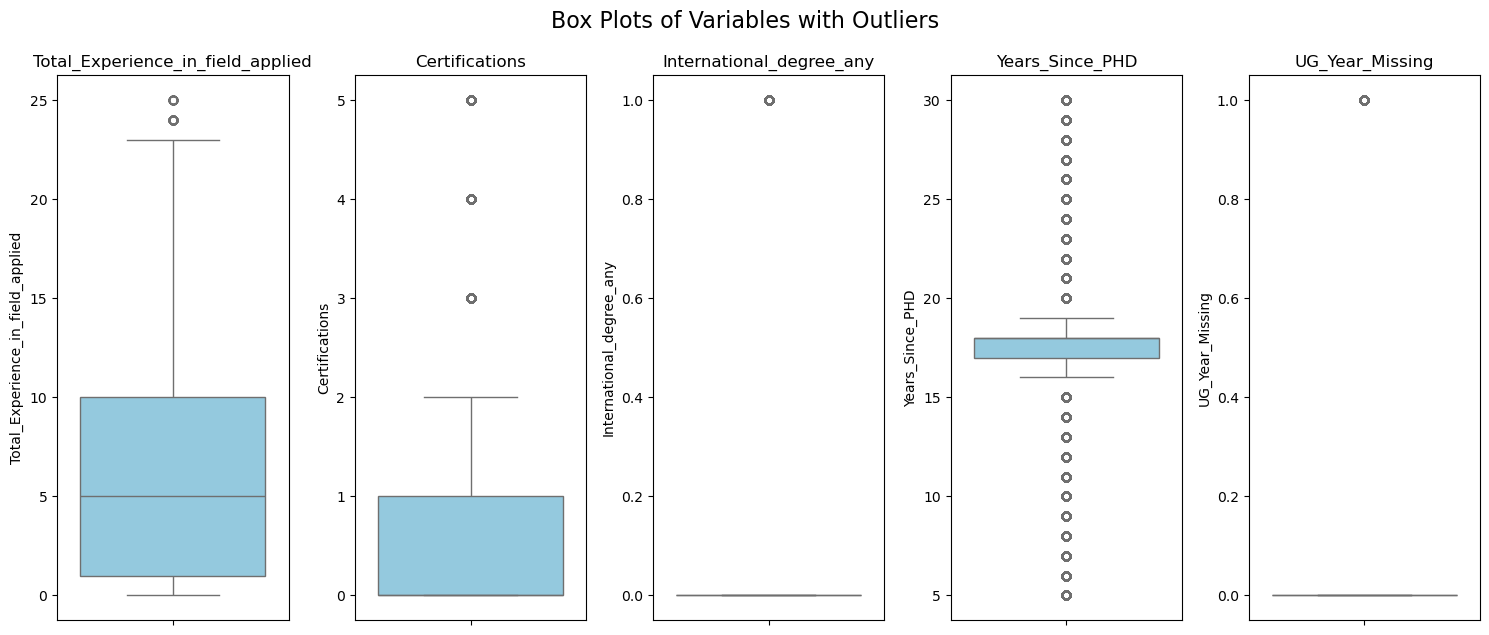

In [245]:

outlier_percentages = {
    'Total_Experience_in_field_applied': 0.48,
    'Certifications': 11.77,
    'International_degree_any': 8.17,
    'Years_Since_PHD': 44.66,
    'UG_Year_Missing': 24.72,
}

# Extract the columns with outliers
columns_with_outliers = [col for col, pct in outlier_percentages.items() if pct > 0]

# Create box plots
plt.figure(figsize=(15, 6))
for i, col in enumerate(columns_with_outliers, 1):
    plt.subplot(1, len(columns_with_outliers), i)
    sns.boxplot(y=hr[col], color='skyblue')  # Assuming 'hr' is your original DataFrame
    plt.title(col)
    plt.tight_layout()

plt.suptitle("Box Plots of Variables with Outliers", fontsize=16, y=1.05)
plt.show()


In [110]:
hr["UG_Year_Missing"].value_counts()

UG_Year_Missing
0    18820
1     6180
Name: count, dtype: int64

In [112]:
hr["Certifications"].value_counts()

Certifications
0    15215
1     4644
2     2198
3     1818
4      777
5      348
Name: count, dtype: int64

In [113]:
hr["International_degree_any"].value_counts()

International_degree_any
0    22957
1     2043
Name: count, dtype: int64

In [114]:
hr["Years_Since_PHD"].value_counts()

Years_Since_PHD
18.0    12361
21.0      536
27.0      536
20.0      534
24.0      533
13.0      532
26.0      528
12.0      521
28.0      517
22.0      516
8.0       511
7.0       510
30.0      510
14.0      509
11.0      508
29.0      505
19.0      496
16.0      494
6.0       493
10.0      491
17.0      484
15.0      481
25.0      477
23.0      474
5.0       473
9.0       470
Name: count, dtype: int64

In [115]:
hr["Total_Experience_in_field_applied"].value_counts()

Total_Experience_in_field_applied
0     3676
1     2781
2     2217
3     1932
4     1712
5     1533
6     1403
7     1232
8     1089
9      954
10     867
11     776
12     711
14     624
13     610
15     539
16     498
17     381
18     329
19     317
20     245
21     200
22     146
23     109
24      82
25      37
Name: count, dtype: int64

* No treatment of outliers has been done for the variables "UG_Year_Missing", "Certifications", "International_degree_any" and  "Total_Experience_in_field_applied" as the presence of outlier values are reasonable with these variables and removing these outliers might weaken the model.

### K MEANS CLUSTERING

**Normalization of Numeric variables** 

In [467]:
from sklearn.preprocessing import MinMaxScaler

# Make a copy to avoid modifying original
hr_scaled = hr.copy()

# List of numerical columns to normalize
numerical_cols = [
    'Total_Experience',
    'Total_Experience_in_field_applied',
    'Current_CTC',
    'No_Of_Companies_worked',
    'Number_of_Publications',
    'Certifications',
    'International_degree_any',
    'Expected_CTC',
    'PHD_Year_Missing',
    'Years_Since_PHD',
    'PG_Year_Missing',
    'Years_Since_PG',
    'UG_Year_Missing',
    'Years_Since_UG'
]

# Initialize scaler
scaler = MinMaxScaler()

# Apply scaler
hr_scaled[numerical_cols] = scaler.fit_transform(hr_scaled[numerical_cols])

# Now hr_scaled has normalized numerical columns (all between 0 and 1)


**Encoding categorical variables**

In [468]:
categorical_cols = [
    'Department',
    'Role',
    'Industry',
    'Organization',
    'Designation',
    'Education',
    'Curent_Location',
    'Preferred_location',
    'Last_Appraisal_Rating',
    'Inhand_Offer'
]


In [469]:
# Create a copy of the dataframe to avoid modifying original
hr_encoded = hr_scaled.copy()

# Perform one-hot encoding on categorical columns
hr_encoded = pd.get_dummies(hr_encoded, columns=categorical_cols, drop_first=True)


In [470]:
hr.shape

(25000, 24)

**Recursive Feature elimination**

In [471]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

# Define your features and target
X = hr_encoded.drop('Expected_CTC', axis=1)
y = hr_encoded['Expected_CTC']

# Use a simpler RandomForestRegressor for faster RFE
model = RandomForestRegressor(n_estimators=50, random_state=42)

# Initialize RFE to select top 10 features
rfe = RFE(estimator=model, n_features_to_select=10)

# Fit RFE
rfe.fit(X, y)

# Get selected features
selected_features = X.columns[rfe.support_]

print("Top 10 selected features by RFE:")
print(selected_features.tolist())


Top 10 selected features by RFE:
['Total_Experience', 'Current_CTC', 'Years_Since_PHD', 'UG_Year_Missing', 'Education_Grad', 'Education_PG', 'Education_Under Grad', 'Last_Appraisal_Rating_C', 'Last_Appraisal_Rating_D', 'Inhand_Offer_Y']


**K means**

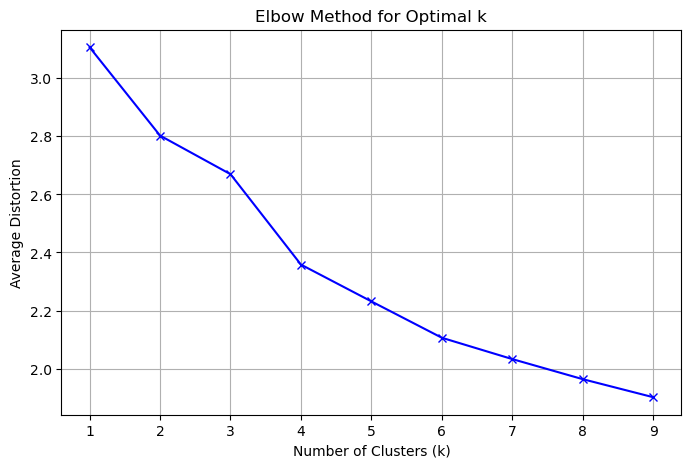

In [472]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

#RFE-selected top 10 features
selected_features = [
    'Total_Experience', 'Current_CTC', 'Years_Since_PHD', 'UG_Year_Missing',
    'Education_Grad', 'Education_PG', 'Education_Under Grad',
    'Last_Appraisal_Rating_C', 'Last_Appraisal_Rating_D', 'Inhand_Offer_Y'
]

# Subset the DataFrame 
X_selected = hr_encoded[selected_features]

#Normalize the selected features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

#Elbow Method to find optimal k
clusters = range(1, 10)
meanDistortions = []

for k in clusters:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=1)
    kmeans.fit(X_scaled)
    meanDistortions.append(
        np.mean(np.min(cdist(X_scaled, kmeans.cluster_centers_, 'euclidean'), axis=1))
    )

#Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average Distortion')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()


* We can see a clear bend at k=3 and k=4. So, we will be choosing from these two values after analysing the silhoutte scores 

**Silhoutte scores**

For n_clusters = 2, the silhouette score is 0.1845
For n_clusters = 3, the silhouette score is 0.1841
For n_clusters = 4, the silhouette score is 0.2511
For n_clusters = 5, the silhouette score is 0.2514
For n_clusters = 6, the silhouette score is 0.2453
For n_clusters = 7, the silhouette score is 0.2208
For n_clusters = 8, the silhouette score is 0.2266
For n_clusters = 9, the silhouette score is 0.2446


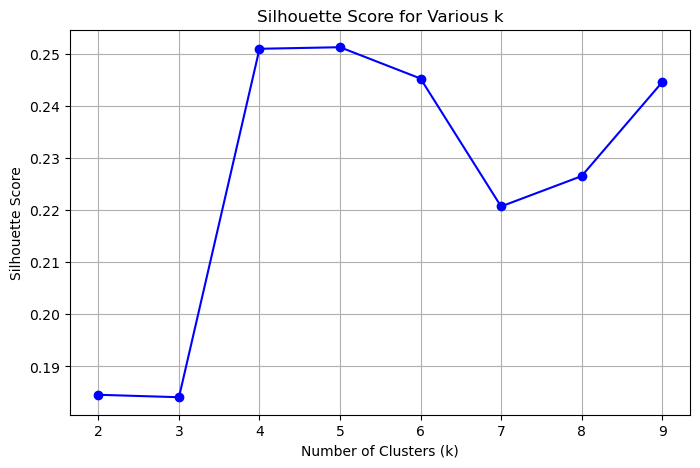

In [473]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

#Compute silhouette scores for k = 2 to 9
sil_scores = []
cluster_range = range(2, 10)

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=1)
    preds = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, preds)
    sil_scores.append(score)
    print(f"For n_clusters = {n_clusters}, the silhouette score is {score:.4f}")

#Plot silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, sil_scores, 'bo-')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Various k")
plt.grid(True)
plt.show()


* The silhoutte score for 4 clusters is greater than 3, we can proceed cluster profiling with k=4.

**CLUSTER PROFILING**

In [474]:
# let's take 4  as number of clusters
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X_scaled)

KMeans(n_clusters=4, random_state=0)

In [475]:
# Step 1: Apply final KMeans model using scaled features
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=1)
cluster_labels = kmeans.fit_predict(X_scaled)

# Step 2: Assign cluster labels to the original (unscaled) data
original_df = hr_encoded.copy()  # this must be your original preprocessed data
original_df['Cluster'] = cluster_labels

# Step 3: Compute cluster-wise mean of original (unscaled) feature values
cluster_profile_original = original_df.groupby('Cluster')[selected_features].mean().round(2)

# Step 4: Add record count in each cluster
cluster_profile_original['Count'] = original_df['Cluster'].value_counts().sort_index()

# Step 5: Display the profiling table
print("📊 Cluster Profiling (Original Feature Values):\n")
display(cluster_profile_original)


📊 Cluster Profiling (Original Feature Values):



Total_Experience  Current_CTC  Years_Since_PHD  UG_Year_Missing  \
Cluster                                                                    
0                    0.52         0.49             0.52              0.0   
1                    0.50         0.47             0.51              0.0   
2                    0.50         0.47             0.51              0.0   
3                    0.49         0.35             0.52              1.0   

         Education_Grad  Education_PG  Education_Under Grad  \
Cluster                                                       
0                  0.33          0.33                   0.0   
1                  0.00          1.00                   0.0   
2                  0.50          0.00                   0.0   
3                  0.00          0.00                   1.0   

         Last_Appraisal_Rating_C  Last_Appraisal_Rating_D  Inhand_Offer_Y  \
Cluster                                                                     
0                           0.00                      1.0            0.20   
1                           0.24                      0.0            0.33   
2                           0.25                      0.0            0.33   
3                           0.19                      0.2            0.29   

         Count  
Cluster         
0         3680  
1         5096  
2        10044  
3         6180

In [480]:
# Merge means, proportions, and dominant categories into one DataFrame
final_profile = cluster_profile.copy()

# Add median values (with a clear column name)
for col in cluster_profile_medians['Median'].columns:
    final_profile[f"{col}_Median"] = cluster_profile_medians['Median'][col]

# Round all numeric values to 2 decimal places
final_profile = final_profile.round(2)

# Display as a clean table
final_profile.reset_index(inplace=True) 
final_profile


Cluster  n_samples  share  Total_Experience  Current_CTC  Years_Since_PHD  \
0        0       3680   0.15             12.99   1957489.49            17.95   
1        1       5096   0.20             12.58   1863601.33            17.71   
2        2      10044   0.40             12.41   1865491.50            17.65   
3        3       6180   0.25             12.26   1389346.97            18.00   

   UG_Year_Missing  Education_Grad  Education_PG  Education_Under Grad  \
0              0.0            0.33          0.33                   0.0   
1              0.0            0.00          1.00                   0.0   
2              0.0            0.50          0.00                   0.0   
3              1.0            0.00          0.00                   1.0   

   Last_Appraisal_Rating_C  Last_Appraisal_Rating_D  Inhand_Offer_Y  \
0                     0.00                      1.0            0.20   
1                     0.24                      0.0            0.33   
2                     0.25                      0.0            0.33   
3                     0.19                      0.2            0.29   

  Education_Dominant Last_Appraisal_Dominant  Total_Experience_Median  \
0               Grad                       D                     13.0   
1                 PG                       C                     13.0   
2               Grad                       C                     12.0   
3         Under Grad                       D                     12.0   

   Current_CTC_Median  Years_Since_PHD_Median  
0           1994607.5                    18.0  
1           1851772.5                    18.0  
2           1957086.5                    18.0  
3           1416619.0                    18.0

**DATA BALANCE CHECK**

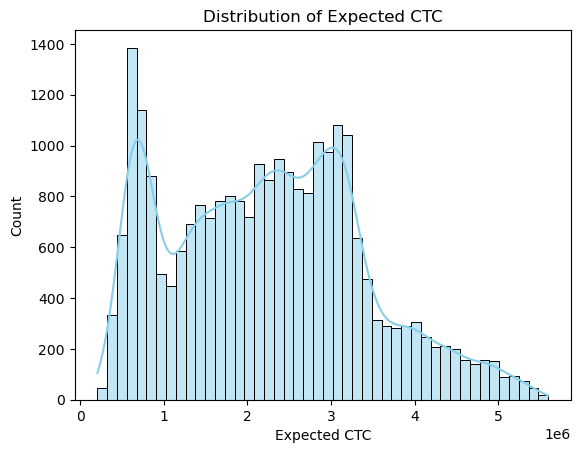

In [246]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(hr['Expected_CTC'], kde=True, color='skyblue')
plt.title("Distribution of Expected CTC")
plt.xlabel("Expected CTC")
plt.ylabel("Count")
plt.show()


# NOTES 2

## Data Preparation for Modeling

In [169]:
hr1 = hr.copy()

In [170]:
hr1.head()

Total_Experience  Total_Experience_in_field_applied      Department  \
0                 0                                  0   Not available   
1                23                                 14              HR   
2                21                                 12  Top Management   
3                15                                  8         Banking   
4                10                                  5           Sales   

                Role       Industry   Organization      Designation  \
0      Not available  Not available  Not available    Not available   
1         Consultant      Analytics              H               HR   
2         Consultant       Training              J    Not available   
3  Financial Analyst       Aviation              F               HR   
4    Project Manager      Insurance              E  Medical Officer   

   Education Curent_Location Preferred_location  Current_CTC Inhand_Offer  \
0         PG        Guwahati               Pune            0            N   
1  Doctorate       Bangalore             Nagpur      2702664            Y   
2  Doctorate       Ahmedabad             Jaipur      2236661            Y   
3  Doctorate          Kanpur            Kolkata      2100510            N   
4       Grad       Ahmedabad          Ahmedabad      1931644            N   

  Last_Appraisal_Rating  No_Of_Companies_worked  Number_of_Publications  \
0             Not_rated                       0                       0   
1         Key_Performer                       2                       4   
2         Key_Performer                       5                       3   
3                     C                       5                       3   
4                     C                       2                       3   

   Certifications  International_degree_any  Expected_CTC  PHD_Year_Missing  \
0               0                         0        384551                 1   
1               0                         0       3783729                 0   
2               0                         0       3131325                 0   
3               0                         0       2608833                 0   
4               0                         0       2221390                 0   

   Years_Since_PHD  PG_Year_Missing  Years_Since_PG  UG_Year_Missing  \
0             18.0                1            19.0                0   
1             28.0                0            35.0                0   
2             26.0                0            33.0                0   
3             20.0                0            26.0                0   
4             15.0                0            19.0                0   

   Years_Since_UG  
0             5.0  
1            37.0  
2            35.0  
3            28.0  
4            21.0

### RECURSIVE FEATURE ELIMINATION

In [171]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Make a copy to avoid changing original
df_rfe = hr1.copy()

# Drop rows with missing target
df_rfe = df_rfe.dropna(subset=['Expected_CTC'])

# Split into X and y
X = df_rfe.drop(columns=['Expected_CTC'])
y = df_rfe['Expected_CTC']

# Handle categorical variables (basic encoding for RFE)
X_encoded = pd.get_dummies(X, drop_first=True)

# Define Random Forest Regressor as estimator
rf = RandomForestRegressor(n_estimators=50, random_state=42)

# Apply RFE
rfe = RFE(estimator=rf, n_features_to_select=20)
rfe.fit(X_encoded, y)

# Get selected feature names
selected_features = X_encoded.columns[rfe.support_]

# Filter X with top features
X_selected = X_encoded[selected_features]

# Output selected features
print("\n✅ Top 15 Features selected by RFE (Random Forest):")
print(list(selected_features))



✅ Top 15 Features selected by RFE (Random Forest):
['Total_Experience', 'Current_CTC', 'Number_of_Publications', 'Certifications', 'Years_Since_PHD', 'PG_Year_Missing', 'Years_Since_PG', 'UG_Year_Missing', 'Years_Since_UG', 'Education_Grad', 'Education_PG', 'Education_Under Grad', 'Curent_Location_Lucknow', 'Curent_Location_Surat', 'Preferred_location_Ahmedabad', 'Inhand_Offer_Y', 'Last_Appraisal_Rating_B', 'Last_Appraisal_Rating_C', 'Last_Appraisal_Rating_D', 'Last_Appraisal_Rating_Key_Performer']


In [371]:
from sklearn.model_selection import train_test_split

# 70% train, 30% test
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)


In [372]:
# Ensure all data is numeric
X_train_const = sm.add_constant(X_train).astype(float)
y_train = y_train.astype(float)


## MODEL BUILDING-LINEAR REGRESSION 

In [373]:
# Build the model
model = sm.OLS(y_train, X_train_const).fit()
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:           Expected_CTC   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 1.004e+05
Date:                Sun, 03 Aug 2025   Prob (F-statistic):               0.00
Time:                        22:46:48   Log-Likelihood:            -2.2809e+05
No. Observations:               17500   AIC:                         4.562e+05
Df Residuals:                   17480   BIC:                         4.564e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

* The model is overfitting due to high r-squared value. So, we will drop the highly correlated variable 'Current_CTC' as it maybe a cause of Data leakage because of which overfitting is occuring.

**DROP CURRENT_CTC**

In [374]:
# Drop Current_CTC
X_revised = X_selected.drop(columns=['Current_CTC'])

# Train-test split 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_revised, y, test_size=0.3, random_state=42)

# Add constant and ensure numeric types
import statsmodels.api as sm
X_train_const = sm.add_constant(X_train).astype(float)
y_train = y_train.astype(float)

# Fit model
model = sm.OLS(y_train, X_train_const).fit()

# Show summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:           Expected_CTC   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     3875.
Date:                Sun, 03 Aug 2025   Prob (F-statistic):               0.00
Time:                        22:46:52   Log-Likelihood:            -2.5517e+05
No. Observations:               17500   AIC:                         5.104e+05
Df Residuals:                   17481   BIC:                         5.105e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

* Now the Model performance is not overfitting with r-squared value of 0.8 which is a good fit. Now we will remove the features with p-value greater than 0.05 and re-build the model

**REMOVING FEATURES WITH p-values GREATER THAN 0.05**

In [375]:
import statsmodels.api as sm
import pandas as pd

# Copy predictors and ensure numeric
predictors = X_train.copy().astype(float)
cols = predictors.columns.tolist()

# Backward elimination using p-value
max_p_value = 1

while len(cols) > 0:
    X_train_aux = predictors[cols]
    
    # Add constant for OLS
    X_train_aux_const = sm.add_constant(X_train_aux)

    # Fit the model
    model = sm.OLS(y_train, X_train_aux_const).fit()

    # Get p-values (excluding constant)
    p_values = model.pvalues.drop('const')  
    max_p_value = p_values.max()

    # Identify the variable with the highest p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print("✅ Selected features with p <= 0.05:")
print(selected_features)


✅ Selected features with p <= 0.05:
['Total_Experience', 'Number_of_Publications', 'Years_Since_PHD', 'PG_Year_Missing', 'Years_Since_PG', 'UG_Year_Missing', 'Years_Since_UG', 'Education_Grad', 'Education_PG', 'Education_Under Grad', 'Inhand_Offer_Y', 'Last_Appraisal_Rating_C', 'Last_Appraisal_Rating_D', 'Last_Appraisal_Rating_Key_Performer']


**MODEL BUIDLING AFTER REMOVING FEATURES WITH p-values GREATER THAN 0.05**

In [376]:
# Rebuild model
X_train_selected = sm.add_constant(X_train[selected_features].astype(float))
model_final = sm.OLS(y_train, X_train_selected).fit()

# Show summary
print(model_final.summary())


                            OLS Regression Results                            
Dep. Variable:           Expected_CTC   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     5364.
Date:                Sun, 03 Aug 2025   Prob (F-statistic):               0.00
Time:                        22:47:01   Log-Likelihood:            -2.5517e+05
No. Observations:               17500   AIC:                         5.104e+05
Df Residuals:                   17486   BIC:                         5.105e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [377]:
X_test_selected = sm.add_constant(X_test[selected_features].astype(float))

print("Train Performance (p-val filtered)\n")
display(model_performance_regression(model_final, X_train[selected_features], y_train))

print("\nTest Performance (p-val filtered)\n")
display(model_performance_regression(model_final, X_test[selected_features], y_test))


Train Performance (p-val filtered)



RMSE            MAE  R-squared  Adj. R-squared      MAPE
0  520312.64254  392523.753187   0.799516        0.799355  20.47383


Test Performance (p-val filtered)



RMSE          MAE  R-squared  Adj. R-squared      MAPE
0  513361.240063  384934.0049    0.80304        0.802671  19.92385

* The model performance remains the same after removing features but all the features are now with p-value lesser than 0.05 which means that all the features are statistically significant

**RESIDUAL PLOT OF LR MODEL**

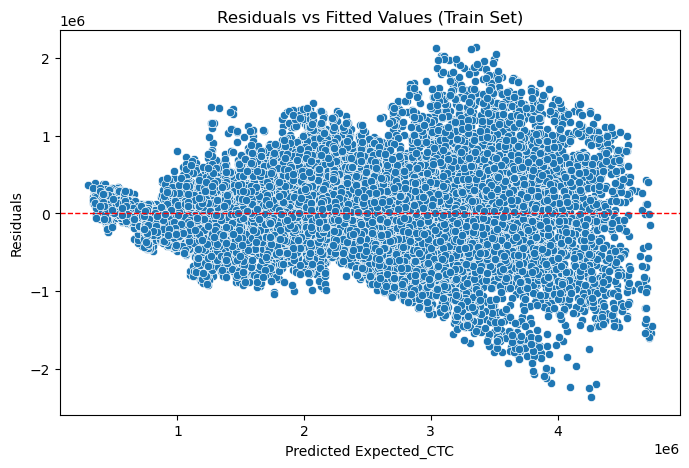

In [378]:
import matplotlib.pyplot as plt
import seaborn as sns

# Predict on training data
X_train_selected_const = sm.add_constant(X_train[selected_features]).astype(float)
y_train_pred = model_final.predict(X_train_selected_const)

# Calculate residuals
residuals = y_train - y_train_pred

# Residual Plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_train_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.xlabel("Predicted Expected_CTC")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values (Train Set)")
plt.show()


* A Clustered Pattern is there which means model is biased, so log transformation of Expected_CTC have to be done.

**LOG TRANSFORMATION OF TARGET VARIABLE**

In [379]:
import numpy as np

# Transform target
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)


**MODEL BUILDING AFTER LOG TRANSFORMATION**

In [380]:
X_train_const = sm.add_constant(X_train[selected_features]).astype(float)
model_log = sm.OLS(y_train_log, X_train_const).fit()

print(model_log.summary())


                            OLS Regression Results                            
Dep. Variable:           Expected_CTC   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     5359.
Date:                Sun, 03 Aug 2025   Prob (F-statistic):               0.00
Time:                        22:48:27   Log-Likelihood:                -2772.2
No. Observations:               17500   AIC:                             5572.
Df Residuals:                   17486   BIC:                             5681.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [381]:
X_test_const = sm.add_constant(X_test[selected_features]).astype(float)
y_pred_log = model_log.predict(X_test_const)

# Inverse transformation
y_pred_actual = np.expm1(y_pred_log)


In [382]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

rmse = np.sqrt(mean_squared_error(y_test, y_pred_actual))
mae = mean_absolute_error(y_test, y_pred_actual)
r2 = r2_score(y_test, y_pred_actual)
mape = np.mean(np.abs((y_test - y_pred_actual) / y_test)) * 100

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.4f}")
print(f"MAPE: {mape:.2f}%")


RMSE: 657863.06
MAE: 485098.87
R²: 0.6766
MAPE: 23.42%


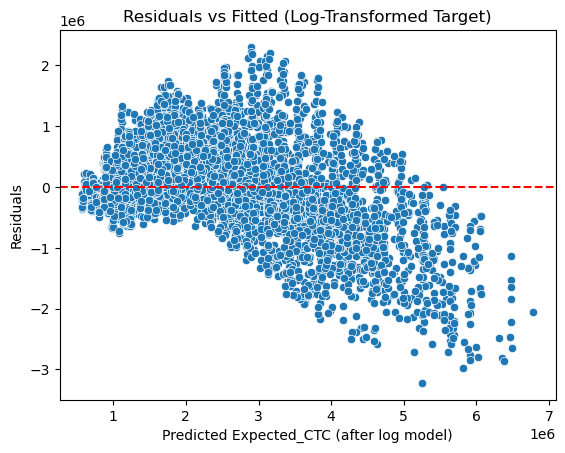

In [323]:
residuals_log = y_test - y_pred_actual
sns.scatterplot(x=y_pred_actual, y=residuals_log)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Expected_CTC (after log model)")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted (Log-Transformed Target)")
plt.show()


* Performance has decreased with r-squared of 67% and MAPE has increased to 23% and Residual plot still has patterns even after log transformation of Expected_CTC, so it can be inferred that Linear regression model is **not a good model** for predicting the Salary.

**Result table of LR model:**

In [383]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import statsmodels.api as sm

# Initialize empty dict to store transposed results
model_results_transposed = {}

def evaluate_and_store_model_transposed(name, model, X_train, y_train, X_test, y_test, is_statsmodel=True, residual_bias="Unknown"):
    # Predictions
    if is_statsmodel:
        X_train_const = sm.add_constant(X_train).astype(float)
        X_test_const = sm.add_constant(X_test).astype(float)
        y_train_pred = model.predict(X_train_const)
        y_test_pred = model.predict(X_test_const)
        n_train, p_train = X_train.shape
        n_test, p_test = X_test.shape
    else:
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        n_train, p_train = X_train.shape
        n_test, p_test = X_test.shape

    # Train metrics
    r2_train = r2_score(y_train, y_train_pred)
    adj_r2_train = 1 - (1 - r2_train) * (n_train - 1) / (n_train - p_train - 1)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    mape_train = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100

    # Test metrics
    r2_test = r2_score(y_test, y_test_pred)
    adj_r2_test = 1 - (1 - r2_test) * (n_test - 1) / (n_test - p_test - 1)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    mape_test = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

    # Overfitting check
    overfitting = "Yes" if (r2_train - r2_test) > 0.05 else "No"

    # Store in dict
    model_results_transposed[name] = [
        round(r2_train, 4),
        round(adj_r2_train, 4),
        round(rmse_train, 2),
        round(mape_train, 2),
        round(r2_test, 4),
        round(adj_r2_test, 4),
        round(rmse_test, 2),
        round(mape_test, 2),
        overfitting,
        residual_bias
    ]

# Define row names (metrics)
metric_rows = [
    "Train R²", "Train Adj. R²", "Train RMSE", "Train MAPE (%)",
    "Test R²", "Test Adj. R²", "Test RMSE", "Test MAPE (%)",
    "Overfitting?", "Residual Bias?"
]

# Example usage
evaluate_and_store_model_transposed(
    name="Linear Regression",
    model=model_final,
    X_train=X_train[selected_features],
    y_train=y_train,
    X_test=X_test[selected_features],
    y_test=y_test,
    is_statsmodel=True,
    residual_bias="Yes (∩-shaped)"
)

# Convert final result to transposed DataFrame
final_results_df = pd.DataFrame(model_results_transposed, index=metric_rows)

# Display
from IPython.display import display
display(final_results_df)


Linear Regression
Train R²                  0.7995
Train Adj. R²             0.7994
Train RMSE             520312.64
Train MAPE (%)             20.47
Test R²                    0.803
Test Adj. R²              0.8027
Test RMSE              513361.24
Test MAPE (%)              19.92
Overfitting?                  No
Residual Bias?    Yes (∩-shaped)

## LASSO REGRESSION

In [384]:
from sklearn.linear_model import LassoCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import numpy as np

# Pipeline with scaling and LassoCV
lasso_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', LassoCV(cv=5, random_state=42))
])

# Fit model
lasso_pipeline.fit(X_train, y_train)

# Predict
y_train_pred = lasso_pipeline.predict(X_train)
y_test_pred = lasso_pipeline.predict(X_test)

# Function to calculate metrics
def get_metrics(y_true, y_pred, X):
    r2 = r2_score(y_true, y_pred)
    adj_r2 = 1 - (1 - r2) * (len(y_true) - 1) / (len(y_true) - X.shape[1] - 1)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return round(r2, 4), round(adj_r2, 4), round(rmse, 2), round(mape, 2)

# Calculate train/test metrics
train_r2, train_adj_r2, train_rmse, train_mape = get_metrics(y_train, y_train_pred, X_train)
test_r2, test_adj_r2, test_rmse, test_mape = get_metrics(y_test, y_test_pred, X_test)

# Transposed DataFrame
lasso_transposed = pd.DataFrame({
    "Lasso Regression": [
        train_r2,
        train_adj_r2,
        train_rmse,
        train_mape,
        test_r2,
        test_adj_r2,
        test_rmse,
        test_mape,
        "No" if (train_r2 - test_r2) <= 0.05 else "Yes",
        "Check plot"
    ]
}, index=[
    "Train R²",
    "Train Adj. R²",
    "Train RMSE",
    "Train MAPE (%)",
    "Test R²",
    "Test Adj. R²",
    "Test RMSE",
    "Test MAPE (%)",
    "Overfitting?",
    "Residual Bias?"
])

# Display
from IPython.display import display
display(lasso_transposed)


Lasso Regression
Train R²                 0.7995
Train Adj. R²            0.7993
Train RMSE            520275.55
Train MAPE (%)            20.49
Test R²                  0.8031
Test Adj. R²             0.8026
Test RMSE             513298.79
Test MAPE (%)             19.93
Overfitting?                 No
Residual Bias?       Check plot

* Performance of Lasso Regression is very similar to Linear regression as the metrics have not changed.

**Significant features from LASSO REGRESSION**

In [385]:
# Get feature names and coefficients from fitted pipeline
feature_names = X_train.columns
lasso_coefs = lasso_pipeline.named_steps['lasso'].coef_

# Filter non-zero coefficients
significant_features_lasso = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': lasso_coefs
})
significant_features_lasso = significant_features_lasso[significant_features_lasso['Coefficient'] != 0]

# Sort by absolute importance
significant_features_lasso['Abs_Coefficient'] = significant_features_lasso['Coefficient'].abs()
significant_features_lasso = significant_features_lasso.sort_values(by='Abs_Coefficient', ascending=False)

# Drop the helper column
significant_features_lasso.drop(columns='Abs_Coefficient', inplace=True)

# Display
display(significant_features_lasso)


Feature    Coefficient
0                      Total_Experience  799466.366284
6                       UG_Year_Missing -329775.789790
8                        Education_Grad -325437.023130
9                          Education_PG -184667.248647
7                        Years_Since_UG  171372.566635
10                 Education_Under Grad -170876.238873
16              Last_Appraisal_Rating_C  -74859.090016
5                        Years_Since_PG  -67016.386670
18  Last_Appraisal_Rating_Key_Performer   65836.484771
17              Last_Appraisal_Rating_D  -54510.413809
3                       Years_Since_PHD   46310.584471
4                       PG_Year_Missing   42563.957557
1                Number_of_Publications  -13985.214432
14                       Inhand_Offer_Y   11881.472000
2                        Certifications   -7388.306961
15              Last_Appraisal_Rating_B   -6001.496008
12                Curent_Location_Surat   -2848.828315
11              Curent_Location_Lucknow     232.409399

**RESIDUAL PLOT**

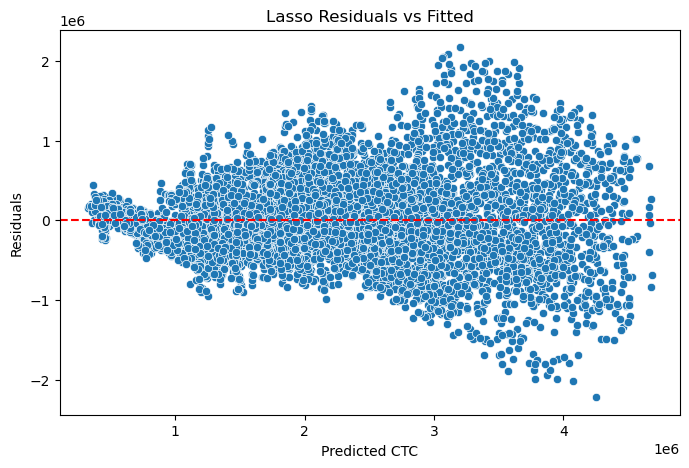

In [386]:
import matplotlib.pyplot as plt
import seaborn as sns

residuals = y_test - y_test_pred
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted CTC")
plt.ylabel("Residuals")
plt.title("Lasso Residuals vs Fitted")
plt.show()


* There is a funnel shaped pattern which means that the model is biased

In [387]:
# Adding Lasso model to transposed table
evaluate_and_store_model_transposed(
    name="Lasso Regression",
    model=lasso_pipeline,
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    is_statsmodel=False,
    residual_bias="Yes (mild funnel)"
)

# Display updated table
final_results_df = pd.DataFrame(model_results_transposed, index=metric_rows)
from IPython.display import display
display(final_results_df)


Linear Regression   Lasso Regression
Train R²                  0.7995             0.7995
Train Adj. R²             0.7994             0.7993
Train RMSE             520312.64          520275.55
Train MAPE (%)             20.47              20.49
Test R²                    0.803             0.8031
Test Adj. R²              0.8027             0.8026
Test RMSE              513361.24          513298.79
Test MAPE (%)              19.92              19.93
Overfitting?                  No                 No
Residual Bias?    Yes (∩-shaped)  Yes (mild funnel)

## RIDGE REGRESSION

In [388]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd

# 1. Ridge Regression with Cross-Validation
alphas = np.logspace(-3, 3, 100)
ridge = RidgeCV(alphas=alphas, cv=5)
ridge.fit(X_train, y_train)

# 2. Predictions
y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

# 3. Function for adjusted R²
def adjusted_r2(r2, n, k):
    return 1 - ((1 - r2) * (n - 1)) / (n - k - 1)

# 4. Train Metrics
r2_train = r2_score(y_train, y_train_pred)
adj_r2_train = adjusted_r2(r2_train, len(y_train), X_train.shape[1])
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
mae_train = mean_absolute_error(y_train, y_train_pred)
mape_train = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100

# 5. Test Metrics
r2_test = r2_score(y_test, y_test_pred)
adj_r2_test = adjusted_r2(r2_test, len(y_test), X_test.shape[1])
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
mae_test = mean_absolute_error(y_test, y_test_pred)
mape_test = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

# 6. Print the results
print("Ridge Regression Performance Metrics:")
print(f"Train R²: {r2_train:.4f}, Adjusted R²: {adj_r2_train:.4f}, RMSE: {rmse_train:.2f}, MAPE: {mape_train:.2f}%")
print(f"Test  R²: {r2_test:.4f}, Adjusted R²: {adj_r2_test:.4f}, RMSE: {rmse_test:.2f}, MAPE: {mape_test:.2f}%")

# 7. Significant features (non-zero coefficients)
ridge_coefficients = pd.Series(ridge.coef_, index=X_train.columns)
significant_features = ridge_coefficients[ridge_coefficients != 0].sort_values(ascending=False)

print("\nSignificant Features (non-zero coefficients):")
display(significant_features)


Ridge Regression Performance Metrics:
Train R²: 0.7996, Adjusted R²: 0.7994, RMSE: 520221.24, MAPE: 20.49%
Test  R²: 0.8032, Adjusted R²: 0.8027, RMSE: 513155.39, MAPE: 19.93%

Significant Features (non-zero coefficients):


Last_Appraisal_Rating_Key_Performer    172149.950786
PG_Year_Missing                        115919.091503
Total_Experience                       106380.233091
Inhand_Offer_Y                          29803.876637
Years_Since_UG                          25145.219974
Years_Since_PHD                          9311.305645
Curent_Location_Lucknow                  4914.843082
Preferred_location_Ahmedabad              717.461336
Number_of_Publications                  -4641.181078
Certifications                          -6305.925034
Years_Since_PG                         -10308.591748
Curent_Location_Surat                  -15380.443162
Last_Appraisal_Rating_B                -19999.781079
Last_Appraisal_Rating_D               -142910.996530
Last_Appraisal_Rating_C               -195724.631382
Education_PG                          -430164.019451
Education_Under Grad                  -593035.218508
UG_Year_Missing                       -593035.218533
Education_Grad                        -758420.

* Performance of Ridge regression is also very similar to Linear and Lasso regression. Lets check the performance for other models in upcoming section

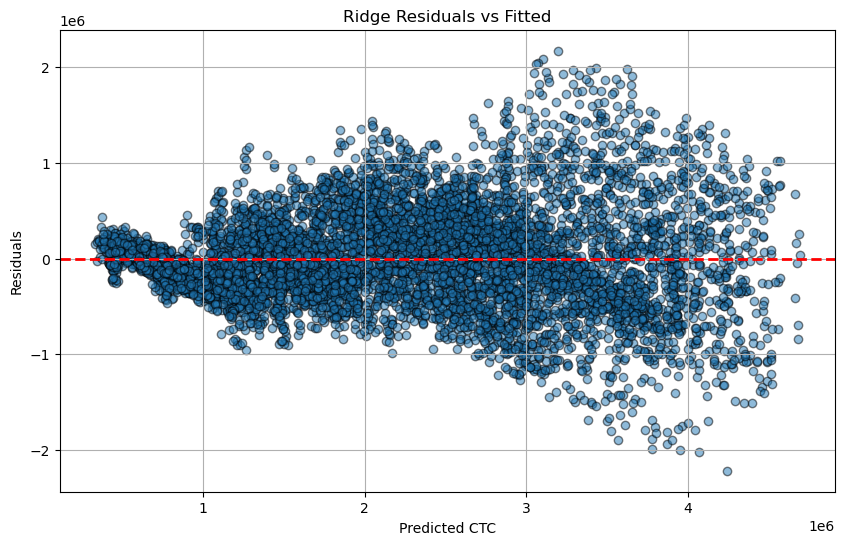

In [389]:
import matplotlib.pyplot as plt

# Residuals
residuals_ridge = y_test - y_test_pred

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test_pred, residuals_ridge, alpha=0.5, edgecolors='k')
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.title("Ridge Residuals vs Fitted")
plt.xlabel("Predicted CTC")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()


* There is a visible significant clustered pattern which means the model is biased

In [390]:

metric_rows = [
    "Train R²", "Train Adj. R²", "Train RMSE", "Train MAPE (%)",
    "Test R²", "Test Adj. R²", "Test RMSE", "Test MAPE (%)",
    "Overfitting?", "Residual Bias?"
]

# Store metrics for Ridge Regression
ridge_metrics = [
    round(train_r2, 4),
    round(train_adj_r2, 4),
    round(train_rmse, 2),
    round(train_mape, 2),
    round(test_r2, 4),
    round(test_adj_r2, 4),
    round(test_rmse, 2),
    round(test_mape, 2),
    "No",  
    "Check plot"
]

# Append Ridge model to model_results_transposed dictionary
model_results_transposed["Ridge Regression"] = ridge_metrics

# Recreate the final transposed results dataframe
final_results_df = pd.DataFrame(model_results_transposed, index=metric_rows)

# Display the updated result table
from IPython.display import display
display(final_results_df)


Linear Regression   Lasso Regression Ridge Regression
Train R²                  0.7995             0.7995           0.7995
Train Adj. R²             0.7994             0.7993           0.7993
Train RMSE             520312.64          520275.55        520275.55
Train MAPE (%)             20.47              20.49            20.49
Test R²                    0.803             0.8031           0.8031
Test Adj. R²              0.8027             0.8026           0.8026
Test RMSE              513361.24          513298.79        513298.79
Test MAPE (%)              19.92              19.93            19.93
Overfitting?                  No                 No               No
Residual Bias?    Yes (∩-shaped)  Yes (mild funnel)       Check plot

In [391]:
# Update residual bias value for Ridge Regression
final_results_df.loc["Residual Bias?", "Ridge Regression"] = "Yes (mild funnel)"

# Display updated result table
from IPython.display import display
display(final_results_df)


Linear Regression   Lasso Regression   Ridge Regression
Train R²                  0.7995             0.7995             0.7995
Train Adj. R²             0.7994             0.7993             0.7993
Train RMSE             520312.64          520275.55          520275.55
Train MAPE (%)             20.47              20.49              20.49
Test R²                    0.803             0.8031             0.8031
Test Adj. R²              0.8027             0.8026             0.8026
Test RMSE              513361.24          513298.79          513298.79
Test MAPE (%)              19.92              19.93              19.93
Overfitting?                  No                 No                 No
Residual Bias?    Yes (∩-shaped)  Yes (mild funnel)  Yes (mild funnel)

## POLYNOMIAL REGRESSION

In [392]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Create polynomial features (degree = 2 as default)
degree = 2
poly_pipeline = make_pipeline(PolynomialFeatures(degree=degree, include_bias=False),
                               LinearRegression())

# Fit model
poly_pipeline.fit(X_train, y_train)

# Predict
y_train_pred = poly_pipeline.predict(X_train)
y_test_pred = poly_pipeline.predict(X_test)

# Evaluation metrics
def adjusted_r2(r2, n, k):
    return 1 - (1 - r2) * ((n - 1) / (n - k - 1))

n_train, n_test = len(y_train), len(y_test)
k = X_train.shape[1] * degree  # number of features increases due to polynomial expansion

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

train_adj_r2 = adjusted_r2(train_r2, n_train, k)
test_adj_r2 = adjusted_r2(test_r2, n_test, k)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

train_mape = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
test_mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

# Print metrics
print(f"Train R²: {train_r2:.4f}")
print(f"Train Adj. R²: {train_adj_r2:.4f}")
print(f"Train RMSE: {train_rmse:.2f}")
print(f"Train MAPE: {train_mape:.2f}%")
print(f"Test R²: {test_r2:.4f}")
print(f"Test Adj. R²: {test_adj_r2:.4f}")
print(f"Test RMSE: {test_rmse:.2f}")
print(f"Test MAPE: {test_mape:.2f}%")


Train R²: 0.8313
Train Adj. R²: 0.8310
Train RMSE: 477249.45
Train MAPE: 19.14%
Test R²: 0.8305
Test Adj. R²: 0.8296
Test RMSE: 476232.39
Test MAPE: 18.65%


In [393]:
# Extract feature names from PolynomialFeatures
feature_names = poly_pipeline.named_steps['polynomialfeatures'].get_feature_names_out(X_train.columns)
coefficients = poly_pipeline.named_steps['linearregression'].coef_

# Combine into DataFrame
poly_coefs = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Show top contributing features (abs value)
significant_poly_features = poly_coefs.reindex(poly_coefs.Coefficient.abs().sort_values(ascending=False).index)
print(significant_poly_features.head(10))


                                   Feature   Coefficient
3                          Years_Since_PHD  3.024299e+14
0                         Total_Experience -2.931777e+14
5                           Years_Since_PG  3.901805e+13
131                       Years_Since_UG^2 -2.180915e+13
106          Years_Since_PG Years_Since_UG  2.180915e+13
26         Total_Experience Years_Since_UG  2.180915e+13
24         Total_Experience Years_Since_PG -2.180915e+13
29   Total_Experience Education_Under Grad -1.647864e+13
25        Total_Experience UG_Year_Missing -1.647647e+13
73                       Years_Since_PHD^2 -1.386441e+13


* Now the performance in Polynomial regression has slightly increased with r-squared of 83.05 which is a good fit but MAPE is 18.65%. A good model should have MAPE atleast lesser than 15%. So, we will check the other models for better performance.

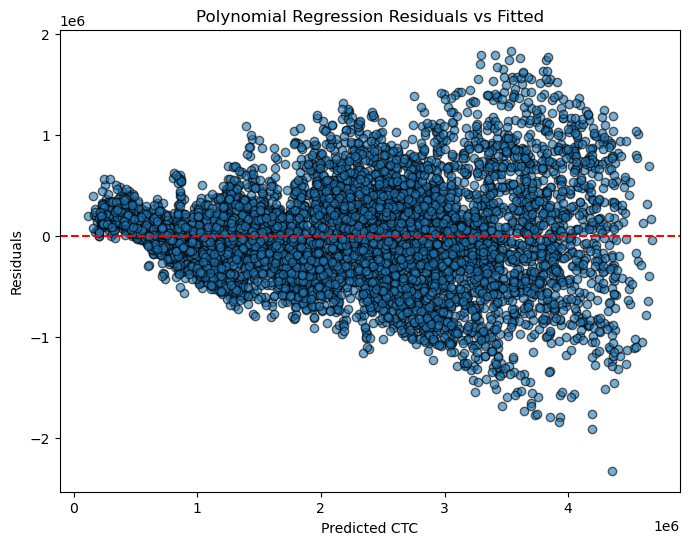

In [394]:
import matplotlib.pyplot as plt

residuals = y_test - y_test_pred

plt.figure(figsize=(8, 6))
plt.scatter(y_test_pred, residuals, edgecolor='k', alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted CTC")
plt.ylabel("Residuals")
plt.title("Polynomial Regression Residuals vs Fitted")
plt.show()


* There is a significant clustered pattern as we can see from the plot which means the model is biased.

In [395]:
evaluate_and_store_model_transposed(
    name="Polynomial Regression (deg=2)",
    model=poly_pipeline,
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    is_statsmodel=False,
    residual_bias="Yes (wide curve)"
)

# Display updated table
final_results_df = pd.DataFrame(model_results_transposed, index=metric_rows)
from IPython.display import display
display(final_results_df)


Linear Regression   Lasso Regression Ridge Regression  \
Train R²                  0.7995             0.7995           0.7995   
Train Adj. R²             0.7994             0.7993           0.7993   
Train RMSE             520312.64          520275.55        520275.55   
Train MAPE (%)             20.47              20.49            20.49   
Test R²                    0.803             0.8031           0.8031   
Test Adj. R²              0.8027             0.8026           0.8026   
Test RMSE              513361.24          513298.79        513298.79   
Test MAPE (%)              19.92              19.93            19.93   
Overfitting?                  No                 No               No   
Residual Bias?    Yes (∩-shaped)  Yes (mild funnel)       Check plot   

               Polynomial Regression (deg=2)  
Train R²                              0.8313  
Train Adj. R²                         0.8311  
Train RMSE                         477249.45  
Train MAPE (%)                         19.14  
Test R²                               0.8305  
Test Adj. R²                          0.8301  
Test RMSE                          476232.39  
Test MAPE (%)                          18.65  
Overfitting?                              No  
Residual Bias?              Yes (wide curve)

In [396]:
# Update residual bias value for Ridge Regression
final_results_df.loc["Residual Bias?", "Ridge Regression"] = "Yes (mild funnel)"

# Re-display updated result table
from IPython.display import display
display(final_results_df)


Linear Regression   Lasso Regression   Ridge Regression  \
Train R²                  0.7995             0.7995             0.7995   
Train Adj. R²             0.7994             0.7993             0.7993   
Train RMSE             520312.64          520275.55          520275.55   
Train MAPE (%)             20.47              20.49              20.49   
Test R²                    0.803             0.8031             0.8031   
Test Adj. R²              0.8027             0.8026             0.8026   
Test RMSE              513361.24          513298.79          513298.79   
Test MAPE (%)              19.92              19.93              19.93   
Overfitting?                  No                 No                 No   
Residual Bias?    Yes (∩-shaped)  Yes (mild funnel)  Yes (mild funnel)   

               Polynomial Regression (deg=2)  
Train R²                              0.8313  
Train Adj. R²                         0.8311  
Train RMSE                         477249.45  
Train MAPE (%)                         19.14  
Test R²                               0.8305  
Test Adj. R²                          0.8301  
Test RMSE                          476232.39  
Test MAPE (%)                          18.65  
Overfitting?                              No  
Residual Bias?              Yes (wide curve)

## RANDOM FOREST REGRESSION

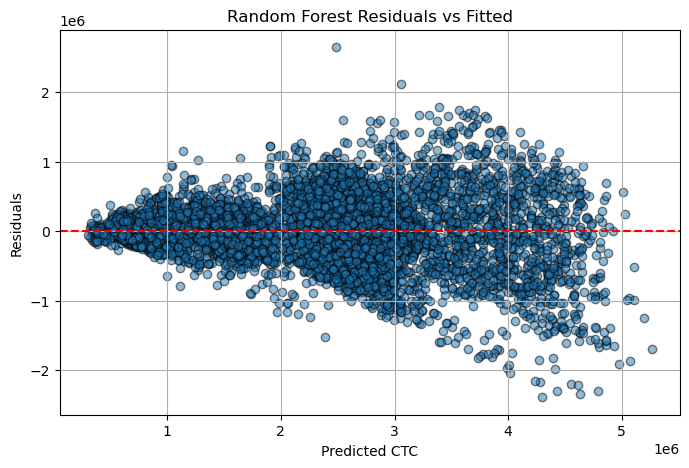

Linear Regression   Lasso Regression Ridge Regression  \
Train R²                  0.7995             0.7995           0.7995   
Train Adj. R²             0.7994             0.7993           0.7993   
Train RMSE             520312.64          520275.55        520275.55   
Train MAPE (%)             20.47              20.49            20.49   
Test R²                    0.803             0.8031           0.8031   
Test Adj. R²              0.8027             0.8026           0.8026   
Test RMSE              513361.24          513298.79        513298.79   
Test MAPE (%)              19.92              19.93            19.93   
Overfitting?                  No                 No               No   
Residual Bias?    Yes (∩-shaped)  Yes (mild funnel)       Check plot   

               Polynomial Regression (deg=2)  Random Forest Regressor  
Train R²                              0.8313                   0.9678  
Train Adj. R²                         0.8311                   0.9677  
Train RMSE                         477249.45                208640.91  
Train MAPE (%)                         19.14                      6.6  
Test R²                               0.8305                   0.8457  
Test Adj. R²                          0.8301                   0.8453  
Test RMSE                          476232.39                 454439.3  
Test MAPE (%)                          18.65                    14.81  
Overfitting?                              No                      Yes  
Residual Bias?              Yes (wide curve)  Yes (random cone shape)

In [397]:
# 1. Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_percentage_error, root_mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# 2. Fit the Random Forest Regressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# 3. Predictions
y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)

# 4. Metrics Calculation
n_train, n_test = len(y_train), len(y_test)
k = X_train.shape[1]

def adjusted_r2(r2, n, k):
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))

train_r2 = r2_score(y_train, y_train_pred_rf)
test_r2 = r2_score(y_test, y_test_pred_rf)
train_adj_r2 = adjusted_r2(train_r2, n_train, k)
test_adj_r2 = adjusted_r2(test_r2, n_test, k)

train_rmse = root_mean_squared_error(y_train, y_train_pred_rf)
test_rmse = root_mean_squared_error(y_test, y_test_pred_rf)

train_mape = mean_absolute_percentage_error(y_train, y_train_pred_rf) * 100
test_mape = mean_absolute_percentage_error(y_test, y_test_pred_rf) * 100

# 5. Residual plot
residuals_rf = y_test - y_test_pred_rf
plt.figure(figsize=(8, 5))
plt.scatter(y_test_pred_rf, residuals_rf, alpha=0.5, edgecolors='k')
plt.axhline(0, color='red', linestyle='--')
plt.title("Random Forest Residuals vs Fitted")
plt.xlabel("Predicted CTC")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()

# 6. Overfitting and residual bias notes
overfit_rf = "Yes" if abs(train_r2 - test_r2) > 0.05 else "No"
residual_bias_rf = "Yes (random cone shape)"  

# 7. Append to model results transposed table
model_results_transposed["Random Forest Regressor"] = [
    round(train_r2, 4),
    round(train_adj_r2, 4),
    round(train_rmse, 2),
    round(train_mape, 2),
    round(test_r2, 4),
    round(test_adj_r2, 4),
    round(test_rmse, 2),
    round(test_mape, 2),
    overfit_rf,
    residual_bias_rf
]

# 8. Display updated result table
final_results_df = pd.DataFrame(model_results_transposed, index=metric_rows)
from IPython.display import display
display(final_results_df)


In [398]:
# Correct Ridge residual bias again (persistent update)
final_results_df.loc["Residual Bias?", "Ridge Regression"] = "Yes (mild funnel)"
display(final_results_df)

Linear Regression   Lasso Regression   Ridge Regression  \
Train R²                  0.7995             0.7995             0.7995   
Train Adj. R²             0.7994             0.7993             0.7993   
Train RMSE             520312.64          520275.55          520275.55   
Train MAPE (%)             20.47              20.49              20.49   
Test R²                    0.803             0.8031             0.8031   
Test Adj. R²              0.8027             0.8026             0.8026   
Test RMSE              513361.24          513298.79          513298.79   
Test MAPE (%)              19.92              19.93              19.93   
Overfitting?                  No                 No                 No   
Residual Bias?    Yes (∩-shaped)  Yes (mild funnel)  Yes (mild funnel)   

               Polynomial Regression (deg=2)  Random Forest Regressor  
Train R²                              0.8313                   0.9678  
Train Adj. R²                         0.8311                   0.9677  
Train RMSE                         477249.45                208640.91  
Train MAPE (%)                         19.14                      6.6  
Test R²                               0.8305                   0.8457  
Test Adj. R²                          0.8301                   0.8453  
Test RMSE                          476232.39                 454439.3  
Test MAPE (%)                          18.65                    14.81  
Overfitting?                              No                      Yes  
Residual Bias?              Yes (wide curve)  Yes (random cone shape)

* It can be seen from the residual plot that there is a symmetrical pattern prevailing which means that the model is biased.
* The performance of RF regressor has increased with r-squared value of 84.5% and MAPE less than 15% but the model is overfitting due to high value of Train r-squared- 96.7%. So, this model cannot be suitable for the best model.

## XG BOOST REGRESSION

In [399]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error
import numpy as np

# Fit XGBoost model
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions
y_train_pred_xgb = xgb_model.predict(X_train)
y_test_pred_xgb = xgb_model.predict(X_test)

# Adjusted R2
def adjusted_r2(r2, n, k):
    return 1 - ((1 - r2) * (n - 1)) / (n - k - 1)

n_train, n_test = len(y_train), len(y_test)
k = X_train.shape[1]

# Metrics
train_r2 = r2_score(y_train, y_train_pred_xgb)
test_r2 = r2_score(y_test, y_test_pred_xgb)
train_adj_r2 = adjusted_r2(train_r2, n_train, k)
test_adj_r2 = adjusted_r2(test_r2, n_test, k)
train_rmse = mean_squared_error(y_train, y_train_pred_xgb, squared=False)
test_rmse = mean_squared_error(y_test, y_test_pred_xgb, squared=False)
train_mape = mean_absolute_percentage_error(y_train, y_train_pred_xgb) * 100
test_mape = mean_absolute_percentage_error(y_test, y_test_pred_xgb) * 100
overfit_xgb = "Yes" if abs(train_r2 - test_r2) > 0.05 else "No"
residual_bias_xgb = "Check plot"

# Store results
xgb_results = {
    "Train R²": train_r2,
    "Train Adj. R²": train_adj_r2,
    "Train RMSE": train_rmse,
    "Train MAPE (%)": train_mape,
    "Test R²": test_r2,
    "Test Adj. R²": test_adj_r2,
    "Test RMSE": test_rmse,
    "Test MAPE (%)": test_mape,
    "Overfitting?": overfit_xgb,
    "Residual Bias?": residual_bias_xgb
}

# Display metrics
import pandas as pd
pd.DataFrame(xgb_results, index=["XGBoost Regressor"]).T


C:\Users\PRABHU KRISHNAN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\PRABHU KRISHNAN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


XGBoost Regressor
Train R²                0.913237
Train Adj. R²           0.913142
Train RMSE         342288.737869
Train MAPE (%)         11.941631
Test R²                 0.863904
Test Adj. R²            0.863558
Test RMSE          426732.793537
Test MAPE (%)          14.120644
Overfitting?                  No
Residual Bias?        Check plot

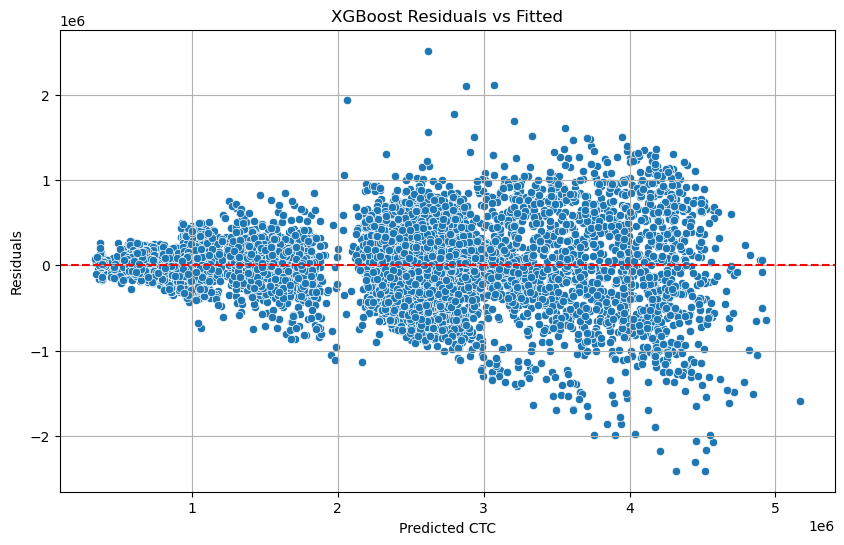

In [400]:
import matplotlib.pyplot as plt
import seaborn as sns

# Residuals
residuals_xgb = y_test - y_test_pred_xgb

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_pred_xgb, y=residuals_xgb, edgecolor='w')
plt.axhline(0, color='red', linestyle='--')
plt.title("XGBoost Residuals vs Fitted")
plt.xlabel("Predicted CTC")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()


* There is a significant symmetrical pattern and funnel shaped pattern towards the end which means that model is biased.

In [401]:
# Based on the residual plot observation
residual_bias_xgb = "Yes (clustered bulge shape)"


In [402]:
# Append XGBoost metrics to the final_results_df
evaluate_and_store_model_transposed(
    name="XGBoost Regressor",
    model=xgb_model,  
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    is_statsmodel=False,
    residual_bias=residual_bias_xgb
)

# Display the updated result table
from IPython.display import display
final_results_df = pd.DataFrame(model_results_transposed, index=metric_rows)
display(final_results_df)


Linear Regression   Lasso Regression Ridge Regression  \
Train R²                  0.7995             0.7995           0.7995   
Train Adj. R²             0.7994             0.7993           0.7993   
Train RMSE             520312.64          520275.55        520275.55   
Train MAPE (%)             20.47              20.49            20.49   
Test R²                    0.803             0.8031           0.8031   
Test Adj. R²              0.8027             0.8026           0.8026   
Test RMSE              513361.24          513298.79        513298.79   
Test MAPE (%)              19.92              19.93            19.93   
Overfitting?                  No                 No               No   
Residual Bias?    Yes (∩-shaped)  Yes (mild funnel)       Check plot   

               Polynomial Regression (deg=2)  Random Forest Regressor  \
Train R²                              0.8313                   0.9678   
Train Adj. R²                         0.8311                   0.9677   
Train RMSE                         477249.45                208640.91   
Train MAPE (%)                         19.14                      6.6   
Test R²                               0.8305                   0.8457   
Test Adj. R²                          0.8301                   0.8453   
Test RMSE                          476232.39                 454439.3   
Test MAPE (%)                          18.65                    14.81   
Overfitting?                              No                      Yes   
Residual Bias?              Yes (wide curve)  Yes (random cone shape)   

                          XGBoost Regressor  
Train R²                             0.9132  
Train Adj. R²                        0.9131  
Train RMSE                        342288.74  
Train MAPE (%)                        11.94  
Test R²                              0.8639  
Test Adj. R²                         0.8636  
Test RMSE                         426732.79  
Test MAPE (%)                         14.12  
Overfitting?                             No  
Residual Bias?  Yes (clustered bulge shape)

In [403]:
# Correcting Ridge residual bias 
final_results_df.loc["Residual Bias?", "Ridge Regression"] = "Yes (mild funnel)"
display(final_results_df)

Linear Regression   Lasso Regression   Ridge Regression  \
Train R²                  0.7995             0.7995             0.7995   
Train Adj. R²             0.7994             0.7993             0.7993   
Train RMSE             520312.64          520275.55          520275.55   
Train MAPE (%)             20.47              20.49              20.49   
Test R²                    0.803             0.8031             0.8031   
Test Adj. R²              0.8027             0.8026             0.8026   
Test RMSE              513361.24          513298.79          513298.79   
Test MAPE (%)              19.92              19.93              19.93   
Overfitting?                  No                 No                 No   
Residual Bias?    Yes (∩-shaped)  Yes (mild funnel)  Yes (mild funnel)   

               Polynomial Regression (deg=2)  Random Forest Regressor  \
Train R²                              0.8313                   0.9678   
Train Adj. R²                         0.8311                   0.9677   
Train RMSE                         477249.45                208640.91   
Train MAPE (%)                         19.14                      6.6   
Test R²                               0.8305                   0.8457   
Test Adj. R²                          0.8301                   0.8453   
Test RMSE                          476232.39                 454439.3   
Test MAPE (%)                          18.65                    14.81   
Overfitting?                              No                      Yes   
Residual Bias?              Yes (wide curve)  Yes (random cone shape)   

                          XGBoost Regressor  
Train R²                             0.9132  
Train Adj. R²                        0.9131  
Train RMSE                        342288.74  
Train MAPE (%)                        11.94  
Test R²                              0.8639  
Test Adj. R²                         0.8636  
Test RMSE                         426732.79  
Test MAPE (%)                         14.12  
Overfitting?                             No  
Residual Bias?  Yes (clustered bulge shape)

* The perfromance of XG Boost regressor has significantly increased with r-squared value of 86.4% and MAPE of 14.12% and the model is not overfitting which overall suggests that this is the best model built so far. Even though residual pattern is present, it can be negotiated with Model tuning.

## ADABOOST REGRESSION

In [404]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score, mean_absolute_percentage_error, root_mean_squared_error

# 1. Instantiate and train AdaBoost
ada_model = AdaBoostRegressor(random_state=42)
ada_model.fit(X_train, y_train)

# 2. Predict
y_train_pred_ada = ada_model.predict(X_train)
y_test_pred_ada = ada_model.predict(X_test)

# 3. Metrics
n_train, n_test = len(y_train), len(y_test)
k = X_train.shape[1]

def adjusted_r2(r2, n, k):
    return 1 - ((1 - r2) * (n - 1)) / (n - k - 1)

train_r2 = r2_score(y_train, y_train_pred_ada)
test_r2 = r2_score(y_test, y_test_pred_ada)
train_adj_r2 = adjusted_r2(train_r2, n_train, k)
test_adj_r2 = adjusted_r2(test_r2, n_test, k)

train_rmse = root_mean_squared_error(y_train, y_train_pred_ada)
test_rmse = root_mean_squared_error(y_test, y_test_pred_ada)

train_mape = mean_absolute_percentage_error(y_train, y_train_pred_ada) * 100
test_mape = mean_absolute_percentage_error(y_test, y_test_pred_ada) * 100

# 4. Overfitting & Residual bias
overfit_ada = "Yes" if abs(train_r2 - test_r2) > 0.05 else "No"
residual_bias_ada = "Check plot"


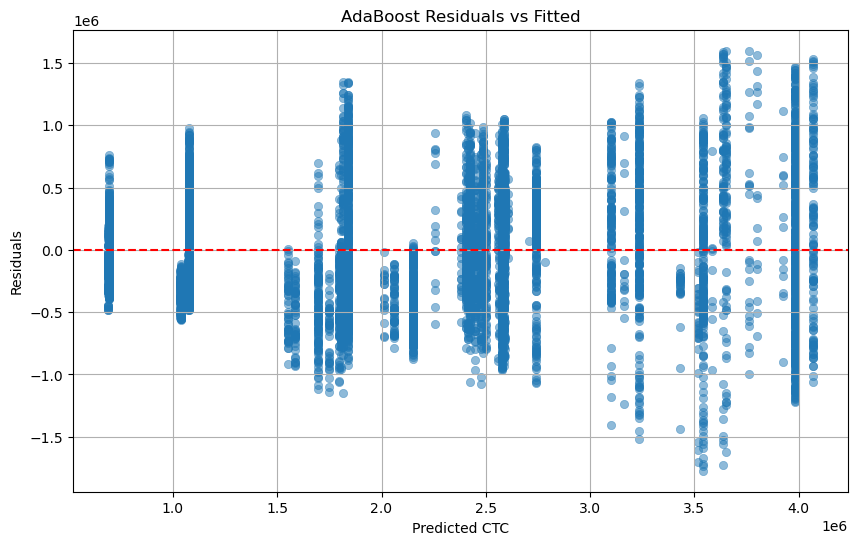

In [405]:
import matplotlib.pyplot as plt
import seaborn as sns

residuals_ada = y_test - y_test_pred_ada

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_pred_ada, y=residuals_ada, alpha=0.5, edgecolor=None)
plt.axhline(0, color='red', linestyle='--')
plt.title('AdaBoost Residuals vs Fitted')
plt.xlabel('Predicted CTC')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()


* There is a pattern of vertical lines prevailing in the residual plot which indicates that the model is biased.

In [406]:
evaluate_and_store_model_transposed(
    name="AdaBoost Regressor",
    model=ada_model,
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    is_statsmodel=False,
    residual_bias=residual_bias_ada
)

# Display updated results
from IPython.display import display
final_results_df = pd.DataFrame(model_results_transposed, index=metric_rows)
display(final_results_df)


Linear Regression   Lasso Regression Ridge Regression  \
Train R²                  0.7995             0.7995           0.7995   
Train Adj. R²             0.7994             0.7993           0.7993   
Train RMSE             520312.64          520275.55        520275.55   
Train MAPE (%)             20.47              20.49            20.49   
Test R²                    0.803             0.8031           0.8031   
Test Adj. R²              0.8027             0.8026           0.8026   
Test RMSE              513361.24          513298.79        513298.79   
Test MAPE (%)              19.92              19.93            19.93   
Overfitting?                  No                 No               No   
Residual Bias?    Yes (∩-shaped)  Yes (mild funnel)       Check plot   

               Polynomial Regression (deg=2)  Random Forest Regressor  \
Train R²                              0.8313                   0.9678   
Train Adj. R²                         0.8311                   0.9677   
Train RMSE                         477249.45                208640.91   
Train MAPE (%)                         19.14                      6.6   
Test R²                               0.8305                   0.8457   
Test Adj. R²                          0.8301                   0.8453   
Test RMSE                          476232.39                 454439.3   
Test MAPE (%)                          18.65                    14.81   
Overfitting?                              No                      Yes   
Residual Bias?              Yes (wide curve)  Yes (random cone shape)   

                          XGBoost Regressor AdaBoost Regressor  
Train R²                             0.9132             0.8114  
Train Adj. R²                        0.9131             0.8112  
Train RMSE                        342288.74          504639.46  
Train MAPE (%)                        11.94              23.36  
Test R²                              0.8639             0.8133  
Test Adj. R²                         0.8636             0.8129  
Test RMSE                         426732.79          499754.82  
Test MAPE (%)                         14.12              22.69  
Overfitting?                             No                 No  
Residual Bias?  Yes (clustered bulge shape)         Check plot

In [407]:
# Update Residual Bias for AdaBoost Regressor
final_results_df.loc["Residual Bias?", "AdaBoost Regressor"] = "Yes (vertical lines pattern)"

# Correct Ridge residual bias 
final_results_df.loc["Residual Bias?", "Ridge Regression"] = "Yes (mild funnel)"

# Display updated result table
from IPython.display import display
display(final_results_df)


Linear Regression   Lasso Regression   Ridge Regression  \
Train R²                  0.7995             0.7995             0.7995   
Train Adj. R²             0.7994             0.7993             0.7993   
Train RMSE             520312.64          520275.55          520275.55   
Train MAPE (%)             20.47              20.49              20.49   
Test R²                    0.803             0.8031             0.8031   
Test Adj. R²              0.8027             0.8026             0.8026   
Test RMSE              513361.24          513298.79          513298.79   
Test MAPE (%)              19.92              19.93              19.93   
Overfitting?                  No                 No                 No   
Residual Bias?    Yes (∩-shaped)  Yes (mild funnel)  Yes (mild funnel)   

               Polynomial Regression (deg=2)  Random Forest Regressor  \
Train R²                              0.8313                   0.9678   
Train Adj. R²                         0.8311                   0.9677   
Train RMSE                         477249.45                208640.91   
Train MAPE (%)                         19.14                      6.6   
Test R²                               0.8305                   0.8457   
Test Adj. R²                          0.8301                   0.8453   
Test RMSE                          476232.39                 454439.3   
Test MAPE (%)                          18.65                    14.81   
Overfitting?                              No                      Yes   
Residual Bias?              Yes (wide curve)  Yes (random cone shape)   

                          XGBoost Regressor            AdaBoost Regressor  
Train R²                             0.9132                        0.8114  
Train Adj. R²                        0.9131                        0.8112  
Train RMSE                        342288.74                     504639.46  
Train MAPE (%)                        11.94                         23.36  
Test R²                              0.8639                        0.8133  
Test Adj. R²                         0.8636                        0.8129  
Test RMSE                         426732.79                     499754.82  
Test MAPE (%)                         14.12                         22.69  
Overfitting?                             No                            No  
Residual Bias?  Yes (clustered bulge shape)  Yes (vertical lines pattern)

* The performance has decreased compared to XG Boost with r-squared value of 81.3% and increased MAPE of 22.7% which is not a satisfyingly good model when compared with XG Boost.

## SV REGRESSION

C:\Users\PRABHU KRISHNAN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\PRABHU KRISHNAN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


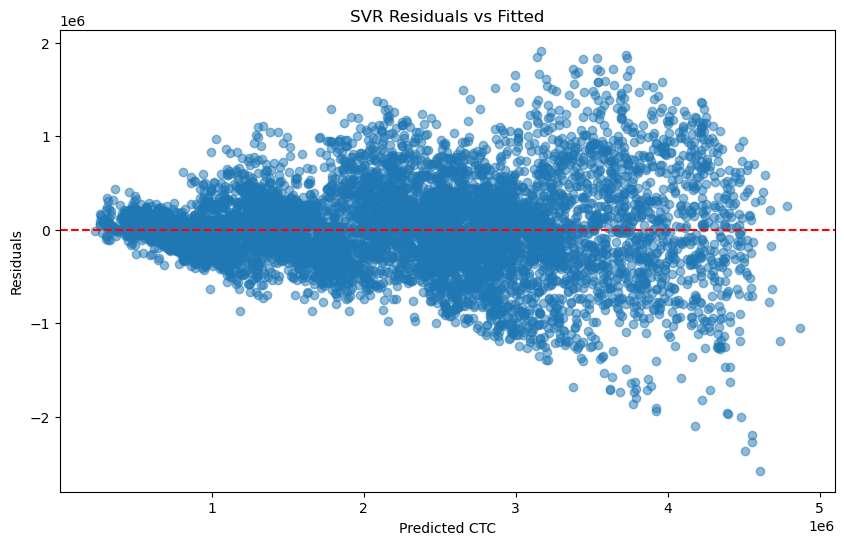

Linear Regression   Lasso Regression   Ridge Regression  \
Train R²                  0.7995             0.7995             0.7995   
Train Adj. R²             0.7994             0.7993             0.7993   
Train RMSE             520312.64          520275.55          520275.55   
Train MAPE (%)             20.47              20.49              20.49   
Test R²                    0.803             0.8031             0.8031   
Test Adj. R²              0.8027             0.8026             0.8026   
Test RMSE              513361.24          513298.79          513298.79   
Test MAPE (%)              19.92              19.93              19.93   
Overfitting?                  No                 No                 No   
Residual Bias?    Yes (∩-shaped)  Yes (mild funnel)  Yes (mild funnel)   

               Polynomial Regression (deg=2)  Random Forest Regressor  \
Train R²                              0.8313                   0.9678   
Train Adj. R²                         0.8311                   0.9677   
Train RMSE                         477249.45                208640.91   
Train MAPE (%)                         19.14                      6.6   
Test R²                               0.8305                   0.8457   
Test Adj. R²                          0.8301                   0.8453   
Test RMSE                          476232.39                 454439.3   
Test MAPE (%)                          18.65                    14.81   
Overfitting?                              No                      Yes   
Residual Bias?              Yes (wide curve)  Yes (random cone shape)   

                          XGBoost Regressor            AdaBoost Regressor  \
Train R²                             0.9132                        0.8114   
Train Adj. R²                        0.9131                        0.8112   
Train RMSE                        342288.74                     504639.46   
Train MAPE (%)                        11.94                         23.36   
Test R²                              0.8639                        0.8133   
Test Adj. R²                         0.8636                        0.8129   
Test RMSE                         426732.79                     499754.82   
Test MAPE (%)                         14.12                         22.69   
Overfitting?                             No                            No   
Residual Bias?  Yes (clustered bulge shape)  Yes (vertical lines pattern)   

                          SVR  
Train R²             0.849855  
Train Adj. R²        0.849691  
Train RMSE      450277.352312  
Train MAPE (%)      16.072687  
Test R²              0.836598  
Test Adj. R²         0.836183  
Test RMSE       467586.124387  
Test MAPE (%)       16.624304  
Overfitting?               No  
Residual Bias?     Check plot

In [408]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 1. Feature Scaling (required for SVR)
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

y_train_reshaped = y_train.values.reshape(-1, 1)
y_test_reshaped = y_test.values.reshape(-1, 1)

y_train_scaled = scaler_y.fit_transform(y_train_reshaped).ravel()
y_test_scaled = scaler_y.transform(y_test_reshaped).ravel()

# 2. Fit SVR
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train_scaled, y_train_scaled)

# 3. Predictions (inverse transformed to original scale)
y_train_pred_scaled = svr_model.predict(X_train_scaled)
y_test_pred_scaled = svr_model.predict(X_test_scaled)

y_train_pred = scaler_y.inverse_transform(y_train_pred_scaled.reshape(-1, 1)).ravel()
y_test_pred = scaler_y.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).ravel()

# 4. Metrics Calculation
def adjusted_r2(r2, n, k):
    return 1 - (1 - r2) * ((n - 1) / (n - k - 1))

n_train = len(y_train)
n_test = len(y_test)
k = X_train.shape[1]

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

train_adj_r2 = adjusted_r2(train_r2, n_train, k)
test_adj_r2 = adjusted_r2(test_r2, n_test, k)

train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)

train_mape = mean_absolute_percentage_error(y_train, y_train_pred) * 100
test_mape = mean_absolute_percentage_error(y_test, y_test_pred) * 100

# 5. Overfitting and Residual Bias
overfit_svr = "Yes" if abs(train_r2 - test_r2) > 0.05 else "No"
residual_bias_svr = "Check plot"

# 6. Residual Plot
residuals = y_test - y_test_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_test_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("SVR Residuals vs Fitted")
plt.xlabel("Predicted CTC")
plt.ylabel("Residuals")
plt.show()

# 7. Append to final_results_df
svr_results = {
    'SVR': [
        train_r2,
        train_adj_r2,
        train_rmse,
        train_mape,
        test_r2,
        test_adj_r2,
        test_rmse,
        test_mape,
        overfit_svr,
        residual_bias_svr
    ]
}

metric_names = [
    'Train R²',
    'Train Adj. R²',
    'Train RMSE',
    'Train MAPE (%)',
    'Test R²',
    'Test Adj. R²',
    'Test RMSE',
    'Test MAPE (%)',
    'Overfitting?',
    'Residual Bias?'
]

svr_df = pd.DataFrame(svr_results, index=metric_names)

# Final Results Table Update
final_results_df = pd.concat([final_results_df, svr_df], axis=1)

# Display Updated Table
from IPython.display import display
display(final_results_df)


In [409]:
# Update the residual bias cell for SVR
final_results_df.loc['Residual Bias?', 'SVR'] = "Yes (Clustered pattern)"

# Optional: display updated table
display(final_results_df)


Linear Regression   Lasso Regression   Ridge Regression  \
Train R²                  0.7995             0.7995             0.7995   
Train Adj. R²             0.7994             0.7993             0.7993   
Train RMSE             520312.64          520275.55          520275.55   
Train MAPE (%)             20.47              20.49              20.49   
Test R²                    0.803             0.8031             0.8031   
Test Adj. R²              0.8027             0.8026             0.8026   
Test RMSE              513361.24          513298.79          513298.79   
Test MAPE (%)              19.92              19.93              19.93   
Overfitting?                  No                 No                 No   
Residual Bias?    Yes (∩-shaped)  Yes (mild funnel)  Yes (mild funnel)   

               Polynomial Regression (deg=2)  Random Forest Regressor  \
Train R²                              0.8313                   0.9678   
Train Adj. R²                         0.8311                   0.9677   
Train RMSE                         477249.45                208640.91   
Train MAPE (%)                         19.14                      6.6   
Test R²                               0.8305                   0.8457   
Test Adj. R²                          0.8301                   0.8453   
Test RMSE                          476232.39                 454439.3   
Test MAPE (%)                          18.65                    14.81   
Overfitting?                              No                      Yes   
Residual Bias?              Yes (wide curve)  Yes (random cone shape)   

                          XGBoost Regressor            AdaBoost Regressor  \
Train R²                             0.9132                        0.8114   
Train Adj. R²                        0.9131                        0.8112   
Train RMSE                        342288.74                     504639.46   
Train MAPE (%)                        11.94                         23.36   
Test R²                              0.8639                        0.8133   
Test Adj. R²                         0.8636                        0.8129   
Test RMSE                         426732.79                     499754.82   
Test MAPE (%)                         14.12                         22.69   
Overfitting?                             No                            No   
Residual Bias?  Yes (clustered bulge shape)  Yes (vertical lines pattern)   

                                    SVR  
Train R²                       0.849855  
Train Adj. R²                  0.849691  
Train RMSE                450277.352312  
Train MAPE (%)                16.072687  
Test R²                        0.836598  
Test Adj. R²                   0.836183  
Test RMSE                 467586.124387  
Test MAPE (%)                 16.624304  
Overfitting?                         No  
Residual Bias?  Yes (Clustered pattern)

* We can see from the plot that there is a clustered pattern and funnel shaped pattern at the end as well which means that the model is biased
* The performance of Support Vector Regression is good compared to Adaboost but not better than XG Boost with r-squared and MAPE values of 83% and 16% respectively.
* So, as far of the 8 models built, it can be concluded that XG Boost is the best model as it has the highest Test r-squared value of 86.39% (most explained variance), lowest Test RMSE value of 426732.79, lowest Test Mean Absolute Percentage Error of 14.12% (best in percentage accuracy), No Overfitting, Residual bias is present but can be managed when Model tuning 

## HYPERPARAMETER TUNING OF XG BOOST REGRESSION

In [410]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# 1. Define the parameter distribution
param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.7, 0.3),
    'colsample_bytree': uniform(0.7, 0.3)
}

# 2. Instantiate base model
xgb = XGBRegressor(random_state=42, objective='reg:squarederror')

# 3. Setup RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=20,             # Trying 20 random combinations
    cv=3,                  # 3-fold cross-validation
    scoring='r2',
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# 4. Fit the model
random_search.fit(X_train, y_train)

# 5. Get the best model
best_xgb_model = random_search.best_estimator_

# 6. Show best parameters
print("Best Hyperparameters for XGBoost:")
print(random_search.best_params_)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Hyperparameters for XGBoost:
{'colsample_bytree': 0.7468055921327309, 'learning_rate': 0.05679835610086079, 'max_depth': 5, 'n_estimators': 187, 'subsample': 0.8001125833417065}


C:\Users\PRABHU KRISHNAN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\PRABHU KRISHNAN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


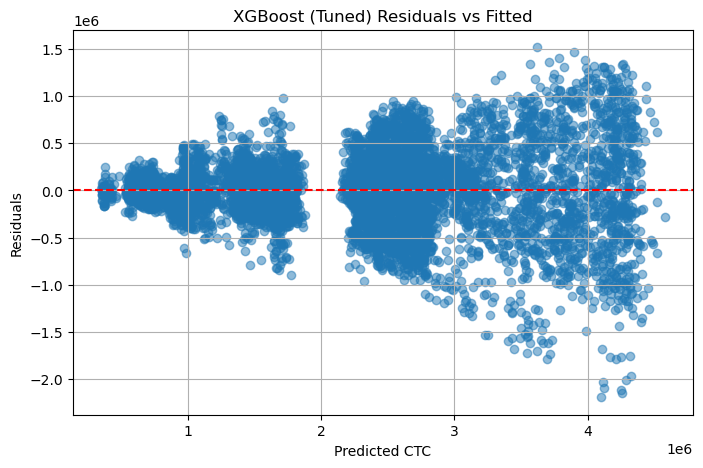

In [411]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error
import numpy as np
import matplotlib.pyplot as plt

# Predictions
y_train_pred_xgb = best_xgb_model.predict(X_train)
y_test_pred_xgb = best_xgb_model.predict(X_test)

# R²
train_r2 = r2_score(y_train, y_train_pred_xgb)
test_r2 = r2_score(y_test, y_test_pred_xgb)

# Adjusted R²
def adjusted_r2(r2, n, k):
    return 1 - (1 - r2) * ((n - 1) / (n - k - 1))

n_train, n_test = len(y_train), len(y_test)
k = X_train.shape[1]

train_adj_r2 = adjusted_r2(train_r2, n_train, k)
test_adj_r2 = adjusted_r2(test_r2, n_test, k)

# RMSE
train_rmse = mean_squared_error(y_train, y_train_pred_xgb, squared=False)
test_rmse = mean_squared_error(y_test, y_test_pred_xgb, squared=False)

# MAPE
train_mape = mean_absolute_percentage_error(y_train, y_train_pred_xgb) * 100
test_mape = mean_absolute_percentage_error(y_test, y_test_pred_xgb) * 100

# Overfitting Check
overfit_xgb_rs = "Yes" if abs(train_r2 - test_r2) > 0.05 else "No"

# Residual Plot
residuals_xgb = y_test - y_test_pred_xgb
plt.figure(figsize=(8, 5))
plt.scatter(y_test_pred_xgb, residuals_xgb, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted CTC")
plt.ylabel("Residuals")
plt.title("XGBoost (Tuned) Residuals vs Fitted")
plt.grid(True)
plt.show()

# Residual Bias 
residual_bias_xgb = "Yes (cone shaped)"  


* After model tuning using Randomized search CV of XG Boost regressor, the residual pattern has slightly decreased compared to previous model. Even though there are minor patterns prevailing in the residual plot, it is negotiable if the performance metrics values are good which compensates this bias.

In [412]:
xgb_results_rs = {
    'Model': 'XGBoost Tuned',
    'Train R²': train_r2,
    'Train Adj. R²': train_adj_r2,
    'Train RMSE': train_rmse,
    'Train MAPE (%)': train_mape,
    'Test R²': test_r2,
    'Test Adj. R²': test_adj_r2,
    'Test RMSE': test_rmse,
    'Test MAPE (%)': test_mape,
    'Overfitting?': overfit_xgb_rs,
    'Residual Bias?': residual_bias_xgb
}

# Transpose to match original layout (models as columns)
xgb_results_rs_df = pd.DataFrame(xgb_results_rs, index=[0]).T
xgb_results_rs_df.columns = ['XGBoost Tuned']

# Concatenate to final table
final_results_df = pd.concat([final_results_df, xgb_results_rs_df], axis=1)
final_results_df

Linear Regression   Lasso Regression   Ridge Regression  \
Train R²                  0.7995             0.7995             0.7995   
Train Adj. R²             0.7994             0.7993             0.7993   
Train RMSE             520312.64          520275.55          520275.55   
Train MAPE (%)             20.47              20.49              20.49   
Test R²                    0.803             0.8031             0.8031   
Test Adj. R²              0.8027             0.8026             0.8026   
Test RMSE              513361.24          513298.79          513298.79   
Test MAPE (%)              19.92              19.93              19.93   
Overfitting?                  No                 No                 No   
Residual Bias?    Yes (∩-shaped)  Yes (mild funnel)  Yes (mild funnel)   
Model                        NaN                NaN                NaN   

               Polynomial Regression (deg=2)  Random Forest Regressor  \
Train R²                              0.8313                   0.9678   
Train Adj. R²                         0.8311                   0.9677   
Train RMSE                         477249.45                208640.91   
Train MAPE (%)                         19.14                      6.6   
Test R²                               0.8305                   0.8457   
Test Adj. R²                          0.8301                   0.8453   
Test RMSE                          476232.39                 454439.3   
Test MAPE (%)                          18.65                    14.81   
Overfitting?                              No                      Yes   
Residual Bias?              Yes (wide curve)  Yes (random cone shape)   
Model                                    NaN                      NaN   

                          XGBoost Regressor            AdaBoost Regressor  \
Train R²                             0.9132                        0.8114   
Train Adj. R²                        0.9131                        0.8112   
Train RMSE                        342288.74                     504639.46   
Train MAPE (%)                        11.94                         23.36   
Test R²                              0.8639                        0.8133   
Test Adj. R²                         0.8636                        0.8129   
Test RMSE                         426732.79                     499754.82   
Test MAPE (%)                         14.12                         22.69   
Overfitting?                             No                            No   
Residual Bias?  Yes (clustered bulge shape)  Yes (vertical lines pattern)   
Model                                   NaN                           NaN   

                                    SVR      XGBoost Tuned  
Train R²                       0.849855           0.885922  
Train Adj. R²                  0.849691           0.885798  
Train RMSE                450277.352312      392486.893377  
Train MAPE (%)                16.072687          13.537988  
Test R²                        0.836598           0.876221  
Test Adj. R²                   0.836183           0.875907  
Test RMSE                 467586.124387      406964.724798  
Test MAPE (%)                 16.624304          13.701944  
Overfitting?                         No                 No  
Residual Bias?  Yes (Clustered pattern)  Yes (cone shaped)  
Model                               NaN      XGBoost Tuned

* After Model tuning using Randomized search CV, the performance has increased from Normal XG Boost with r-squared values increased from 86.39% to 87.62%, Test MAPE values decreased from 14.12% to 13.70 which indicates that the Hyperparameter tuning of XG Boost model has significantly improved the performance level.

Fitting 3 folds for each of 30 candidates, totalling 90 fits


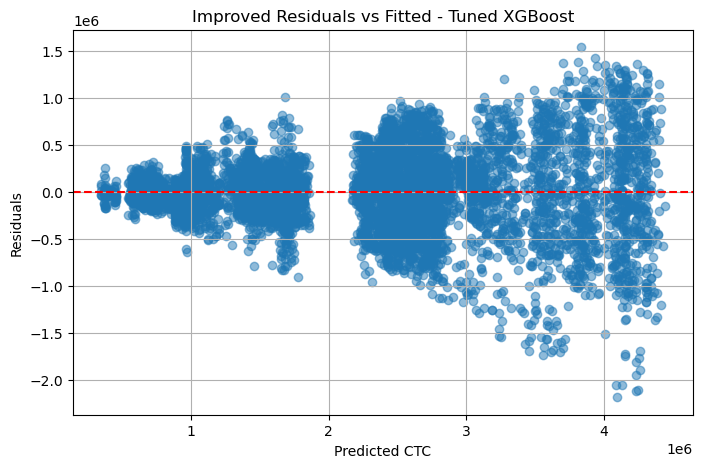

Refined Hyperparameters:
 {'colsample_bytree': 0.7579526072702278, 'gamma': 0.08804645241541144, 'learning_rate': 0.014223946814525337, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 491, 'subsample': 0.8916028672163949}


In [417]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
from scipy.stats import randint, uniform

# Define wider and more refined hyperparameter search space
param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(3, 15),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'gamma': uniform(0, 0.3),
    'min_child_weight': randint(1, 10)
}

# Instantiate the model
xgb = XGBRegressor(random_state=42, objective='reg:squarederror')

# Randomized search
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=30,
    cv=3,
    scoring='r2',
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Fit the search
random_search.fit(X_train, y_train)
best_xgb_model = random_search.best_estimator_

# Predict
y_train_pred = best_xgb_model.predict(X_train)
y_test_pred = best_xgb_model.predict(X_test)

# Residual plot
residuals = y_test - y_test_pred
plt.figure(figsize=(8, 5))
plt.scatter(y_test_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted CTC")
plt.ylabel("Residuals")
plt.title("Improved Residuals vs Fitted - Tuned XGBoost")
plt.grid(True)
plt.show()

# Print best parameters
print("Refined Hyperparameters:\n", random_search.best_params_)


**FINAL MODEL EQUATION**

In [413]:
# Get feature importances
importances = best_xgb_model.feature_importances_
feature_names = X_train.columns

# Create dataframe
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Normalize importances to make it easier to write as weights
importance_df['Normalized_Weight'] = importance_df['Importance'] / importance_df['Importance'].sum()

# Print pseudo-equation
pseudo_eqn = "Expected_CTC = "
for i, row in importance_df.iterrows():
    pseudo_eqn += f"{row['Normalized_Weight']:.3f} * {row['Feature']} + "

# Remove last '+'
pseudo_eqn = pseudo_eqn.rstrip('+ ').strip()

print("Pseudo-model equation for Tuned XGBoost:\n")
print(pseudo_eqn)


Pseudo-model equation for Tuned XGBoost:

Expected_CTC = 0.359 * Total_Experience + 0.173 * UG_Year_Missing + 0.119 * Years_Since_UG + 0.078 * Years_Since_PHD + 0.077 * Education_Under Grad + 0.075 * Education_Grad + 0.044 * Education_PG + 0.023 * Last_Appraisal_Rating_Key_Performer + 0.011 * Last_Appraisal_Rating_C + 0.009 * Last_Appraisal_Rating_D + 0.007 * Years_Since_PG + 0.005 * Certifications + 0.004 * PG_Year_Missing + 0.004 * Number_of_Publications + 0.003 * Inhand_Offer_Y + 0.003 * Last_Appraisal_Rating_B + 0.002 * Curent_Location_Surat + 0.002 * Preferred_location_Ahmedabad + 0.002 * Curent_Location_Lucknow


**Predicted salary for a random candidate**

In [414]:
# For a random candidate (example values)
new_data = pd.DataFrame([{
    'Total_Experience': 5,
    'UG_Year_Missing': 0,
    'Years_Since_UG': 10,
    'Years_Since_PHD': 0,
    'Education_Under Grad': 0,
    'Education_Grad': 1,
    'Education_PG': 0,
    'Last_Appraisal_Rating_Key_Performer': 0,
    'Last_Appraisal_Rating_C': 0,
    'Last_Appraisal_Rating_D': 0,
    'Years_Since_PG': 0,
    'Certifications': 0,
    'PG_Year_Missing': 0,
    'Number_of_Publications': 0,
    'Inhand_Offer_Y': 0,
    'Last_Appraisal_Rating_B': 0,
    'Curent_Location_Surat': 0,
    'Preferred_location_Ahmedabad': 0,
    'Curent_Location_Lucknow': 0

}])

new_data = new_data[X_train.columns]

# Predict Expected CTC
predicted_ctc = best_xgb_model.predict(new_data)
print(f"Predicted Expected CTC: ₹{predicted_ctc[0]:,.0f}")


Predicted Expected CTC: ₹654,941


## FEATURE IMPORTANCE 

Top 20 Features:
                                 Feature  Importance
0                      Total_Experience    0.359043
6                       UG_Year_Missing    0.172806
7                        Years_Since_UG    0.119174
3                       Years_Since_PHD    0.078043
10                 Education_Under Grad    0.077203
8                        Education_Grad    0.074741
9                          Education_PG    0.044134
18  Last_Appraisal_Rating_Key_Performer    0.022965
16              Last_Appraisal_Rating_C    0.010916
17              Last_Appraisal_Rating_D    0.009322
5                        Years_Since_PG    0.006954
2                        Certifications    0.005021
4                       PG_Year_Missing    0.003697
1                Number_of_Publications    0.003503
14                       Inhand_Offer_Y    0.003485
15              Last_Appraisal_Rating_B    0.003182
12                Curent_Location_Surat    0.002300
13         Preferred_location_Ahmedabad    0.0

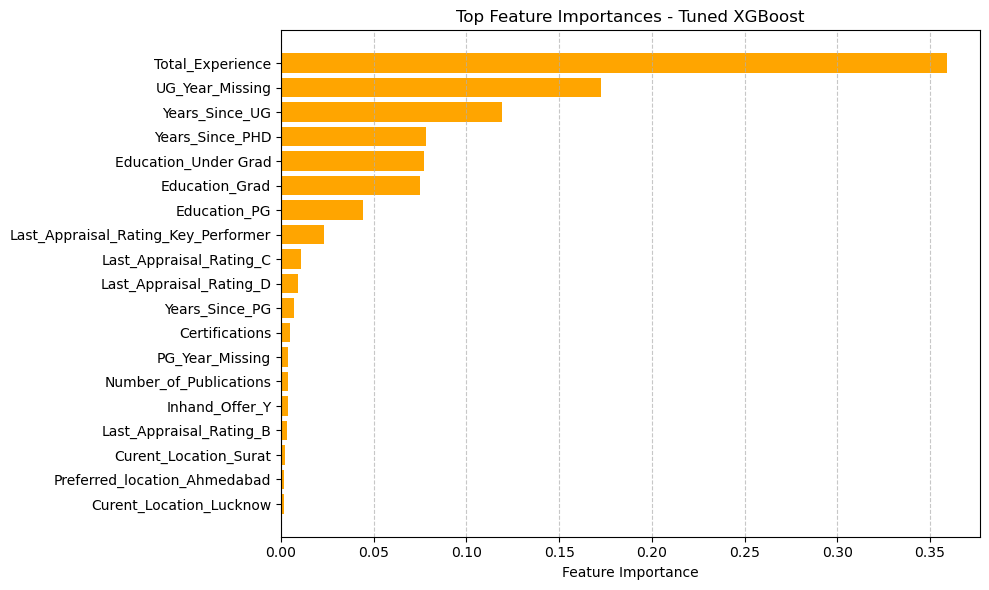

In [415]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Get feature importances from the tuned model
feature_importances = best_xgb_model.feature_importances_

# 2. Map them with feature names
feature_names = X_train.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# 3. Display top N features (e.g., top 20)
top_n = 20
top_features = importance_df.head(top_n)
print("Top 20 Features:\n", top_features)

# 4. Plot bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'], color='orange')
plt.xlabel("Feature Importance")
plt.title("Top Feature Importances - Tuned XGBoost")
plt.gca().invert_yaxis()  # Highest on top
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


* The importance of features is plotted with the bar plot. The top 5 most important features are Total experience, UG Year Missing, Years since UG, Years since PHD and Education Under grad. These are the top 5 features which play a major role in predicting the Salary of a candidate.

## BIVARIATE ANALYSIS OF TOP 5 IMPORTANT FEATURES WITH TARGET VARIABLE

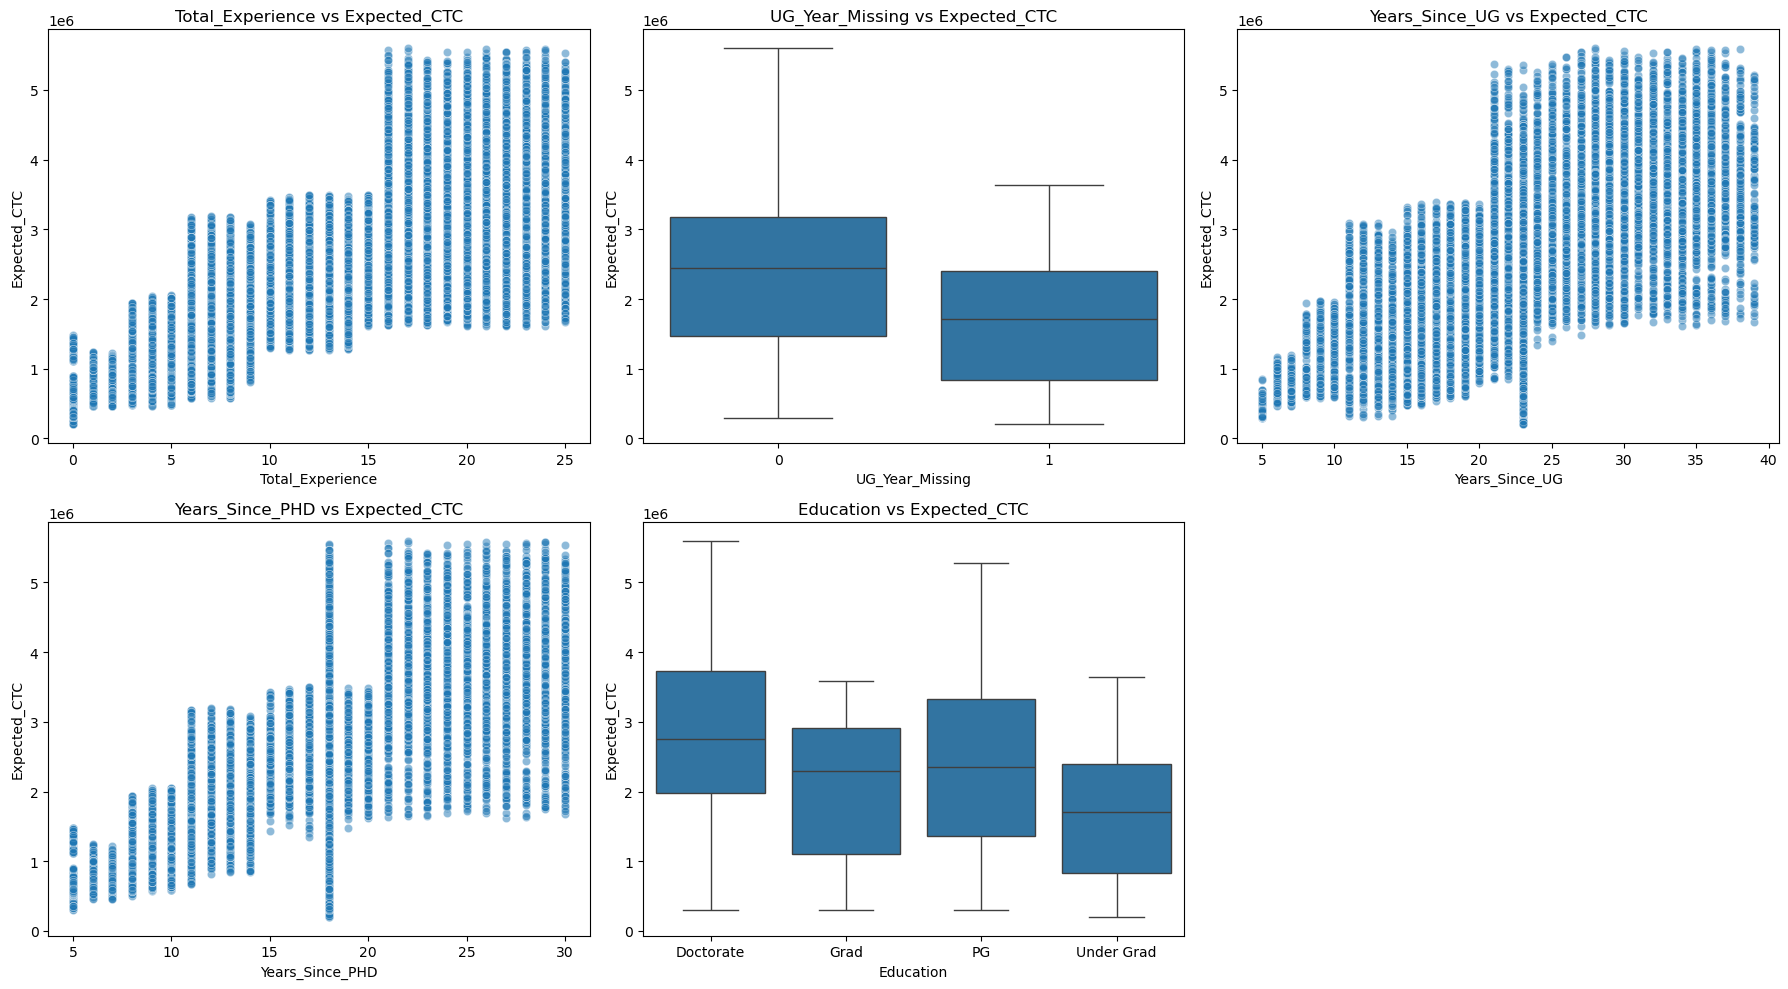

In [416]:
import seaborn as sns
import matplotlib.pyplot as plt

# Combine top features and target variable into a new DataFrame
bivariate_df = hr1[['Total_Experience', 'UG_Year_Missing', 'Years_Since_UG', 
                    'Years_Since_PHD', 'Education', 'Expected_CTC']]

# Plot setup
plt.figure(figsize=(18, 10))

# Loop through features and plot
top_5_features = ['Total_Experience', 'UG_Year_Missing', 'Years_Since_UG', 
                  'Years_Since_PHD', 'Education']

for i, feature in enumerate(top_5_features, 1):
    plt.subplot(2, 3, i)
    if bivariate_df[feature].nunique() <= 5:
        sns.boxplot(x=bivariate_df[feature], y=bivariate_df['Expected_CTC'])
    else:
        sns.scatterplot(x=bivariate_df[feature], y=bivariate_df['Expected_CTC'], alpha=0.5)
    plt.title(f"{feature} vs Expected_CTC")
    plt.xlabel(feature)
    plt.ylabel("Expected_CTC")

plt.tight_layout()
plt.show()


* Total_Experience vs Expected_CTC: There is a strong postive correlation prevailing between Total experience and Expected Salary which indicates that as the experience increases, Salary will be higher. Significant increase of salary can be seen with more than 15 years of experience.
  Business recommendation: This indicates that more experienced professionals will expect higher salary, so the HR Team should ensure that the interview is conducted thoroughly before selecting the candidate as this influences the company's profit in a significant way.

* UG_Year_Missing vs Expected_CTC: This indicates candidates who have done Undergraduate are receiving higher salaries compared to candidates who have not done UG.
    Business recommendation: This implies that Candidates who are Undergraduate expect high salary compared to Non-UGs. So, the HR team should make sure the interview is conducted well for both and they have the advantage of tackling the salary negotiation done by Non-UGs because of their cons.

* Years_Since_UG vs Expected_CTC: There is a strong positive correlation between both these features which indicates that the candidates with more years since UG receive high salary. After 20 years of UG, the salary is saturated for all the remaining candidates which implies that 20 is the threshold.
  Business recommendation: Even though if a candiate has more years since UG, Experience of that candidate is also important feature to consider. So, the HR Team should be aware of the Candidate Experience also along with Years since UG

* Years_Since_PHD vs Expected_CTC: There is a similar positive correlation like Years since UG as it also implies that as the years since PHD increases, the salary also increases. Similarly the salary is saturated after 20 years.
  Business recommendation: PHD candidates expect higher salary because of their Education and so HR team should conduct a thorough and well made Interview with these candidates as hiring less qualified persons will impact the company's profit.

* Education under grad vs Expected_CTC: Persons with Undergraduate education is influencing the Salary that they usually receive low salary compared to other candidates.
 Business recommendation: The HR Team has the advantage of tackling the Salary negotiations if done by these candidates and through this, the applying candidates can be able to judge the Salary offers given to Undergraduate candidates and can focus on improving their qualification.
